In [1]:
import torch
is_cuda_available = torch.cuda.is_available()
print(f"CUDA Available: {is_cuda_available}")
if is_cuda_available:
    gpu_name = torch.cuda.get_device_name(0)
    print(f"GPU Name: {gpu_name}")


CUDA Available: True
GPU Name: NVIDIA GeForce RTX 2050


# Milestone 1: Dataset Collection & Preprocessing 

## Week 1

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
import glob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms

## Dataset Preparation

In [2]:
# Base folder where all datasets are stored
base_folder = "ForensicsScannerData/"

# Dataset folder names
datasets = ["OfficialData", "FlatfieldData", "TamperedData", "WikipediaData"]

# Create a dictionary with dataset names as keys and full paths as values
dataset_paths = {name.split("Data")[0].lower(): os.path.abspath(os.path.join(base_folder, name)) for name in datasets}

# Check and print each path
for key, path in dataset_paths.items():
    exists = os.path.exists(path)
    print(f"{key}: {path} | Exists: {exists}")


official: D:\Data\ForensicsScannerData\OfficialData | Exists: True
flatfield: D:\Data\ForensicsScannerData\FlatfieldData | Exists: True
tampered: D:\Data\ForensicsScannerData\TamperedData | Exists: True
wikipedia: D:\Data\ForensicsScannerData\WikipediaData | Exists: True


## Dataset Structure Check of all Datasets
### Flatfield

In [69]:
def print_first_two_levels(root_path, dataset_name="dataset"):
    if not os.path.exists(root_path):
        print(f"{dataset_name} root not found: {root_path}")
        return

    print(f"\n{dataset_name} root: {root_path}  |  Exists: True\n")

    first_level = sorted(os.listdir(root_path))
    print(f"First-level folders in {dataset_name}: {first_level}\n")

    for folder in first_level:
        folder_path = os.path.join(root_path, folder)
        if os.path.isdir(folder_path):
            second_level = sorted(os.listdir(folder_path))
            print(f"{folder}/  ->  {second_level}\n")


# -------- flatfield ONLY --------
flatfield = r"D:\Data\ForensicsScannerData\FlatfieldData"

print_first_two_levels(flatfield, "flatfield")



flatfield root: D:\Data\ForensicsScannerData\FlatfieldData  |  Exists: True

First-level folders in flatfield: ['Canon120-1', 'Canon120-2', 'Canon220', 'Canon9000-1', 'Canon9000-2', 'EpsonV370-1', 'EpsonV370-2', 'EpsonV39-1', 'EpsonV39-2', 'EpsonV550', 'HP']

Canon120-1/  ->  ['150.tif', '300.tif']

Canon120-2/  ->  ['150.tif', '300.tif']

Canon220/  ->  ['150.tif', '300.tif']

Canon9000-1/  ->  ['150.tif', '300.tif']

Canon9000-2/  ->  ['150.tif', '300.tif']

EpsonV370-1/  ->  ['150.tif', '300.tif']

EpsonV370-2/  ->  ['150.tif', '300.tif']

EpsonV39-1/  ->  ['._150.tif', '150.tif', '300.tif']

EpsonV39-2/  ->  ['150.tif', '300.tif']

EpsonV550/  ->  ['150.tif', '300.tif']

HP/  ->  ['150.tif', '300.tif']



### Official data

In [70]:
def print_first_two_levels(root_path, dataset_name="dataset"):
    if not os.path.exists(root_path):
        print(f"{dataset_name} root not found: {root_path}")
        return

    print(f"\n{dataset_name} root: {root_path}  |  Exists: True\n")

    first_level = sorted(os.listdir(root_path))
    print(f"First-level folders in {dataset_name}: {first_level}\n")

    for folder in first_level:
        folder_path = os.path.join(root_path, folder)
        if os.path.isdir(folder_path):
            second_level = sorted(os.listdir(folder_path))
            print(f"{folder}/  ->  {second_level}\n")


# -------- official ONLY --------
# Colab ke liye:
# official = "/content/drive/MyDrive/Colab Notebooks/ForensicsScannerData/OfficialData/"

official = r"D:\Data\ForensicsScannerData\OfficialData"

print_first_two_levels(official, "official")



official root: D:\Data\ForensicsScannerData\OfficialData  |  Exists: True

First-level folders in official: ['Canon120-1', 'Canon120-2', 'Canon220', 'Canon9000-1', 'Canon9000-2', 'EpsonV370-1', 'EpsonV370-2', 'EpsonV39-1', 'EpsonV39-2', 'EpsonV550', 'HP']

Canon120-1/  ->  ['150', '300']

Canon120-2/  ->  ['150', '300']

Canon220/  ->  ['150', '300']

Canon9000-1/  ->  ['150', '300']

Canon9000-2/  ->  ['150', '300']

EpsonV370-1/  ->  ['150', '300']

EpsonV370-2/  ->  ['150', '300']

EpsonV39-1/  ->  ['150', '300']

EpsonV39-2/  ->  ['150', '300']

EpsonV550/  ->  ['150', '300']

HP/  ->  ['150', '300']



### Wikipedia Data

In [71]:
def print_first_two_levels(root_path, dataset_name="dataset"):
    if not os.path.exists(root_path):
        print(f"{dataset_name} root not found: {root_path}")
        return

    print(f"\n{dataset_name} root: {root_path}  |  Exists: True\n")

    first_level = sorted(os.listdir(root_path))
    print(f"First-level folders in {dataset_name}: {first_level}\n")

    for folder in first_level:
        folder_path = os.path.join(root_path, folder)
        if os.path.isdir(folder_path):
            second_level = sorted(os.listdir(folder_path))
            print(f"{folder}/  ->  {second_level}\n")


# -------- wikipedia ONLY --------
wikipedia = r"D:\Data\ForensicsScannerData\WikipediaData"

print_first_two_levels(wikipedia, "wikipedia")



wikipedia root: D:\Data\ForensicsScannerData\WikipediaData  |  Exists: True

First-level folders in wikipedia: ['Canon120-1', 'Canon120-2', 'Canon220', 'Canon9000-1', 'Canon9000-2', 'EpsonV370-1', 'EpsonV370-2', 'EpsonV39-1', 'EpsonV39-2', 'EpsonV550', 'HP']

Canon120-1/  ->  ['150', '300']

Canon120-2/  ->  ['150', '300']

Canon220/  ->  ['150', '300']

Canon9000-1/  ->  ['150', '300']

Canon9000-2/  ->  ['150', '300']

EpsonV370-1/  ->  ['150', '300']

EpsonV370-2/  ->  ['150', '300']

EpsonV39-1/  ->  ['150', '300']

EpsonV39-2/  ->  ['150', '300']

EpsonV550/  ->  ['150', '300']

HP/  ->  ['150', '300']



### Tampered Data

In [72]:
def print_first_two_levels(root_path, dataset_name="dataset"):
    if not os.path.exists(root_path):
        print(f"{dataset_name} root not found: {root_path}")
        return

    print(f"\n{dataset_name} root: {root_path}  |  Exists: True\n")

    first_level = sorted(os.listdir(root_path))
    print(f"First-level folders in {dataset_name}: {first_level}\n")

    for folder in first_level:
        folder_path = os.path.join(root_path, folder)
        if os.path.isdir(folder_path):
            second_level = sorted(os.listdir(folder_path))
            print(f"{folder}/  ->  {second_level}\n")


# -------- tampered ONLY  --------
tampered = r"D:\Data\ForensicsScannerData\TamperedData"

print_first_two_levels(tampered, "tampered")



tampered root: D:\Data\ForensicsScannerData\TamperedData  |  Exists: True

First-level folders in tampered: ['Binary masks', 'Description', 'Original', 'Tampered']

Binary masks/  ->  ['Copy-move', 'Retouching', 'Splicing']

Description/  ->  ['s11_19.pdf', 's11_27.pdf', 's11_29.pdf', 's11_30.pdf', 's11_34.pdf', 's11_35.pdf', 's11_36.pdf', 's11_38.pdf', 's11_4.pdf', 's11_41.pdf', 's11_49.pdf', 's1_70.pdf', 's1_71.pdf', 's1_72.pdf', 's1_73.pdf', 's1_74.pdf', 's1_78.pdf', 's1_79.pdf', 's1_81.pdf', 's1_82.pdf', 's1_83.pdf', 's1_84.pdf', 's1_96.pdf', 's9_51.pdf', 's9_52.pdf', 's9_56.pdf', 's9_58.pdf', 's9_59.pdf', 's9_60.pdf', 's9_61.pdf', 's9_62.pdf', 's9_63.pdf', 's9_67.pdf', 's9_68.pdf']

Original/  ->  ['s11_19.tif', 's11_27.tif', 's11_29.tif', 's11_30.tif', 's11_34.tif', 's11_35.tif', 's11_36.tif', 's11_38.tif', 's11_4.tif', 's11_41.tif', 's11_49.tif', 's1_70.tif', 's1_71.tif', 's1_72.tif', 's1_73.tif', 's1_74.tif', 's1_78.tif', 's1_79.tif', 's1_81.tif', 's1_82.tif', 's1_83.tif', 's1

## Dataset Collection into DataFrames
In this step, we organize all images from different sources (official, flatfield, tampered, wikipedia) into structured pandas DataFrames.

In [12]:
def is_image(fname):
    """Check if file is an image"""
    return fname.lower().endswith((".png", ".jpg", ".jpeg", ".tif", ".tiff"))

# ---- Windows base paths ---- #
base_paths = {
    "official":  r"D:\Data\ForensicsScannerData\OfficialData",
    "flatfield": r"D:\Data\ForensicsScannerData\FlatfieldData",
    "tampered":  r"D:\Data\ForensicsScannerData\TamperedData",
    "wikipedia": r"D:\Data\ForensicsScannerData\WikipediaData",
}

def collect_dataset(src):
    """Generic collector for official, flatfield, tampered, wikipedia"""
    rows = []
    root = base_paths[src]

    if not os.path.exists(root):
        print(f"⚠️ Path not found for {src}: {root}")
        return pd.DataFrame(rows)

    for model_name in os.listdir(root):
        model_dir = os.path.join(root, model_name)
        if not os.path.isdir(model_dir):
            continue

        # Case 1: Images directly inside model folder
        for fname in os.listdir(model_dir):
            fpath = os.path.join(model_dir, fname)

            # If subfolder (like 150 or 300), handle separately
            if os.path.isdir(fpath):
                dpi_folder = os.path.basename(fpath)
                for subf in os.listdir(fpath):
                    if is_image(subf):
                        rows.append(dict(
                            source=src,
                            scanner_model=model_name,
                            dpi=dpi_folder + "dpi" if dpi_folder.isdigit() else "unknown",
                            path=os.path.join(fpath, subf)
                        ))
            else:
                if is_image(fname):
                    # DPI detect from filename
                    if "150" in fname:
                        dpi = "150dpi"
                    elif "300" in fname:
                        dpi = "300dpi"
                    else:
                        dpi = "unknown"

                    rows.append(dict(
                        source=src,
                        scanner_model=model_name,
                        dpi=dpi,
                        path=fpath
                    ))

    return pd.DataFrame(rows)


# ---- Collect datasets ---- #
official_df   = collect_dataset("official")
flatfield_df  = collect_dataset("flatfield")
tampered_df   = collect_dataset("tampered")
wikipedia_df  = collect_dataset("wikipedia")

# ---- Show counts ---- #
for name, df in [
    ("Official", official_df),
    ("Flatfield", flatfield_df),
    ("Tampered", tampered_df),
    ("Wikipedia", wikipedia_df)
]:
    print(f"\n{name} counts:")
    if not df.empty:
        print(
            df.groupby(["source", "dpi", "scanner_model"])
              .size()
              .reset_index(name="count")
        )
    else:
        print(f"⚠️ No images found in {name} dataset!")
    print("Totals:", len(df))



Official counts:
      source     dpi scanner_model  count
0   official  150dpi    Canon120-1    100
1   official  150dpi    Canon120-2    100
2   official  150dpi      Canon220    100
3   official  150dpi   Canon9000-1    100
4   official  150dpi   Canon9000-2    100
5   official  150dpi   EpsonV370-1    100
6   official  150dpi   EpsonV370-2    100
7   official  150dpi    EpsonV39-1    100
8   official  150dpi    EpsonV39-2    100
9   official  150dpi     EpsonV550    100
10  official  150dpi            HP    100
11  official  300dpi    Canon120-1    100
12  official  300dpi    Canon120-2    100
13  official  300dpi      Canon220    100
14  official  300dpi   Canon9000-1    100
15  official  300dpi   Canon9000-2    100
16  official  300dpi   EpsonV370-1    100
17  official  300dpi   EpsonV370-2    100
18  official  300dpi    EpsonV39-1    100
19  official  300dpi    EpsonV39-2    100
20  official  300dpi     EpsonV550    100
21  official  300dpi            HP    100
Totals: 2200

Fl

## Image Count Visualization
### (official, flatfield, wikipedia)

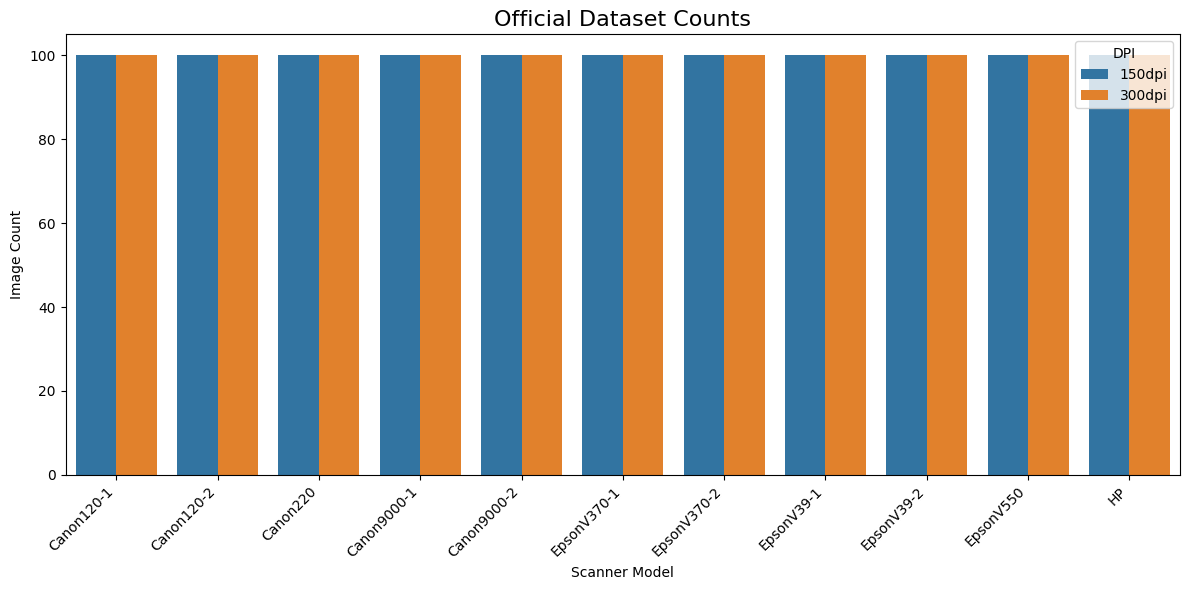

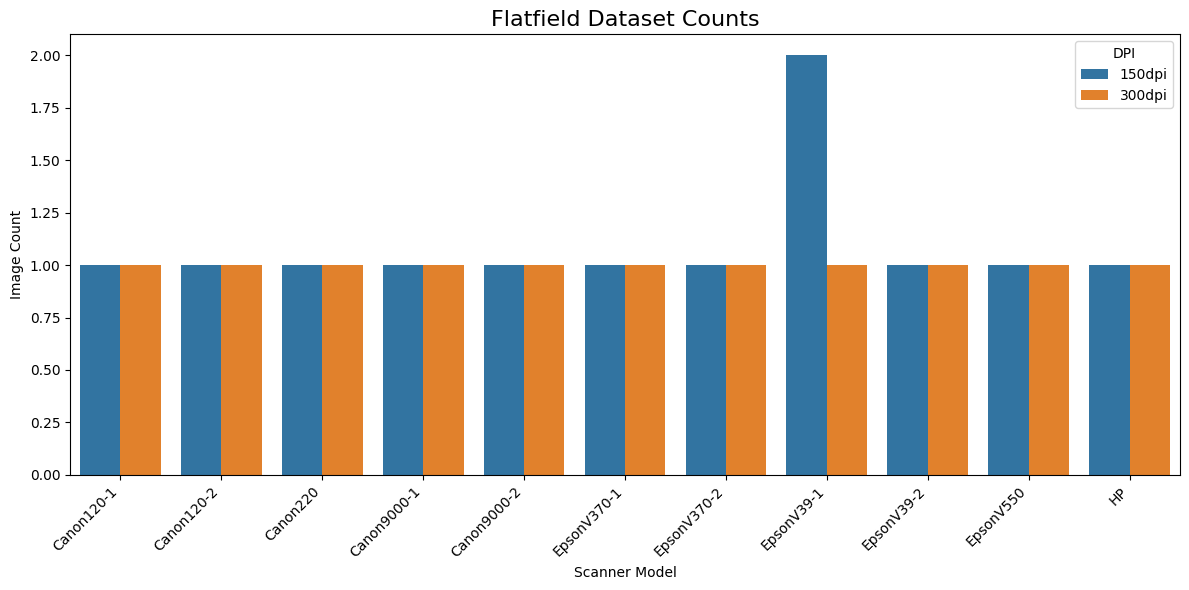

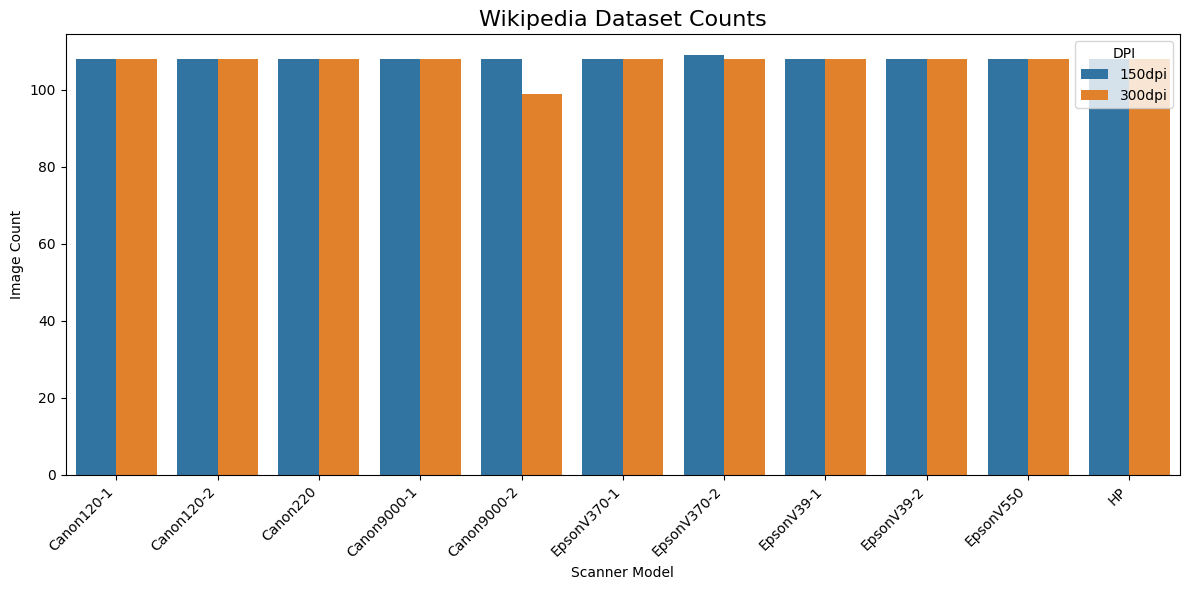


📊 Total Image Counts:
Official: 2200 images
Flatfield: 23 images
Wikipedia: 2368 images
✅ Grand Total: 4591 images


In [21]:
# ---- Datasets ----
official_counts = pd.DataFrame({
    "source": ["official"]*22,
    "dpi": ["150dpi"]*11 + ["300dpi"]*11,
    "scanner_model": [
        "Canon120-1","Canon120-2","Canon220","Canon9000-1","Canon9000-2",
        "EpsonV370-1","EpsonV370-2","EpsonV39-1","EpsonV39-2","EpsonV550","HP"
    ]*2,
    "count": [100]*22
})

flatfield_counts = pd.DataFrame({
    "source": ["flatfield"]*22,
    "dpi": ["150dpi"]*11 + ["300dpi"]*11,
    "scanner_model": [
        "Canon120-1","Canon120-2","Canon220","Canon9000-1","Canon9000-2",
        "EpsonV370-1","EpsonV370-2","EpsonV39-1","EpsonV39-2","EpsonV550","HP"
    ]*2,
    "count": [1,1,1,1,1,1,1,2,1,1,1,  # 150dpi
              1,1,1,1,1,1,1,1,1,1,1]  # 300dpi
})


wikipedia_counts = pd.DataFrame({
    "source": ["wikipedia"]*22,
    "dpi": ["150dpi"]*11 + ["300dpi"]*11,
    "scanner_model": [
        "Canon120-1","Canon120-2","Canon220","Canon9000-1","Canon9000-2",
        "EpsonV370-1","EpsonV370-2","EpsonV39-1","EpsonV39-2","EpsonV550","HP"
    ]*2,
    "count": [
        108,108,108,108,108,108,109,108,108,108,108,   # 150dpi
        108,108,108,108,99,108,108,108,108,108,108     # 300dpi
    ]
})

# ---- Plot helper ----
def plot_counts(df, title):
    plt.figure(figsize=(12,6))
    sns.barplot(
        data=df,
        x="scanner_model",
        y="count",
        hue="dpi"
    )
    plt.xticks(rotation=45, ha="right")
    plt.title(f"{title} Dataset Counts", fontsize=16)
    plt.xlabel("Scanner Model")
    plt.ylabel("Image Count")
    plt.legend(title="DPI")
    plt.tight_layout()
    plt.show()

# ---- Visualization ----
plot_counts(official_counts, "Official")
plot_counts(flatfield_counts, "Flatfield")
plot_counts(wikipedia_counts, "Wikipedia")

# ---- Total image counts ----
datasets = {
    "Official": official_counts,
    "Flatfield": flatfield_counts,
    "Wikipedia": wikipedia_counts
}

print("\n📊 Total Image Counts:")
for name, df in datasets.items():
    print(f"{name}: {df['count'].sum()} images")

print(f"✅ Grand Total: {sum(df['count'].sum() for df in datasets.values())} images")


### Tampered Data Image Count Visualization

                    category  count
0                   Original     34
1                Description     34
2       Tampered - Copy-move     34
3      Tampered - Retouching     34
4        Tampered - Splicing     34
5   Binary masks - Copy-move     34
6  Binary masks - Retouching     34
7    Binary masks - Splicing     34


C:\Users\nitis\AppData\Local\Temp\ipykernel_22336\1448030207.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


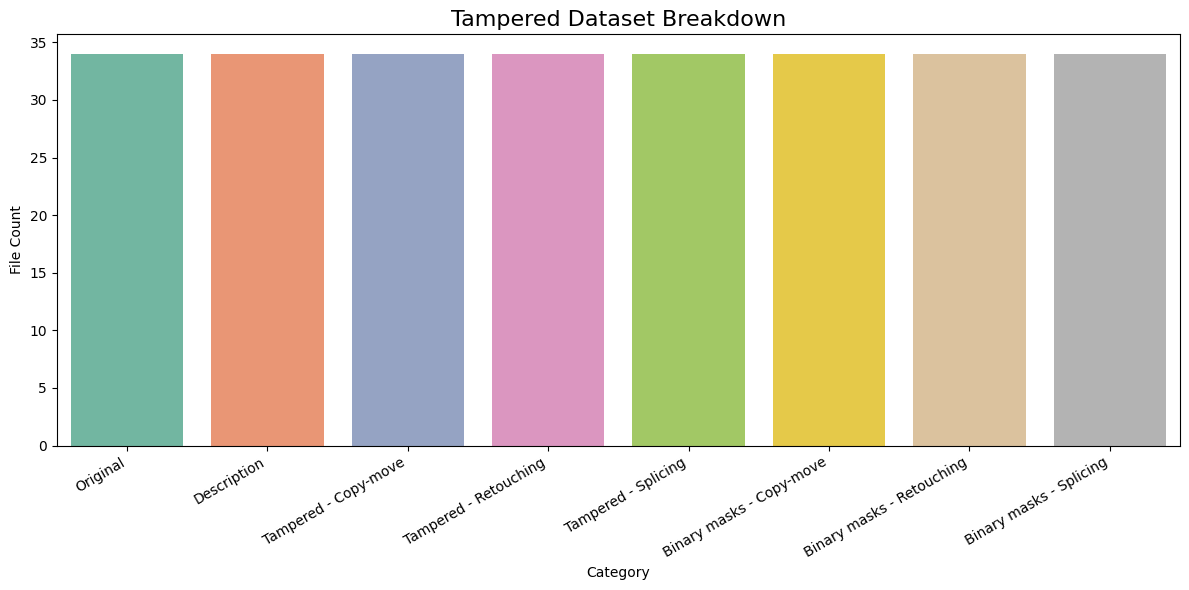

In [22]:
tampered_root = r"D:\Data\ForensicsScannerData\TamperedData"

def collect_tampered_full(root):
    rows = []

    # --- Original ---
    orig_dir = os.path.join(root, "Original")
    if os.path.exists(orig_dir):
        tif_files = [f for f in os.listdir(orig_dir) if f.lower().endswith(".tif")]
        rows.append(dict(category="Original", count=len(tif_files)))

    # --- Description ---
    desc_dir = os.path.join(root, "Description")
    if os.path.exists(desc_dir):
        pdf_files = [f for f in os.listdir(desc_dir) if f.lower().endswith(".pdf")]
        rows.append(dict(category="Description", count=len(pdf_files)))

    # --- Tampered ---
    tamp_dir = os.path.join(root, "Tampered")
    if os.path.exists(tamp_dir):
        for sub in ["Copy-move", "Retouching", "Splicing"]:
            subdir = os.path.join(tamp_dir, sub)
            if os.path.isdir(subdir):
                img_files = [f for f in os.listdir(subdir) if f.lower().endswith((".png", ".jpg", ".tif"))]
                rows.append(dict(category=f"Tampered - {sub}", count=len(img_files)))

    # --- Binary masks ---
    masks_dir = os.path.join(root, "Binary masks")
    if os.path.exists(masks_dir):
        for sub in ["Copy-move", "Retouching", "Splicing"]:
            subdir = os.path.join(masks_dir, sub)
            if os.path.isdir(subdir):
                img_files = [f for f in os.listdir(subdir) if f.lower().endswith((".png", ".jpg", ".tif"))]
                rows.append(dict(category=f"Binary masks - {sub}", count=len(img_files)))

    return pd.DataFrame(rows)


tampered_df = collect_tampered_full(tampered_root)
print(tampered_df)

# ---- Plot ----
plt.figure(figsize=(12,6))
sns.barplot(
    data=tampered_df,
    x="category",
    y="count",
    palette="Set2"   # 👈 diff colors auto assign
)
plt.title("Tampered Dataset Breakdown", fontsize=16)
plt.xticks(rotation=30, ha="right")
plt.ylabel("File Count")
plt.xlabel("Category")
plt.tight_layout()
plt.show()


# Week 2
## Perform image preprocessing:  Flatfield Only

In [25]:
# --- USER PATHS ---
base_paths = {
    "flatfield": r"D:\Data\ForensicsScannerData\FlatfieldData",   
    "processed_root": r"D:\Data\ForensicsScannerData\ProcessedImages"
}

valid_exts = (".png", ".jpg", ".jpeg", ".tif", ".tiff", ".bmp")

# --- HELPER FUNCTION ---
def extract_and_save_residual(src_path, dst_path):
    img_bgr = cv2.imread(src_path)
    if img_bgr is None:
        print(f"⚠️ Could not read {src_path}. Skipping.")
        return False

    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    denoised = cv2.fastNlMeansDenoising(img_gray, None, h=10)
    residual = cv2.subtract(img_gray, denoised)

    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    cv2.imwrite(dst_path, residual)
    return True


# --- MAIN PREPROCESSING FUNCTION ---
def preprocess_flatfield(base_paths):
    input_root = base_paths["flatfield"]
    output_root = os.path.join(base_paths["processed_root"], "flatfield_residual")

    print(f"\n🔄 Starting residual extraction for 'flatfield'...")

    # recursively find all images
    files = glob.glob(os.path.join(input_root, "**/*"), recursive=True)
    # filter valid extensions and skip hidden files like "._150.tif"
    files = [
        f for f in files
        if f.lower().endswith(valid_exts) and not os.path.basename(f).startswith("._")
    ]

    if not files:
        print(f"⚠️ No images found in {input_root}.")
        return

    print(f"Found {len(files)} images in 'flatfield'.")

    for src_path in tqdm(files, desc="Extracting residuals (flatfield)"):
        rel_path = os.path.relpath(src_path, input_root)
        dst_path = os.path.join(output_root, rel_path)
        dst_path = os.path.splitext(dst_path)[0] + ".png"
        extract_and_save_residual(src_path, dst_path)

    print(f"✅ Finished: Full-resolution residuals saved in '{output_root}'.")


# --- RUN ONLY FLATFIELD ---
preprocess_flatfield(base_paths)



🔄 Starting residual extraction for 'flatfield'...
Found 22 images in 'flatfield'.


Extracting residuals (flatfield): 100%|████████████████████████████████████████████████| 22/22 [01:31<00:00,  4.15s/it]

✅ Finished: Full-resolution residuals saved in 'D:\Data\ForensicsScannerData\ProcessedImages\flatfield_residual'.


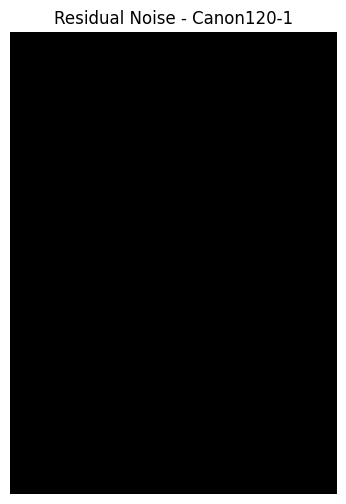

In [26]:
# Example path (Canon120-1/150.tif residual output)
base_residual = r"D:\Data\ForensicsScannerData\ProcessedImages\flatfield_residual"

# Pick one scanner folder
scanner_folder = "Canon120-1"
img_name = "150.png"  # residual already saved as png

img_path = os.path.join(base_residual, scanner_folder, img_name)

# load residual
residual = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(6,6))
plt.imshow(residual, cmap="gray")
plt.title(f"Residual Noise - {scanner_folder}")
plt.axis("off")
plt.show()


### PRNU Fingerprint Generation from Flatfield Residual Images

In [33]:
import os
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm
from PIL import Image
import shutil

# ------------------ INPUT PATHS ------------------
base_paths = {
    "flatfield_residual": "ForensicsScannerData/ProcessedImages/flatfield_residual",
    "processed_root": "ForensicsScannerData/ProcessedImages/"
}

# ------------------ OUTPUT ROOT ------------------
flatfield_fp_root = Path(base_paths["processed_root"]) / "flatfield_fingerprint"

# Clean up old directory
if flatfield_fp_root.exists():
    shutil.rmtree(flatfield_fp_root)
flatfield_fp_root.mkdir(parents=True, exist_ok=True)

# ------------------ PRNU-SAFE ALIGNMENT ------------------
def align_to_shape(img_array, target_shape):
    h, w = img_array.shape
    th, tw = target_shape
    if (h, w) == (th, tw):
        return img_array

    if h > th:
        start_h = (h - th) // 2
        img_array = img_array[start_h:start_h+th, :]
    if w > tw:
        start_w = (w - tw) // 2
        img_array = img_array[:, start_w:start_w+tw]

    pad_h = th - img_array.shape[0]
    pad_w = tw - img_array.shape[1]
    if pad_h > 0 or pad_w > 0:
        pad_h_before, pad_h_after = pad_h//2, pad_h - pad_h//2
        pad_w_before, pad_w_after = pad_w//2, pad_w - pad_w//2
        img_array = np.pad(img_array,
                           ((pad_h_before, pad_h_after), (pad_w_before, pad_w_after)),
                           mode="constant", constant_values=0)
    return img_array

# ------------------ FINGERPRINT GENERATOR ------------------
def compute_fingerprint_images(residual_dir, out_root, source_name):
    print(f"\n🔄 Generating PRNU fingerprints for {source_name}...")

    scanners = [d for d in os.listdir(residual_dir) if os.path.isdir(os.path.join(residual_dir, d))]
    if not scanners:
        print(f"⚠️ No scanners found in {residual_dir}")
        return

    for scanner in scanners:
        scanner_path = Path(residual_dir) / scanner
        dpis = [f for f in os.listdir(scanner_path) if f.lower().endswith((".tif", ".tiff", ".png", ".jpg", ".jpeg"))]

        if not dpis:
            print(f"⚠️ No residual images found in {scanner}")
            continue

        for dpi_file in dpis:
            dpi_path = scanner_path / dpi_file
            dpi_name = Path(dpi_file).stem   # "150" ya "300"
            out_dpi_path = Path(out_root) / scanner / dpi_name
            out_dpi_path.mkdir(parents=True, exist_ok=True)

            try:
                img = np.array(Image.open(dpi_path).convert("L"), dtype=np.float32)
            except Exception as e:
                print(f"⚠️ Failed to load {dpi_file} in {scanner}: {e}")
                continue

            # fingerprint = single image (since only one available)
            fingerprint = img  

            # Save as .npy
            np.save(out_dpi_path / "fingerprint.npy", fingerprint)

            # Save as normalized .png
            fp_img_normalized = cv2.normalize(fingerprint, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
            cv2.imwrite(str(out_dpi_path / "fingerprint.png"), fp_img_normalized)

            print(f"✅ Fingerprint saved: {scanner}/{dpi_name}")

    print(f"\n🎯 Finished: PRNU fingerprints for {source_name} generated in '{out_root}'")


# ------------------ RUN FOR FLATFIELD ------------------
compute_fingerprint_images(base_paths["flatfield_residual"], flatfield_fp_root, "Flatfield")



🔄 Generating PRNU fingerprints for Flatfield...
✅ Fingerprint saved: Canon120-1/150
✅ Fingerprint saved: Canon120-1/300
✅ Fingerprint saved: Canon120-2/150
✅ Fingerprint saved: Canon120-2/300
✅ Fingerprint saved: Canon220/150
✅ Fingerprint saved: Canon220/300
✅ Fingerprint saved: Canon9000-1/150
✅ Fingerprint saved: Canon9000-1/300
✅ Fingerprint saved: Canon9000-2/150
✅ Fingerprint saved: Canon9000-2/300
✅ Fingerprint saved: EpsonV370-1/150
✅ Fingerprint saved: EpsonV370-1/300
✅ Fingerprint saved: EpsonV370-2/150
✅ Fingerprint saved: EpsonV370-2/300
✅ Fingerprint saved: EpsonV39-1/150
✅ Fingerprint saved: EpsonV39-1/300
✅ Fingerprint saved: EpsonV39-2/150
✅ Fingerprint saved: EpsonV39-2/300
✅ Fingerprint saved: EpsonV550/150
✅ Fingerprint saved: EpsonV550/300
✅ Fingerprint saved: HP/150
✅ Fingerprint saved: HP/300

🎯 Finished: PRNU fingerprints for Flatfield generated in 'ForensicsScannerData\ProcessedImages\flatfield_fingerprint'


# Milestone 2: Feature Engineering & Baseline Modeling

### PRNU Fingerprint Visualization with Residuals, FFT Spectrum, and LBP Features

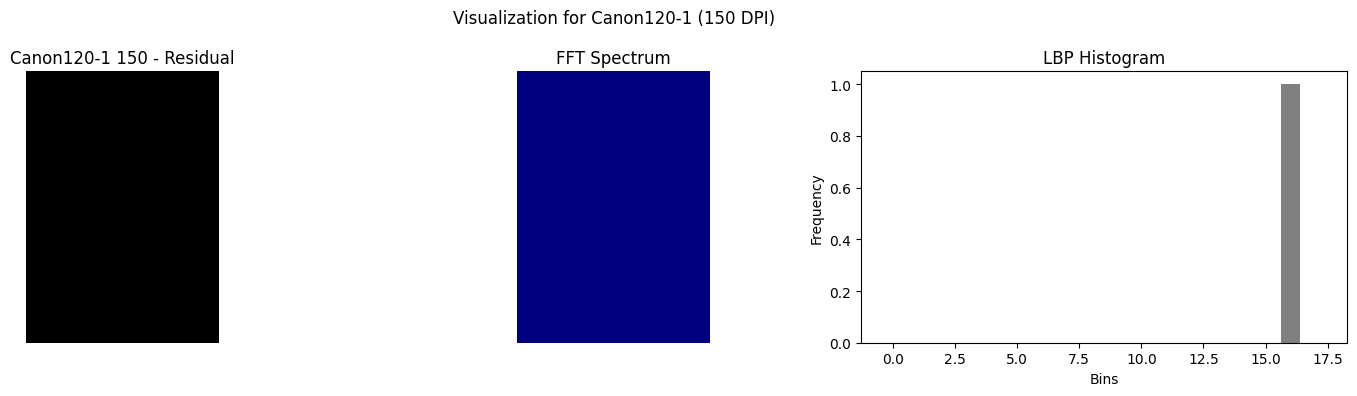

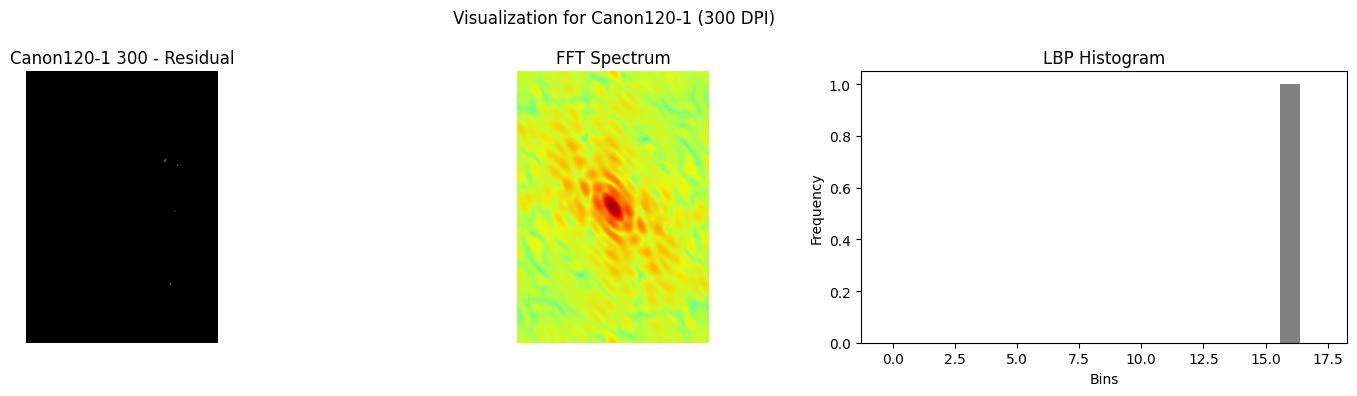

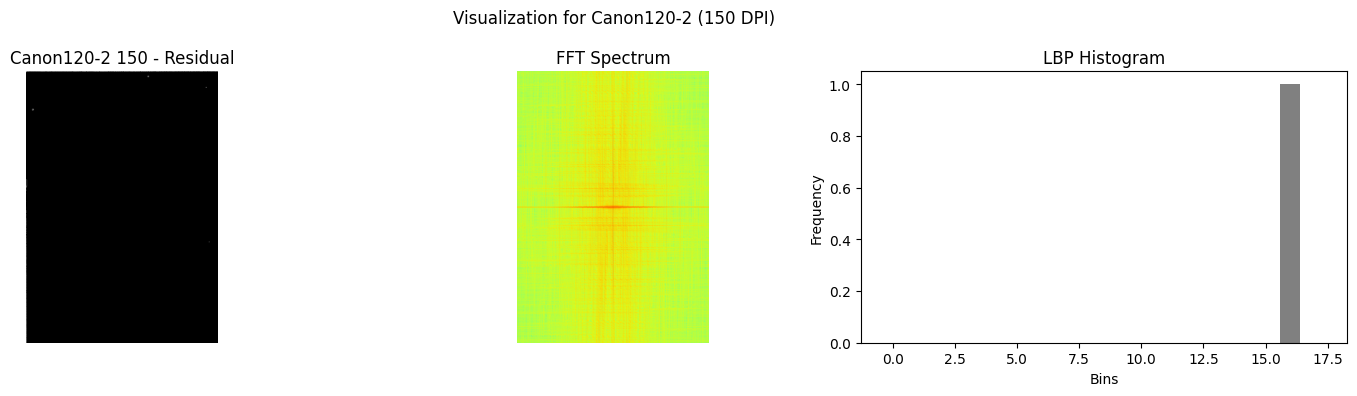

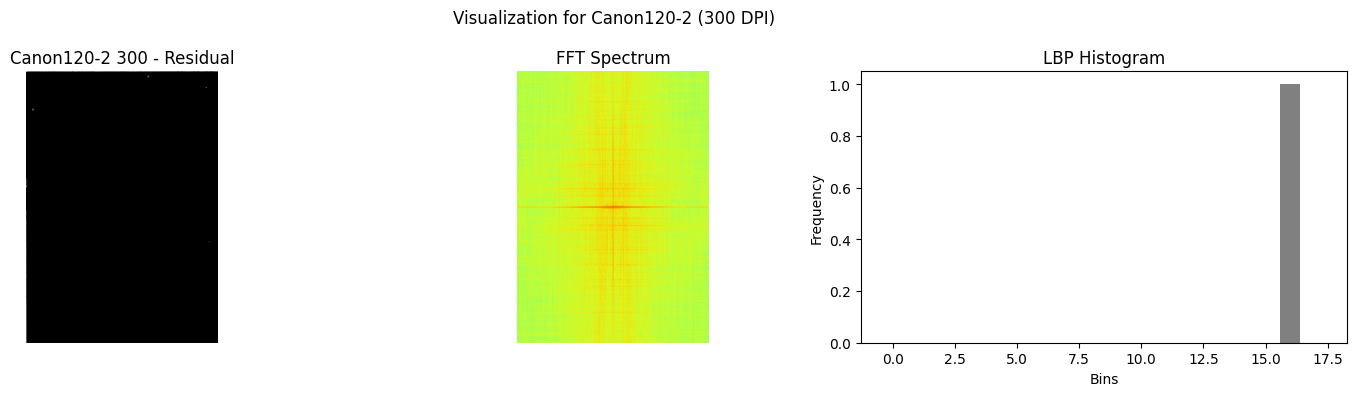

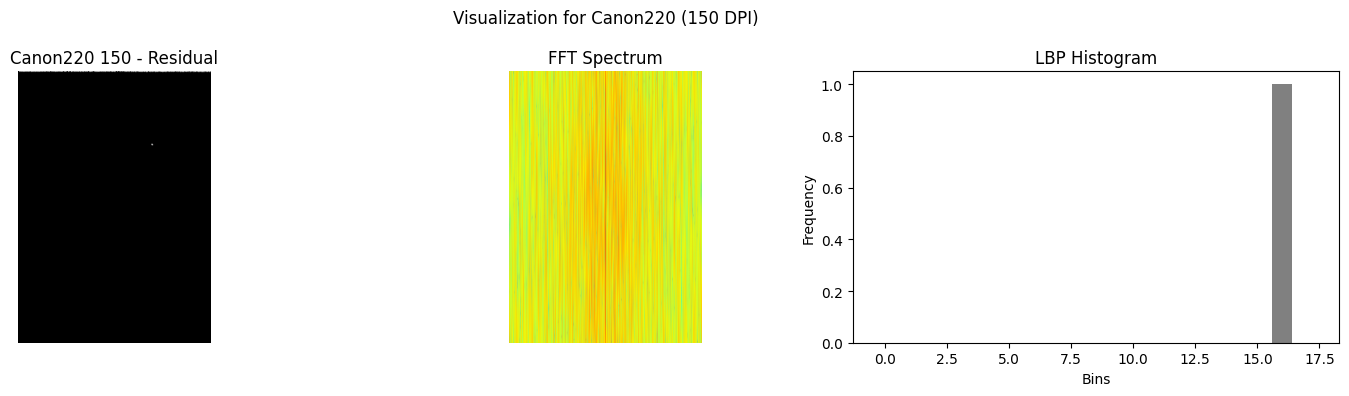

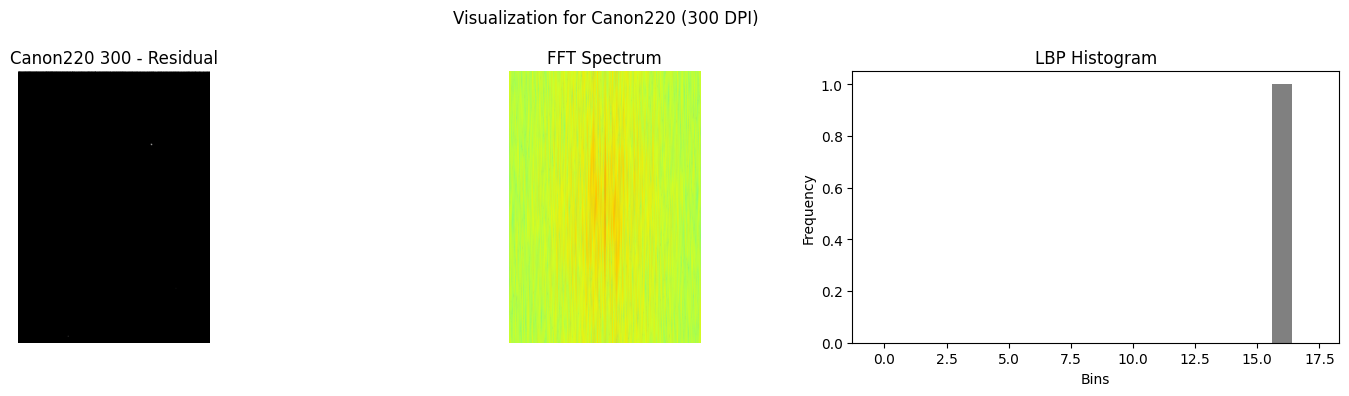

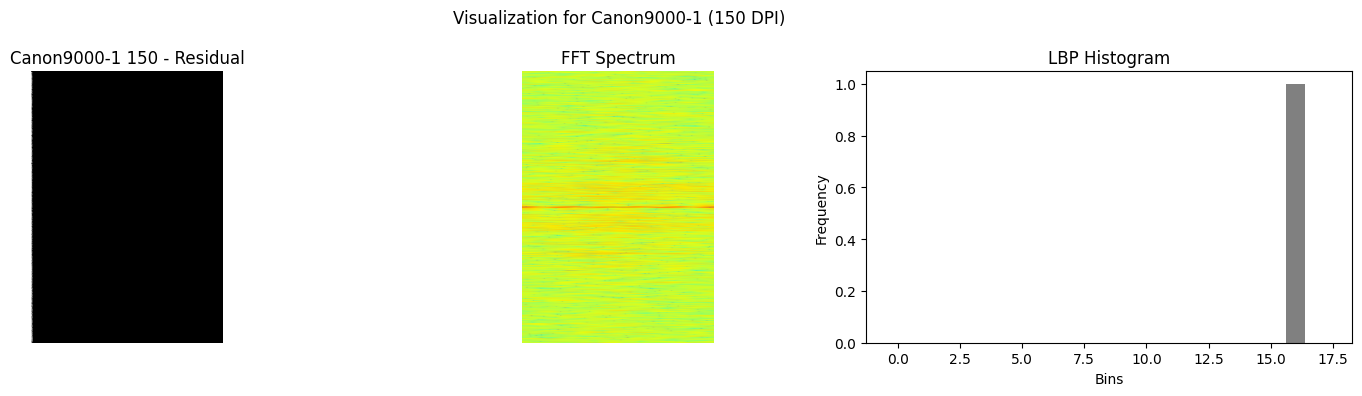

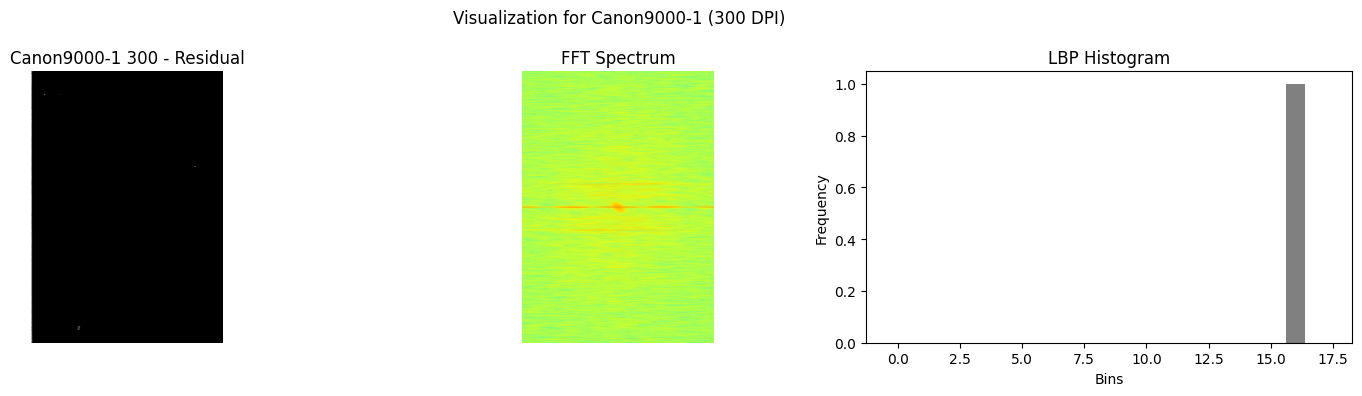

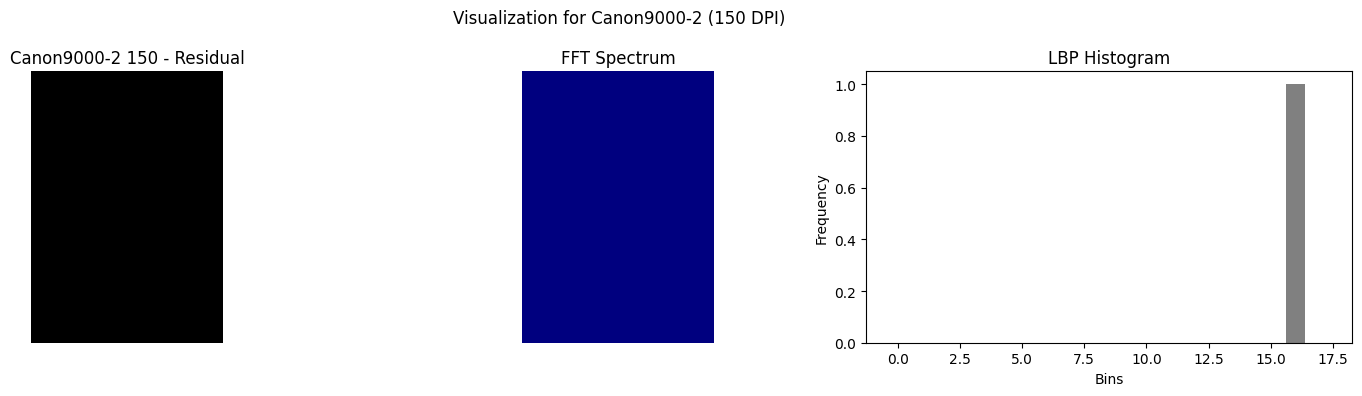

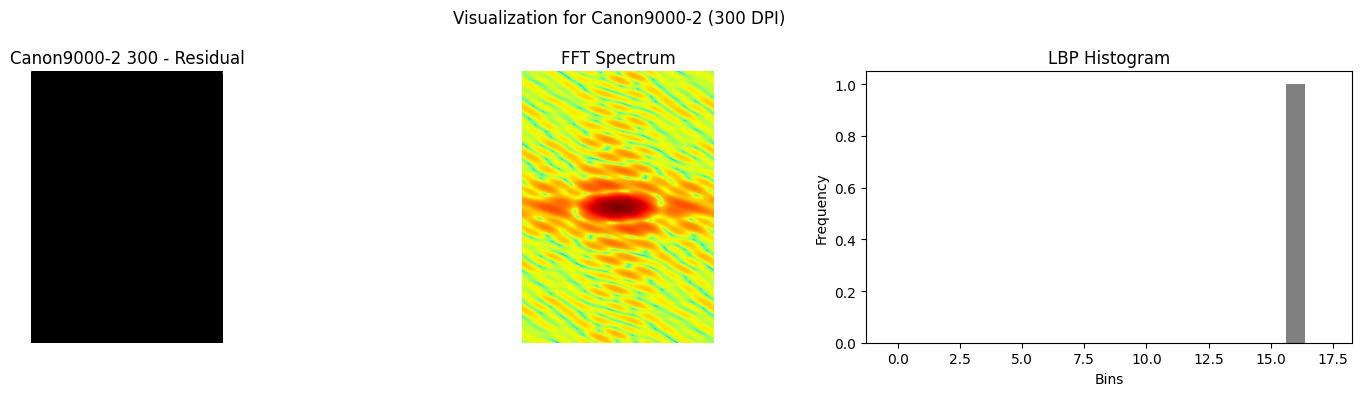

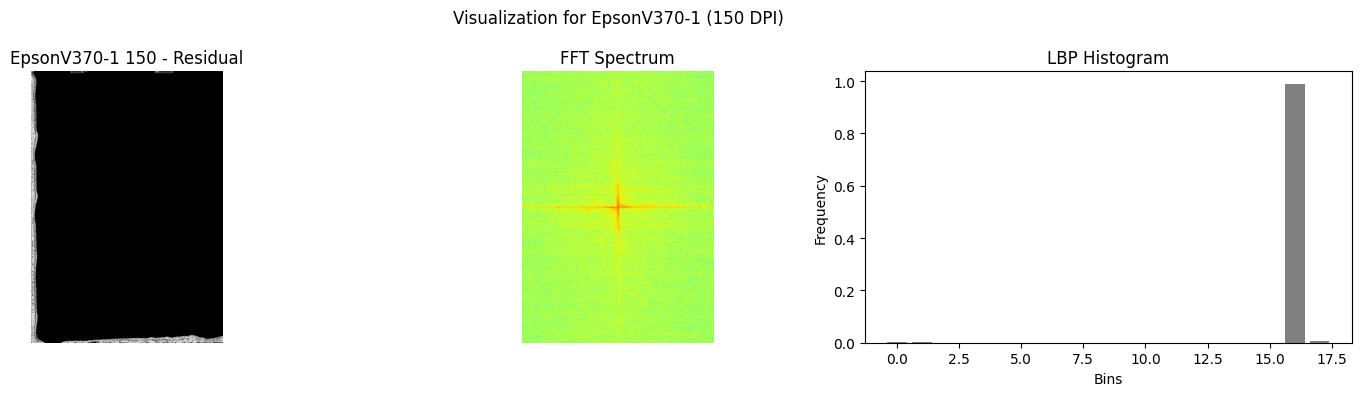

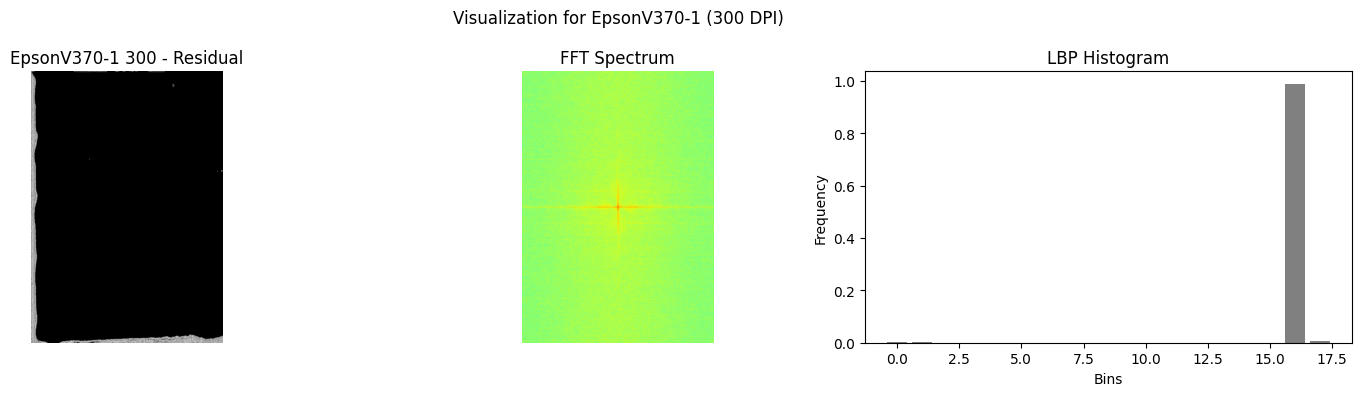

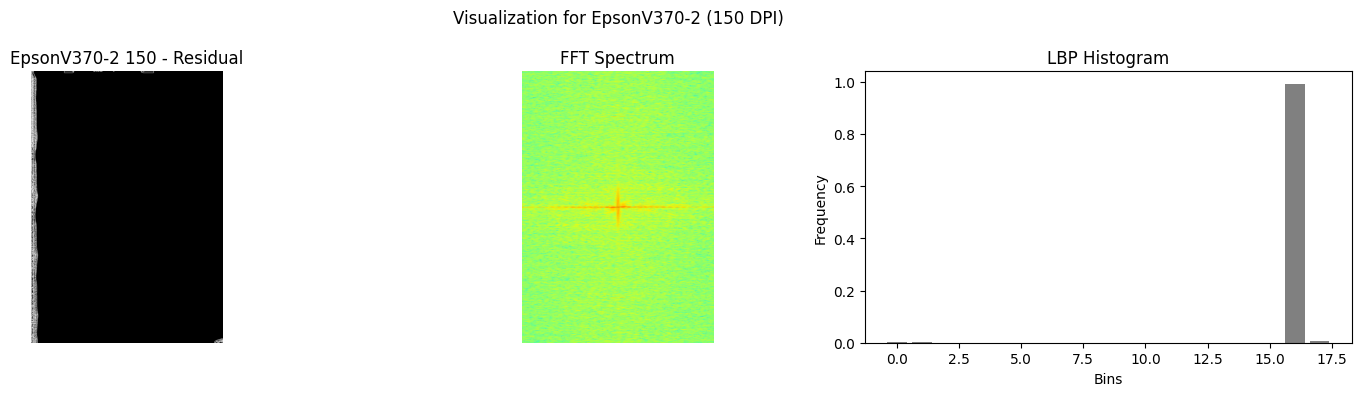

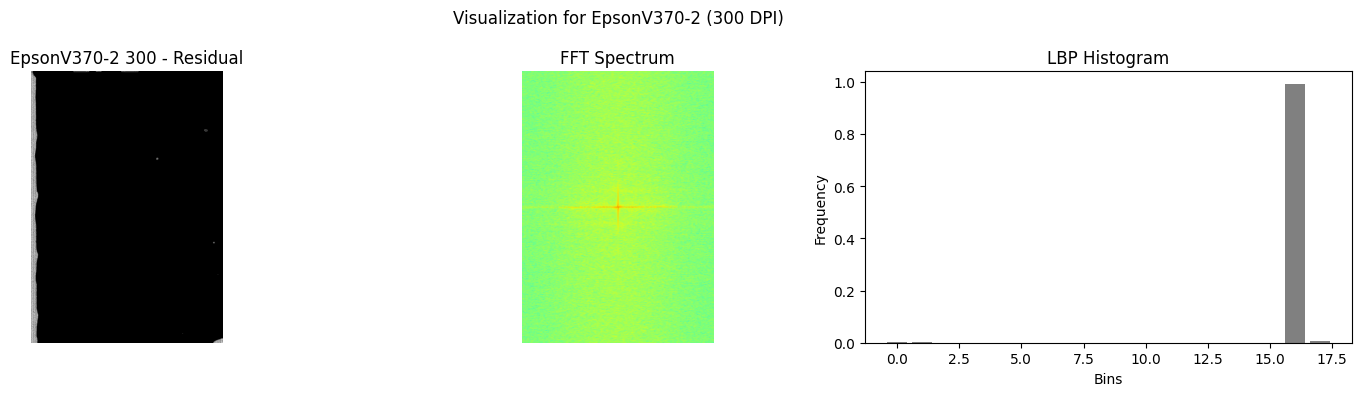

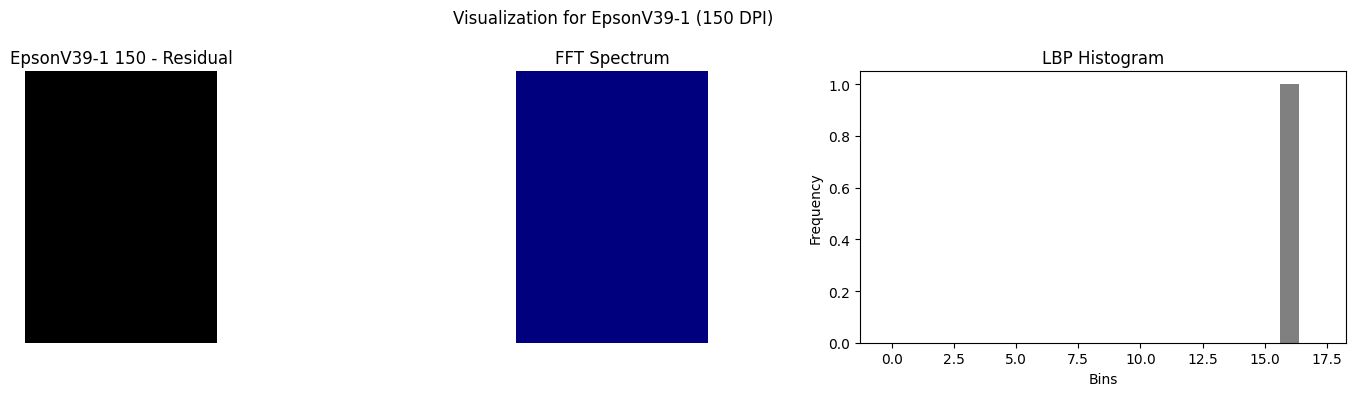

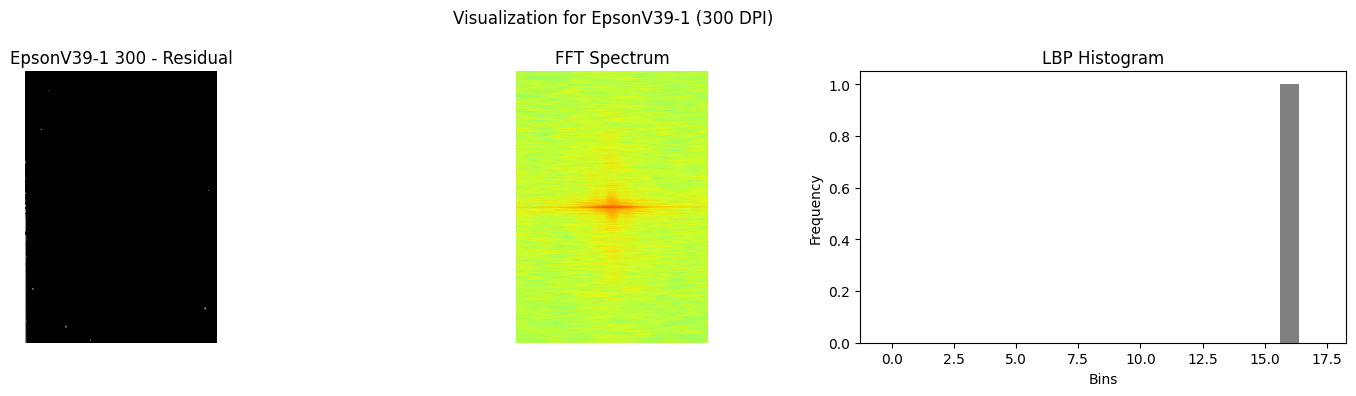

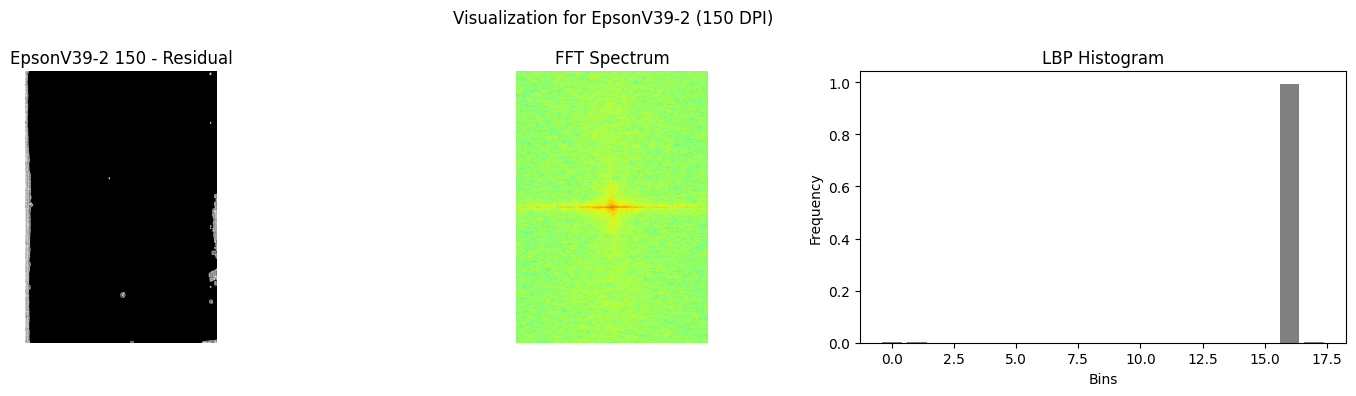

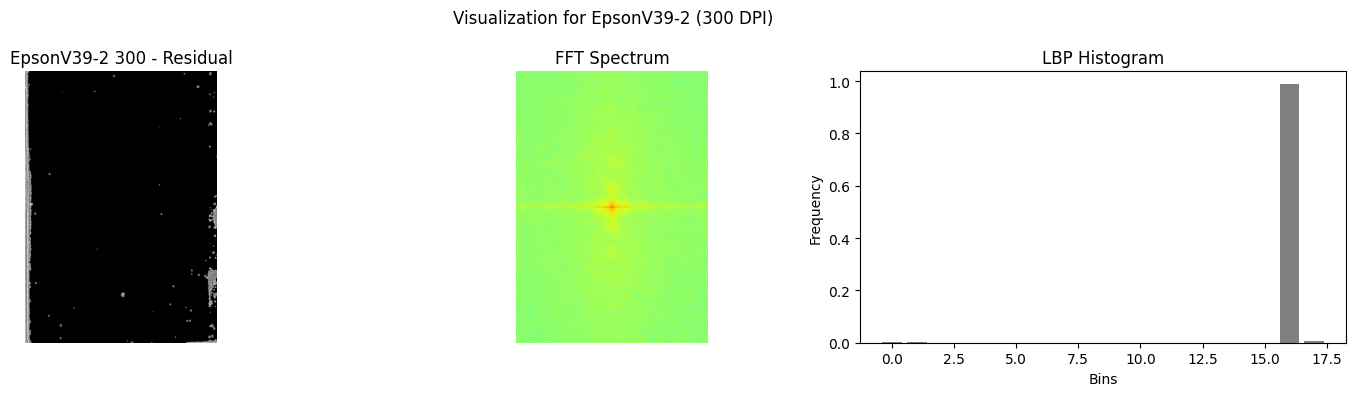

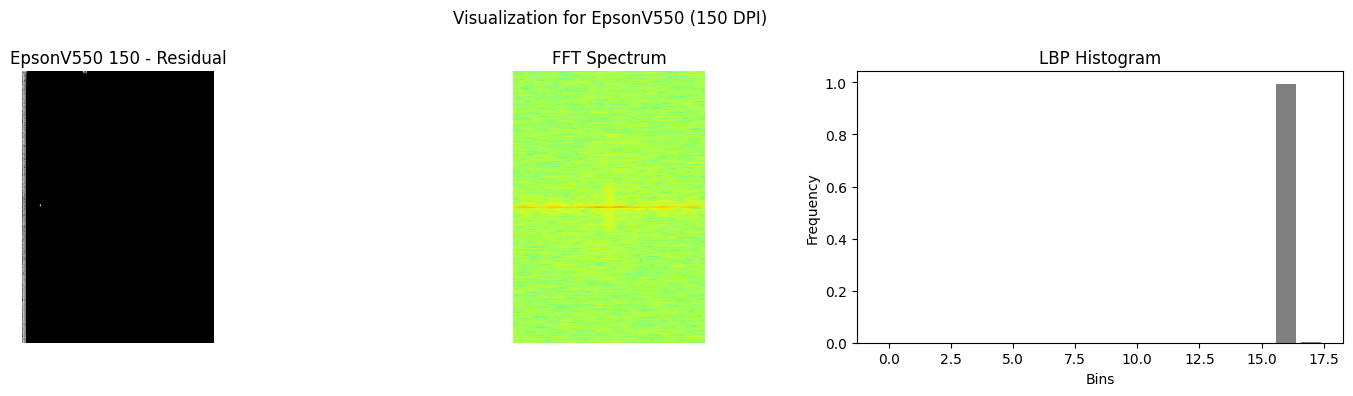

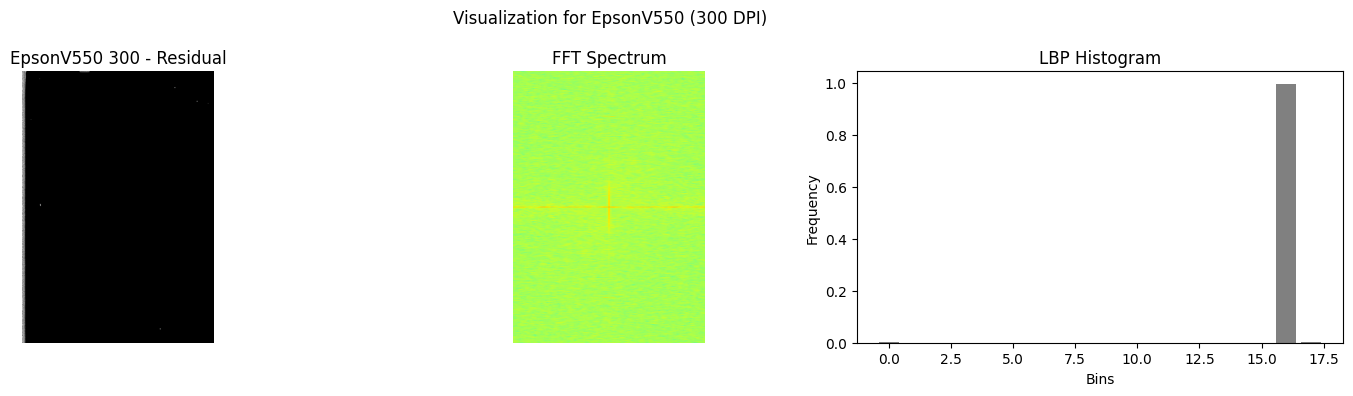

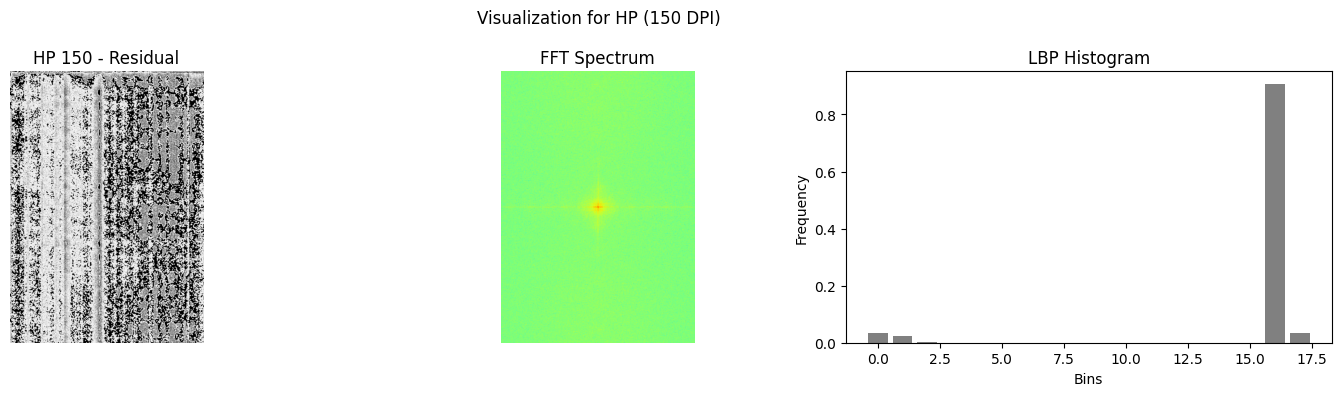

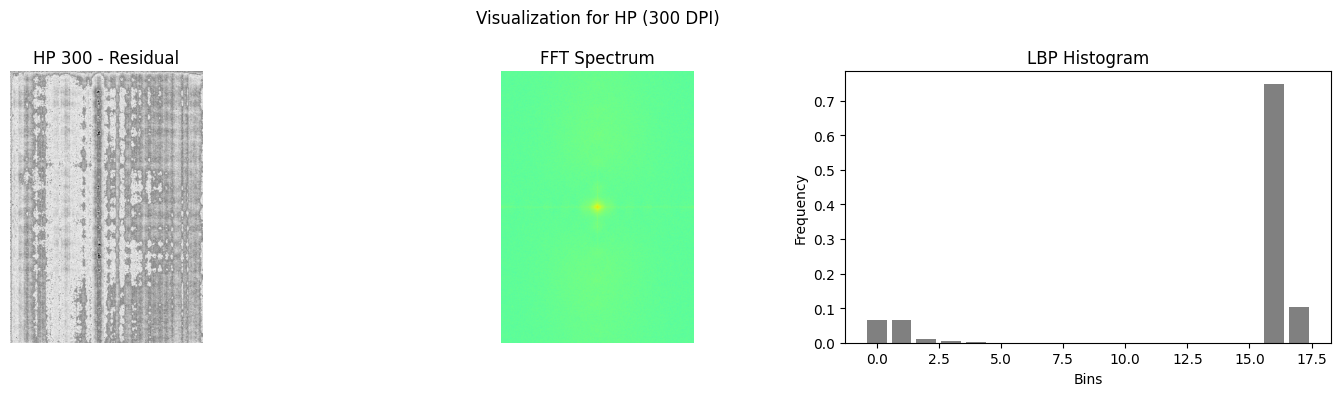

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from skimage.feature import local_binary_pattern
from PIL import Image

# ------------------ PATH ------------------
flatfield_fp_root = Path("ForensicsScannerData/ProcessedImages/flatfield_fingerprint")

# ------------------ FEATURE EXTRACTION ------------------
LBP_P, LBP_R = 16, 2

def extract_visuals(img):
    # Residual-like map
    residual = img - cv2.GaussianBlur(img, (7, 7), 0)

    # FFT magnitude spectrum
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = np.log(1 + np.abs(fshift))

    # LBP histogram
    lbp = local_binary_pattern(img, LBP_P, LBP_R, method="uniform")
    hist, _ = np.histogram(lbp.ravel(),
                           bins=np.arange(0, LBP_P + 3),
                           range=(0, LBP_P + 2),
                           density=True)
    return residual, magnitude, hist

# ------------------ VISUALIZATION ------------------
def visualize_fingerprints(root):
    scanners = [d for d in os.listdir(root) if os.path.isdir(root / d)]
    if not scanners:
        print("⚠️ No scanners found!")
        return

    for scanner in scanners:
        scanner_path = root / scanner
        dpis = [d for d in os.listdir(scanner_path) if os.path.isdir(scanner_path / d)]

        for dpi in dpis:
            fp_path = scanner_path / dpi / "fingerprint.npy"
            if not fp_path.exists():
                print(f"⚠️ Missing fingerprint for {scanner}/{dpi}")
                continue

            img = np.load(fp_path).astype(np.float32)
            img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

            residual, magnitude, hist = extract_visuals(img_norm)

            # ---- Plot ----
            fig, axs = plt.subplots(1, 3, figsize=(15, 4))

            axs[0].imshow(residual, cmap="gray")
            axs[0].set_title(f"{scanner} {dpi} - Residual")
            axs[0].axis("off")

            axs[1].imshow(magnitude, cmap="jet")
            axs[1].set_title("FFT Spectrum")
            axs[1].axis("off")

            axs[2].bar(range(len(hist)), hist, color="gray")
            axs[2].set_title("LBP Histogram")
            axs[2].set_xlabel("Bins")
            axs[2].set_ylabel("Frequency")

            plt.suptitle(f"Visualization for {scanner} ({dpi} DPI)")
            plt.tight_layout()
            plt.show()

# ------------------ RUN ------------------
visualize_fingerprints(flatfield_fp_root)


# Perform image preprocessing:  Official & Wikipedia

In [2]:
import os
import cv2
import numpy as np
import glob
from tqdm import tqdm

# --- USER PATHS ---
# (No changes here)
base_paths = {
    "official": "OfficialData/",
    "wikipedia": "WikipediaData/",
    "processed_root": "ForensicsScannerData/ProcessedImages/"
}

valid_exts = (".png", ".jpg", ".jpeg", ".tif", ".tiff", ".bmp")


# --- CORRECTED HELPER FUNCTION ---
def extract_and_save_residual(src_path, dst_path):
    """
    Loads an image, converts it to grayscale, extracts the
    full-resolution residual noise, and saves it.
    """
    # 1. Load the image in full resolution
    img_bgr = cv2.imread(src_path)
    if img_bgr is None:
        print(f"Warning: Could not read {src_path}. Skipping.")
        return False

    # 2. Convert to grayscale (DO NOT RESIZE)
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    # 3. Denoise the full-resolution image
    # h=10 is an important parameter; you can tune it if needed.
    denoised = cv2.fastNlMeansDenoising(img_gray, None, h=10)

    # 4. Calculate the residual (Original - Denoised)
    # Use cv2.subtract to handle potential negative values gracefully.
    residual = cv2.subtract(img_gray, denoised)

    # 5. Save the full-resolution residual image
    os.makedirs(os.path.dirname(dst_path), exist_ok=True)
    cv2.imwrite(dst_path, residual)
    return True


# --- CORRECTED MAIN PREPROCESSING FUNCTION ---
def preprocess_to_residual(src, base_paths):
    """
    Processes a source directory (e.g., "official") to generate
    full-resolution residual images.
    """
    input_root = base_paths[src]
    output_root = os.path.join(base_paths["processed_root"], f"{src}_residual")

    print(f"\n🔄 Starting residual extraction for source: '{src}'...")

    files = glob.glob(os.path.join(input_root, "**/*"), recursive=True)
    files = [f for f in files if f.lower().endswith(valid_exts)]

    if not files:
        print(f"⚠️ No images found in {input_root}.")
        return

    print(f"Found {len(files)} images in '{src}'.")

    for src_path in tqdm(files, desc=f"Extracting residuals ({src})"):
        # Preserve the folder structure for the output
        rel_path = os.path.relpath(src_path, input_root)
        dst_path = os.path.join(output_root, rel_path)

        # Ensure all output files are saved as .png
        dst_path = os.path.splitext(dst_path)[0] + '.png'

        extract_and_save_residual(src_path, dst_path)

    print(f"✅ Finished: Full-resolution residuals for '{src}' are saved in '{output_root}'.")


# --- MAIN EXECUTION ---
# Run the preprocessing for both data sources
preprocess_to_residual("official", base_paths)
preprocess_to_residual("wikipedia", base_paths)




🔄 Starting residual extraction for source: 'official'...
Found 2200 images in 'official'.


Extracting residuals (official): 100%|███████████████████████████████████████████| 2200/2200 [2:47:17<00:00,  4.56s/it]


✅ Finished: Full-resolution residuals for 'official' are saved in 'ForensicsScannerData/ProcessedImages/official_residual'.

🔄 Starting residual extraction for source: 'wikipedia'...
Found 2368 images in 'wikipedia'.


Extracting residuals (wikipedia): 100%|██████████████████████████████████████████| 2368/2368 [2:32:16<00:00,  3.86s/it]

✅ Finished: Full-resolution residuals for 'wikipedia' are saved in 'ForensicsScannerData/ProcessedImages/wikipedia_residual'.


In [20]:

import os
import cv2
import numpy as np
import pickle
from tqdm import tqdm
import pywt
from concurrent.futures import ThreadPoolExecutor, as_completed

# ---------------------------
# Base Paths (Local Jupyter)
# ---------------------------
base_paths = {
    "official": "ForensicsScannerData/OfficialData/",            
    "wikipedia": "ForensicsScannerData/WikipediaData/",         
    "processed_root": "ForensicsScannerData/Processed_Images/"  
}

OUT_PATH = os.path.join(base_paths["processed_root"], "official_wikipedia_residuals.pkl")

valid_exts = (".png", ".jpg", ".jpeg", ".tif", ".tiff", ".bmp")

# ---------------------------
# Preprocessing helpers
# ---------------------------
def to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim == 3 else img

def resize_to(img, size=(256,256)):
    return cv2.resize(img, size, interpolation=cv2.INTER_AREA)

def normalize_img(img):
    return img.astype(np.float32) / 255.0

def denoise_wavelet(img):
    coeffs = pywt.dwt2(img, 'haar')
    cA, (cH, cV, cD) = coeffs
    # Zero out detail coefficients for denoising
    cH[:] = 0; cV[:] = 0; cD[:] = 0
    return pywt.idwt2((cA,(cH,cV,cD)), 'haar')

def compute_residual(img):
    denoised = denoise_wavelet(img)
    return img - denoised

def process_single_image(fpath):
    """Preprocess one image and return residual"""
    img = cv2.imread(fpath, cv2.IMREAD_COLOR)
    if img is None:
        return None
    gray = to_gray(img)
    gray = resize_to(gray, (256,256))
    gray = normalize_img(gray)
    return compute_residual(gray)

# ---------------------------
# Dataset Processing
# ---------------------------
def process_dataset(base_dir, dataset_name, residuals_dict):
    print(f"🔄 Preprocessing {dataset_name} images...")

    for scanner in tqdm(os.listdir(base_dir)):
        scanner_path = os.path.join(base_dir, scanner)
        if not os.path.isdir(scanner_path):
            continue

        residuals_dict[dataset_name][scanner] = {}

        for dpi in os.listdir(scanner_path):   # 150, 300
            dpi_path = os.path.join(scanner_path, dpi)
            if not os.path.isdir(dpi_path):
                continue

            files = [os.path.join(dpi_path, f) for f in os.listdir(dpi_path)
                     if f.lower().endswith(valid_exts)]

            dpi_residuals = []
            # Parallel processing
            with ThreadPoolExecutor(max_workers=8) as executor:
                futures = [executor.submit(process_single_image, f) for f in files]
                for fut in as_completed(futures):
                    res = fut.result()
                    if res is not None:
                        dpi_residuals.append(res)

            residuals_dict[dataset_name][scanner][dpi] = dpi_residuals

# ---------------------------
# Main Execution
# ---------------------------
if __name__ == "__main__":
    residuals_dict = {"Official": {}, "Wikipedia": {}}

    process_dataset(base_paths["official"], "Official", residuals_dict)
    process_dataset(base_paths["wikipedia"], "Wikipedia", residuals_dict)

    # Ensure output folder exists
    os.makedirs(base_paths["processed_root"], exist_ok=True)

    with open(OUT_PATH, "wb") as f:
        pickle.dump(residuals_dict, f)

    print(f"✅ Saved Official+Wikipedia residuals to {OUT_PATH}")


🔄 Preprocessing Official images...


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:56<00:00,  5.15s/it]


🔄 Preprocessing Wikipedia images...


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:12<00:00,  6.60s/it]


✅ Saved Official+Wikipedia residuals to ForensicsScannerData/Processed_Images/official_wikipedia_residuals.pkl


In [21]:

import os, csv

roots = [
    (base_paths["official"], "Official"),
    (base_paths["wikipedia"], "Wikipedia"),
]

rows = []
for root, ds in roots:
    if not os.path.isdir(root):
        continue
    for scanner in sorted(os.listdir(root)):
        sp = os.path.join(root, scanner)
        if not os.path.isdir(sp):
            continue
        for dpi in sorted(os.listdir(sp)):
            dp = os.path.join(sp, dpi)
            if not os.path.isdir(dp):
                continue
            for f in sorted(os.listdir(dp)):
                if f.lower().endswith(valid_exts):
                    rows.append([ds, scanner, dpi, os.path.join(dp, f)])

# Output CSV path
out_csv = os.path.join(base_paths["processed_root"], "dataset_inventory.csv")

# Ensure output folder exists
os.makedirs(os.path.dirname(out_csv), exist_ok=True)

# Write CSV
with open(out_csv, "w", newline="") as fh:
    w = csv.writer(fh)
    w.writerow(["dataset", "scanner", "dpi", "path"])
    w.writerows(rows)

print(f"✅ Wrote inventory: {out_csv} | rows: {len(rows)}")


✅ Wrote inventory: ForensicsScannerData/Processed_Images/dataset_inventory.csv | rows: 4568


In [22]:

import os
import pickle
import numpy as np
from tqdm import tqdm

# ---------------------------
# Paths (local Jupyter)
# ---------------------------
RES_PATH   = os.path.join(base_paths["processed_root"], "official_wikipedia_residuals.pkl")
FP_PATH    = os.path.join(base_paths["processed_root"], "scanner_fingerprints.pkl")
ORDER_NPY  = os.path.join(base_paths["processed_root"], "fp_keys.npy")
OUT_PATH   = os.path.join(base_paths["processed_root"], "features.pkl")

# ---------------------------
# Load fingerprints and fixed order
# ---------------------------
with open(FP_PATH, "rb") as f:
    scanner_fps = pickle.load(f)

fp_keys = np.load(ORDER_NPY, allow_pickle=True).tolist()
print("✅ Loaded fingerprints and key order. Keys:", fp_keys)

# ---------------------------
# Helper: normalized cross-correlation (ZNCC)
# ---------------------------
def corr2d(a, b):
    a = a.astype(np.float32).ravel()
    b = b.astype(np.float32).ravel()
    a -= a.mean()
    b -= b.mean()
    denom = (np.linalg.norm(a) * np.linalg.norm(b))
    return float((a @ b) / denom) if denom != 0 else 0.0
# ZNCC ≈ cosine similarity of zero-mean, unit-norm vectors

# ---------------------------
# Load residuals (already precomputed; do not preprocess again)
# ---------------------------
with open(RES_PATH, "rb") as f:
    residuals_dict = pickle.load(f)
print("✅ Loaded residuals for datasets:", list(residuals_dict.keys()))

# ---------------------------
# Build features in the exact fp_keys order
# ---------------------------
features, labels = [], []
for dataset_name in ["Official", "Wikipedia"]:
    print(f"🔄 Computing features for {dataset_name} ...")
    for scanner, dpi_dict in tqdm(residuals_dict[dataset_name].items()):
        for dpi, res_list in dpi_dict.items():
            for res in res_list:
                vec = [corr2d(res, scanner_fps[k]) for k in fp_keys]
                features.append(vec)
                labels.append(scanner)

# ---------------------------
# Save features + labels
# ---------------------------
os.makedirs(base_paths["processed_root"], exist_ok=True)

with open(OUT_PATH, "wb") as f:
    pickle.dump({"features": features, "labels": labels}, f)

print(f"✅ Saved features + labels to {OUT_PATH}")
print("Shape:", (len(features), len(features[0]) if features else 0))


FileNotFoundError: [Errno 2] No such file or directory: 'ForensicsScannerData/Processed_Images/scanner_fingerprints.pkl'

In [17]:
import glob

valid_exts = (".png", ".jpg", ".jpeg", ".tif", ".tiff", ".bmp")

official_files = glob.glob("/content/drive/MyDrive/Objective1/Official/**/*", recursive=True)
official_files = [f for f in official_files if f.lower().endswith(valid_exts)]
print(f"✅ Found {len(official_files)} images in OfficialData.")

wiki_files = glob.glob("/content/drive/MyDrive/Objective1/Wikipedia/**/*", recursive=True)
wiki_files = [f for f in wiki_files if f.lower().endswith(valid_exts)]
print(f"✅ Found {len(wiki_files)} images in WikipediaData.")


   ---------------------------------------- 0.0/4.2 MB ? eta -:--:--
   --------- ------------------------------ 1.0/4.2 MB 6.3 MB/s eta 0:00:01
   ------------ --------------------------- 1.3/4.2 MB 5.6 MB/s eta 0:00:01
   ------------------------ --------------- 2.6/4.2 MB 4.4 MB/s eta 0:00:01
   ----------------------------- ---------- 3.1/4.2 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 4.2/4.2 MB 4.2 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


# PRNU Fingerprint Generation from Official & Wikipeida Residual Images

In [9]:
import os
import cv2
import numpy as np
from pathlib import Path
from tqdm import tqdm
from PIL import Image
import shutil
from collections import Counter

# ------------------ INPUT PATHS ------------------
base_paths = {
    "official_residual": "ForensicsScannerData/ProcessedImages/official_residual",
    "wikipedia_residual": "ForensicsScannerData/ProcessedImages/wikipedia_residual",
    "processed_root": "ForensicsScannerData/ProcessedImages/"
}

# ------------------ OUTPUT ROOTS ------------------
official_fp_root = Path(base_paths["processed_root"]) / "official_fingerprint"
wikipedia_fp_root = Path(base_paths["processed_root"]) / "wikipedia_fingerprint"

# Clean up old directories and create new ones
for root in [official_fp_root, wikipedia_fp_root]:
    if root.exists():
        shutil.rmtree(root)
    root.mkdir(parents=True, exist_ok=True)

# ------------------ PRNU-SAFE ALIGNMENT FUNCTION ------------------
def align_to_shape(img_array, target_shape):
    """
    Aligns an image to the target shape while preserving PRNU:
    - Center-crops if the image is larger.
    - Zero-pads if the image is smaller.
    """
    h, w = img_array.shape
    th, tw = target_shape
    
    # Return immediately if shapes already match
    if h == th and w == tw:
        return img_array

    # Crop larger images from the center
    if h > th:
        start_h = (h - th) // 2
        img_array = img_array[start_h : start_h + th, :]
    if w > tw:
        start_w = (w - tw) // 2
        img_array = img_array[:, start_w : start_w + tw]

    # Pad smaller images from the center
    pad_h_before, pad_w_before = 0, 0
    pad_h_after, pad_w_after = 0, 0
    
    if img_array.shape[0] < th:
        pad_h_total = th - img_array.shape[0]
        pad_h_before = pad_h_total // 2
        pad_h_after = pad_h_total - pad_h_before
        
    if img_array.shape[1] < tw:
        pad_w_total = tw - img_array.shape[1]
        pad_w_before = pad_w_total // 2
        pad_w_after = pad_w_total - pad_w_before
        
    if any([pad_h_before, pad_h_after, pad_w_before, pad_w_after]):
        img_array = np.pad(img_array, 
                           ((pad_h_before, pad_h_after), (pad_w_before, pad_w_after)), 
                           mode="constant", constant_values=0)
                           
    return img_array

# ------------------ FINGERPRINT GENERATOR ------------------
def compute_fingerprint_images(residual_dir, out_root, source_name):
    """
    Converts residual images to PRNU Fingerprints by averaging them.
    """
    print(f"\n🔄 Generating PRNU fingerprints for {source_name}...")
    
    scanners = [d for d in os.listdir(residual_dir) if os.path.isdir(os.path.join(residual_dir, d))]
    if not scanners:
        print(f"⚠️ No scanners found in {residual_dir}")
        return

    for scanner in scanners:
        scanner_path = Path(residual_dir) / scanner
        dpis = [d for d in os.listdir(scanner_path) if os.path.isdir(scanner_path / d)]
        
        for dpi in dpis:
            dpi_path = scanner_path / dpi
            out_dpi_path = Path(out_root) / scanner / dpi
            out_dpi_path.mkdir(parents=True, exist_ok=True)

            files = [f for f in os.listdir(dpi_path) if f.lower().endswith((".png", ".jpg", ".jpeg", ".tif", ".tiff"))]
            if not files:
                print(f"⚠️ No residuals found in {scanner}/{dpi}")
                continue

            print(f"   ➡️ Processing {len(files)} residuals for {scanner} ({dpi})...")

            # --- Determine the most common shape ---
            try:
                shapes = [Image.open(dpi_path / f).size for f in files] # .size returns (width, height)
                most_common_shape_wh = Counter(shapes).most_common(1)[0][0]
                # Convert shape to (height, width) for numpy
                target_shape = (most_common_shape_wh[1], most_common_shape_wh[0])
                print(f"      - Target shape selected: {target_shape}")
            except Exception as e:
                print(f"      - ⚠️ Error determining shape: {e}. Skipping this group.")
                continue
            
            # Load and align all residuals in the group
            stack = []
            for f in tqdm(files, desc=f"{scanner}-{dpi}", leave=False):
                try:
                    img = np.array(Image.open(dpi_path / f).convert("L"), dtype=np.float32)
                    aligned_img = align_to_shape(img, target_shape)
                    stack.append(aligned_img)
                except Exception as e:
                    print(f"      - ⚠️ Failed to load {f}: {e}")

            if not stack:
                print(f"      - ⚠️ Could not process any images in this group.")
                continue

            # Average the stack of residuals to create the fingerprint
            fingerprint = np.mean(stack, axis=0)

            # Save the fingerprint as a .npy file
            np.save(out_dpi_path / "fingerprint.npy", fingerprint)

            # Save a normalized version as a .png for visualization
            fp_img_normalized = cv2.normalize(fingerprint, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
            cv2.imwrite(str(out_dpi_path / "fingerprint.png"), fp_img_normalized)
            
            print(f"      - ✅ Fingerprint saved for {scanner}/{dpi}")

    print(f"\n🎯 Finished: PRNU fingerprints for {source_name} generated in '{out_root}'")

# ------------------ RUN THE PROCESS ------------------
compute_fingerprint_images(base_paths["official_residual"], official_fp_root, "Official")
compute_fingerprint_images(base_paths["wikipedia_residual"], wikipedia_fp_root, "Wikipedia")



🔄 Generating PRNU fingerprints for Official...
   ➡️ Processing 100 residuals for Canon120-1 (150)...
      - Target shape selected: (1752, 1240)


      - ✅ Fingerprint saved for Canon120-1/150
   ➡️ Processing 100 residuals for Canon120-1 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for Canon120-1/300
   ➡️ Processing 100 residuals for Canon120-2 (150)...
      - Target shape selected: (1752, 1240)


      - ✅ Fingerprint saved for Canon120-2/150
   ➡️ Processing 100 residuals for Canon120-2 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for Canon120-2/300
   ➡️ Processing 100 residuals for Canon220 (150)...
      - Target shape selected: (1752, 1240)


      - ✅ Fingerprint saved for Canon220/150
   ➡️ Processing 100 residuals for Canon220 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for Canon220/300
   ➡️ Processing 100 residuals for Canon9000-1 (150)...
      - Target shape selected: (1754, 1240)


      - ✅ Fingerprint saved for Canon9000-1/150
   ➡️ Processing 100 residuals for Canon9000-1 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for Canon9000-1/300
   ➡️ Processing 100 residuals for Canon9000-2 (150)...
      - Target shape selected: (1754, 1240)


      - ✅ Fingerprint saved for Canon9000-2/150
   ➡️ Processing 100 residuals for Canon9000-2 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for Canon9000-2/300
   ➡️ Processing 100 residuals for EpsonV370-1 (150)...
      - Target shape selected: (1754, 1236)


      - ✅ Fingerprint saved for EpsonV370-1/150
   ➡️ Processing 100 residuals for EpsonV370-1 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for EpsonV370-1/300
   ➡️ Processing 100 residuals for EpsonV370-2 (150)...
      - Target shape selected: (1754, 1236)


      - ✅ Fingerprint saved for EpsonV370-2/150
   ➡️ Processing 100 residuals for EpsonV370-2 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for EpsonV370-2/300
   ➡️ Processing 100 residuals for EpsonV39-1 (150)...
      - Target shape selected: (1754, 1240)


      - ✅ Fingerprint saved for EpsonV39-1/150
   ➡️ Processing 100 residuals for EpsonV39-1 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for EpsonV39-1/300
   ➡️ Processing 100 residuals for EpsonV39-2 (150)...
      - Target shape selected: (1754, 1240)


      - ✅ Fingerprint saved for EpsonV39-2/150
   ➡️ Processing 100 residuals for EpsonV39-2 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for EpsonV39-2/300
   ➡️ Processing 100 residuals for EpsonV550 (150)...
      - Target shape selected: (1754, 1239)


      - ✅ Fingerprint saved for EpsonV550/150
   ➡️ Processing 100 residuals for EpsonV550 (300)...
      - Target shape selected: (3508, 2478)


      - ✅ Fingerprint saved for EpsonV550/300
   ➡️ Processing 100 residuals for HP (150)...
      - Target shape selected: (1743, 1240)


      - ✅ Fingerprint saved for HP/150
   ➡️ Processing 100 residuals for HP (300)...
      - Target shape selected: (3487, 2481)


      - ✅ Fingerprint saved for HP/300

🎯 Finished: PRNU fingerprints for Official generated in 'ForensicsScannerData\ProcessedImages\official_fingerprint'

🔄 Generating PRNU fingerprints for Wikipedia...
   ➡️ Processing 108 residuals for Canon120-1 (150)...
      - Target shape selected: (1752, 1240)


      - ✅ Fingerprint saved for Canon120-1/150
   ➡️ Processing 108 residuals for Canon120-1 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for Canon120-1/300
   ➡️ Processing 108 residuals for Canon120-2 (150)...
      - Target shape selected: (1752, 1240)


      - ✅ Fingerprint saved for Canon120-2/150
   ➡️ Processing 108 residuals for Canon120-2 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for Canon120-2/300
   ➡️ Processing 108 residuals for Canon220 (150)...
      - Target shape selected: (1752, 1240)


      - ✅ Fingerprint saved for Canon220/150
   ➡️ Processing 108 residuals for Canon220 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for Canon220/300
   ➡️ Processing 108 residuals for Canon9000-1 (150)...
      - Target shape selected: (1754, 1240)


      - ✅ Fingerprint saved for Canon9000-1/150
   ➡️ Processing 108 residuals for Canon9000-1 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for Canon9000-1/300
   ➡️ Processing 108 residuals for Canon9000-2 (150)...
      - Target shape selected: (1754, 1240)


      - ✅ Fingerprint saved for Canon9000-2/150
   ➡️ Processing 99 residuals for Canon9000-2 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for Canon9000-2/300
   ➡️ Processing 108 residuals for EpsonV370-1 (150)...
      - Target shape selected: (1754, 1236)


      - ✅ Fingerprint saved for EpsonV370-1/150
   ➡️ Processing 108 residuals for EpsonV370-1 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for EpsonV370-1/300
   ➡️ Processing 109 residuals for EpsonV370-2 (150)...
      - Target shape selected: (1754, 1236)


      - ✅ Fingerprint saved for EpsonV370-2/150
   ➡️ Processing 108 residuals for EpsonV370-2 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for EpsonV370-2/300
   ➡️ Processing 108 residuals for EpsonV39-1 (150)...
      - Target shape selected: (1754, 1240)


      - ✅ Fingerprint saved for EpsonV39-1/150
   ➡️ Processing 108 residuals for EpsonV39-1 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for EpsonV39-1/300
   ➡️ Processing 108 residuals for EpsonV39-2 (150)...
      - Target shape selected: (1754, 1240)


      - ✅ Fingerprint saved for EpsonV39-2/150
   ➡️ Processing 108 residuals for EpsonV39-2 (300)...
      - Target shape selected: (3508, 2480)


      - ✅ Fingerprint saved for EpsonV39-2/300
   ➡️ Processing 108 residuals for EpsonV550 (150)...
      - Target shape selected: (1754, 1239)


      - ✅ Fingerprint saved for EpsonV550/150
   ➡️ Processing 108 residuals for EpsonV550 (300)...
      - Target shape selected: (3508, 2478)


      - ✅ Fingerprint saved for EpsonV550/300
   ➡️ Processing 108 residuals for HP (150)...
      - Target shape selected: (1743, 1240)


      - ✅ Fingerprint saved for HP/150
   ➡️ Processing 108 residuals for HP (300)...
      - Target shape selected: (3487, 2481)


      - ✅ Fingerprint saved for HP/300

🎯 Finished: PRNU fingerprints for Wikipedia generated in 'ForensicsScannerData\ProcessedImages\wikipedia_fingerprint'


# Milestone 2: Feature Engineering & Baseline Modeling(Official & Wikipeida)


# Week 3: 
## Extract hand-crafted features like: 
### Noise patterns 
### Frequency domain features (FFT) 
### Texture descriptors (LBP)

In [74]:
import os
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from tqdm import tqdm
import pandas as pd

# ------------------ PARAMETERS ------------------
LBP_RADIUS = 3
LBP_POINTS = 8 * LBP_RADIUS

# ------------------ HELPER FUNCTIONS ------------------

def extract_noise(img):
    """High-pass filter to get noise pattern"""
    img = img.astype(np.float32)
    noise = img - cv2.GaussianBlur(img, (3, 3), 0)
    return noise

def extract_fft_features(img):
    """Extract FFT magnitude spectrum features"""
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    features = [
        np.mean(magnitude_spectrum[:magnitude_spectrum.shape[0]//2, :magnitude_spectrum.shape[1]//2]),
        np.mean(magnitude_spectrum[:magnitude_spectrum.shape[0]//2, magnitude_spectrum.shape[1]//2:]),
        np.mean(magnitude_spectrum[magnitude_spectrum.shape[0]//2:, :magnitude_spectrum.shape[1]//2]),
        np.mean(magnitude_spectrum[magnitude_spectrum.shape[0]//2:, magnitude_spectrum.shape[1]//2:])
    ]
    return features

def extract_lbp_features(img):
    """Extract LBP histogram"""
    lbp = local_binary_pattern(img, LBP_POINTS, LBP_RADIUS, method="uniform")
    (hist, _) = np.histogram(lbp.ravel(),
                             bins=np.arange(0, LBP_POINTS + 3),
                             range=(0, LBP_POINTS + 2))
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    return hist.tolist()

# ------------------ DATASETS PATHS ------------------
datasets = {
    "official": "ForensicsScannerData/ProcessedImages/official_residual",
    "wikipedia": "ForensicsScannerData/ProcessedImages/wikipedia_residual"
}

all_rows = []  # Combined features

# ------------------ FEATURE EXTRACTION LOOP ------------------
for dataset_name, residual_root in datasets.items():
    print(f"\n🔍 Processing dataset: {dataset_name}")
    
    feature_save_path = f"ForensicsScannerData/Features/{dataset_name}_features.csv"
    rows = []

    scanners = [d for d in os.listdir(residual_root) if os.path.isdir(os.path.join(residual_root, d))]
    for scanner in scanners:
        scanner_path = os.path.join(residual_root, scanner)
        dpis = [d for d in os.listdir(scanner_path) if os.path.isdir(os.path.join(scanner_path, d))]
        
        for dpi in dpis:
            dpi_path = os.path.join(scanner_path, dpi)
            files = [f for f in os.listdir(dpi_path) if f.endswith(".png")]
            
            for f in tqdm(files, desc=f"{scanner}-{dpi}", leave=False):
                try:
                    img = cv2.imread(os.path.join(dpi_path, f), cv2.IMREAD_GRAYSCALE)
                    noise = extract_noise(img)
                    fft_feat = extract_fft_features(noise)
                    lbp_feat = extract_lbp_features(noise)
                    
                    row = [dataset_name, scanner, dpi, f] + fft_feat + lbp_feat
                    rows.append(row)
                    all_rows.append(row)  # Add to combined dataset
                except Exception as e:
                    print(f"⚠️ Skipping {f}: {e}")
    
    fft_cols = [f"fft_{i}" for i in range(4)]
    lbp_cols = [f"lbp_{i}" for i in range(LBP_POINTS + 2)]
    columns = ["dataset", "scanner", "dpi", "filename"] + fft_cols + lbp_cols

    df = pd.DataFrame(rows, columns=columns)
    os.makedirs(os.path.dirname(feature_save_path), exist_ok=True)
    df.to_csv(feature_save_path, index=False)
    print(f"✅ {dataset_name} features saved at: {feature_save_path}")

# ------------------ SAVE COMBINED FEATURES ------------------
combined_feature_path = "ForensicsScannerData/Features/combined_features.csv"
df_combined = pd.DataFrame(all_rows, columns=columns)
df_combined.to_csv(combined_feature_path, index=False)
print(f"\n✅ Combined features saved at: {combined_feature_path}")



🔍 Processing dataset: official


Canon120-1-150:   0%|                                                                          | 0/100 [00:00<?, ?it/s]C:\Users\nitis\gpu-env\Lib\site-packages\skimage\feature\texture.py:385: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
                                                                                                                       

✅ official features saved at: ForensicsScannerData/Features/official_features.csv

🔍 Processing dataset: wikipedia


✅ wikipedia features saved at: ForensicsScannerData/Features/wikipedia_features.csv

✅ Combined features saved at: ForensicsScannerData/Features/combined_features.csv


## PRNU Fingerprint Visualization with Residuals, FFT Spectrum, and LBP Features

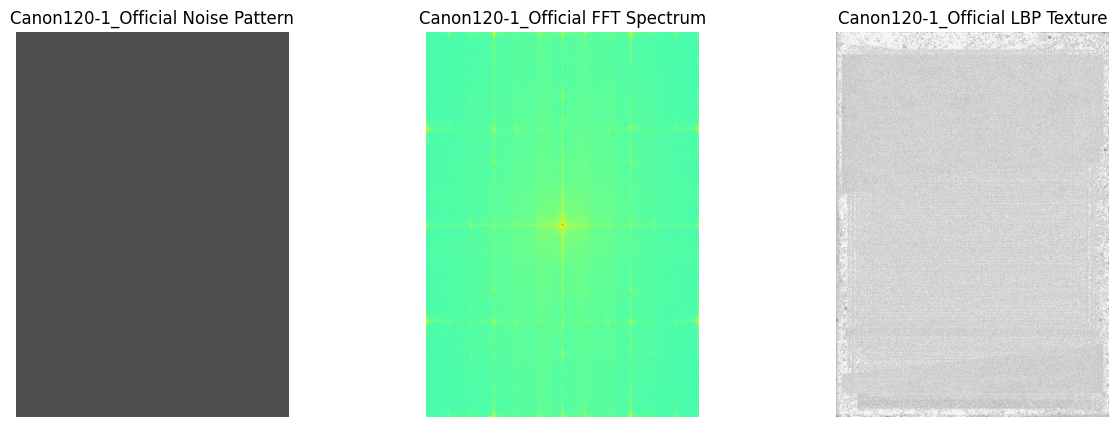

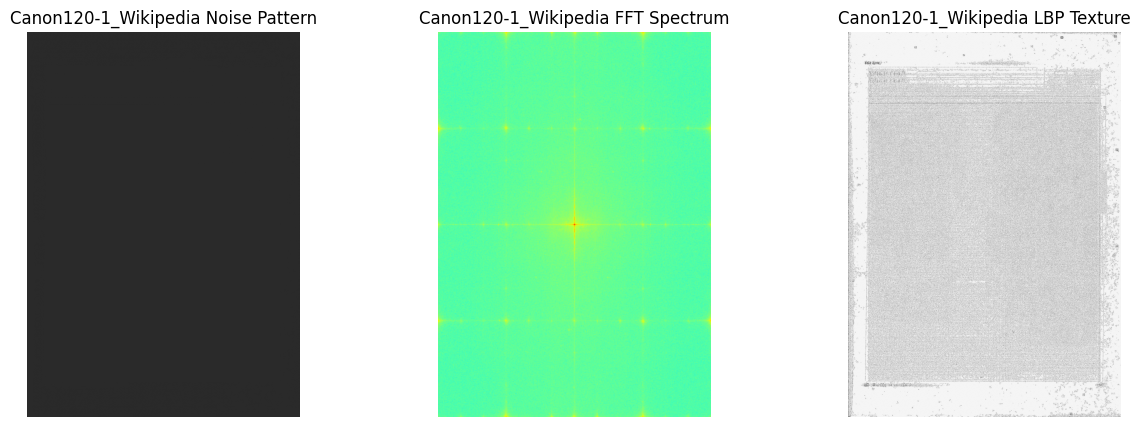

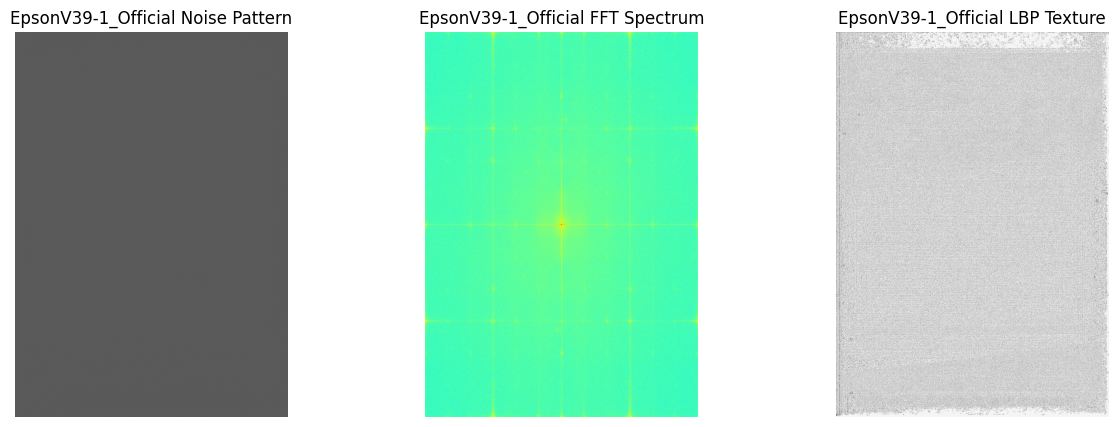

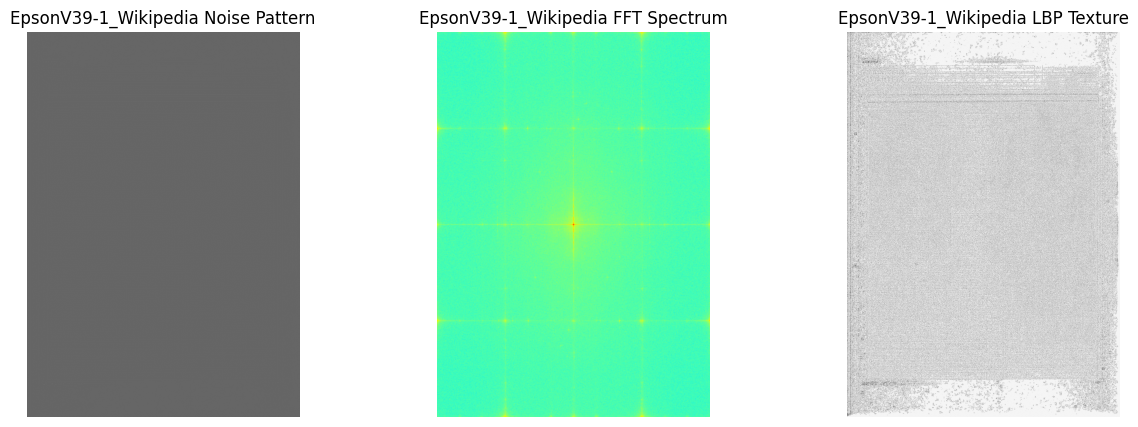

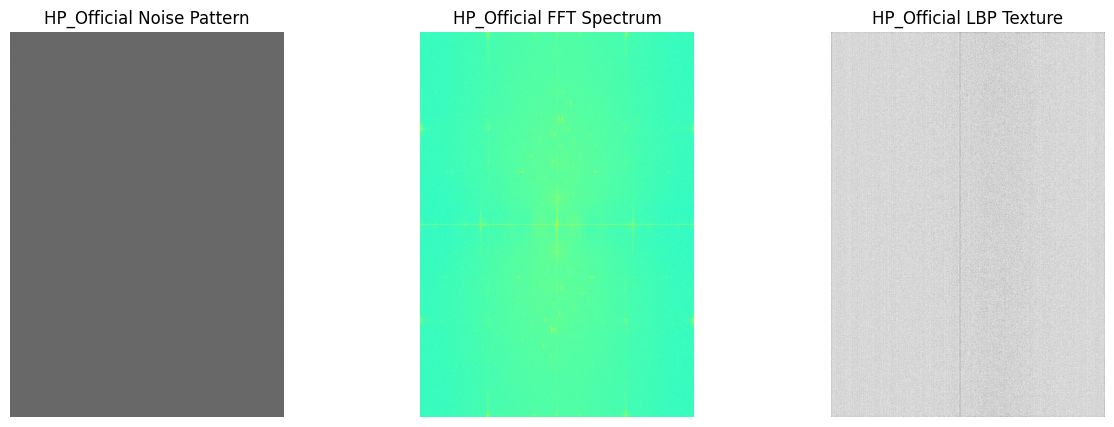

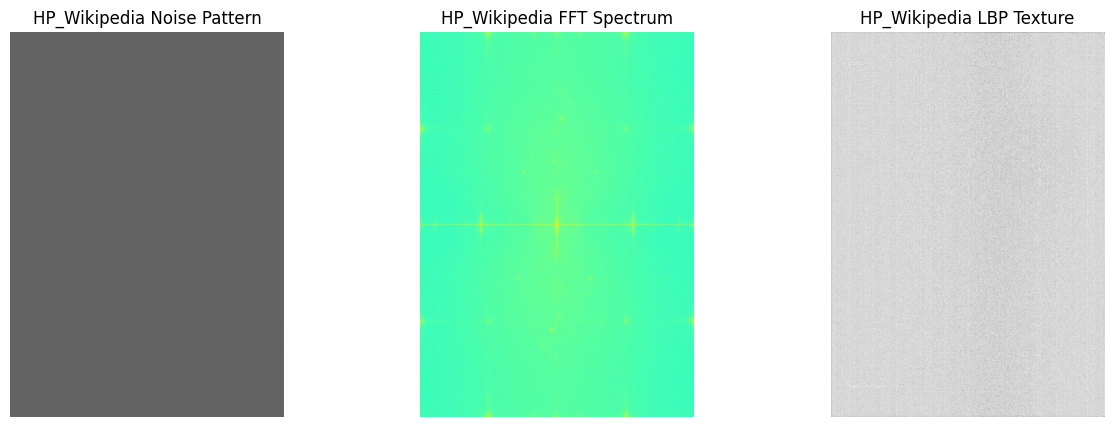

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# ----------------- Helper Functions -----------------
def show_features(image_path, title_prefix=""):
    """
    Extract and visualize:
    1. Noise Pattern
    2. FFT Spectrum (from first code)
    3. LBP Texture
    """

    # Load grayscale image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE).astype(np.float32)

    # ---------- 1. Noise Pattern (Residual) ----------
    denoised = cv2.GaussianBlur(img, (5, 5), 0)
    noise_pattern = img - denoised

    # ---------- 2. FFT Spectrum  ----------
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(1 + np.abs(fshift))   

    # ---------- 3. LBP Texture ----------
    radius = 3
    n_points = 8 * radius
    lbp = local_binary_pattern(img.astype(np.uint8), n_points, radius, method="uniform")

    # ---------- Plot ----------
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(noise_pattern, cmap="gray")
    axs[0].set_title(f"{title_prefix} Noise Pattern")
    axs[0].axis("off")

    axs[1].imshow(magnitude_spectrum, cmap="jet")  
    axs[1].set_title(f"{title_prefix} FFT Spectrum")
    axs[1].axis("off")

    axs[2].imshow(lbp, cmap="gray")
    axs[2].set_title(f"{title_prefix} LBP Texture")
    axs[2].axis("off")

    plt.show()


# ----------------- Example Usage -----------------
example_images = {
    "Canon120-1_Official": "ForensicsScannerData/ProcessedImages/official_fingerprint/Canon120-1/300/fingerprint.png",
    "Canon120-1_Wikipedia": "ForensicsScannerData/ProcessedImages/wikipedia_fingerprint/Canon120-1/300/fingerprint.png",
    "EpsonV39-1_Official": "ForensicsScannerData/ProcessedImages/official_fingerprint/EpsonV39-1/300/fingerprint.png",
    "EpsonV39-1_Wikipedia": "ForensicsScannerData/ProcessedImages/wikipedia_fingerprint/EpsonV39-1/300/fingerprint.png",
    "HP_Official": "ForensicsScannerData/ProcessedImages/official_fingerprint/HP/300/fingerprint.png",
    "HP_Wikipedia": "ForensicsScannerData/ProcessedImages/wikipedia_fingerprint/HP/300/fingerprint.png"
}

for label, path in example_images.items():
    try:
        show_features(path, title_prefix=label)
    except Exception as e:
        print(f"⚠️ Error for {label}: {e}")


In [6]:
df= pd.read_csv("ForensicsScannerData/Features/combined_features.csv")
df.head(5)

dataset     scanner  dpi    filename     fft_0     fft_1     fft_2  \
0  official  Canon120-1  150    s1_1.png  6.212023  6.212140  6.213313   
1  official  Canon120-1  150   s1_10.png  6.413388  6.429340  6.429591   
2  official  Canon120-1  150  s1_100.png  5.491939  5.486752  5.485027   
3  official  Canon120-1  150   s1_11.png  6.094342  6.103191  6.101938   
4  official  Canon120-1  150   s1_12.png  5.592294  5.603096  5.601402   

      fft_3     lbp_0     lbp_1  ...    lbp_16    lbp_17    lbp_18    lbp_19  \
0  6.208603  0.007837  0.003823  ...  0.002299  0.014379  0.002508  0.003404   
1  6.411295  0.005921  0.003189  ...  0.000930  0.008381  0.001847  0.003391   
2  5.491986  0.003280  0.001185  ...  0.000845  0.003312  0.001592  0.003115   
3  6.096111  0.006292  0.002886  ...  0.001525  0.015909  0.003102  0.005181   
4  5.592360  0.009593  0.006881  ...  0.001916  0.007482  0.003164  0.006565   

     lbp_20    lbp_21    lbp_22    lbp_23    lbp_24    lbp_25  
0  0.000515  0.003237  0.003633  0.007439  0.836208  0.109245  
1  0.000496  0.003230  0.003168  0.006296  0.882362  0.077966  
2  0.000568  0.003099  0.002827  0.003776  0.926973  0.047948  
3  0.000647  0.004941  0.004451  0.007377  0.837893  0.105736  
4  0.001536  0.005456  0.005394  0.011064  0.826838  0.111217  

[5 rows x 34 columns]

# Week 4: 
## Train baseline ML models (SVM, Random Forest, XGBoost)
## Evaluate using accuracy and confusion matrix

✅ Loaded 4568 rows from ForensicsScannerData/Features/combined_features.csv
🔢 Classes: ['Canon120-1', 'Canon120-2', 'Canon220', 'Canon9000-1', 'Canon9000-2', 'EpsonV370-1', 'EpsonV370-2', 'EpsonV39-1', 'EpsonV39-2', 'EpsonV550', 'HP']

🚀 Training SVM on combined dataset...

📊 Model: SVM
Accuracy: 0.4858
Macro F1: 0.4799, Weighted F1: 0.4803

📝 Classification Report:
              precision    recall  f1-score   support

  Canon120-1     0.1868    0.1360    0.1574       125
  Canon120-2     0.2651    0.5280    0.3529       125
    Canon220     0.3861    0.3120    0.3451       125
 Canon9000-1     0.2829    0.3440    0.3105       125
 Canon9000-2     0.2292    0.0902    0.1294       122
 EpsonV370-1     0.6504    0.6400    0.6452       125
 EpsonV370-2     0.6423    0.6320    0.6371       125
  EpsonV39-1     0.3525    0.3440    0.3482       125
  EpsonV39-2     0.4720    0.4720    0.4720       125
   EpsonV550     0.9541    0.8387    0.8927       124
          HP     0.9766    1.0000   

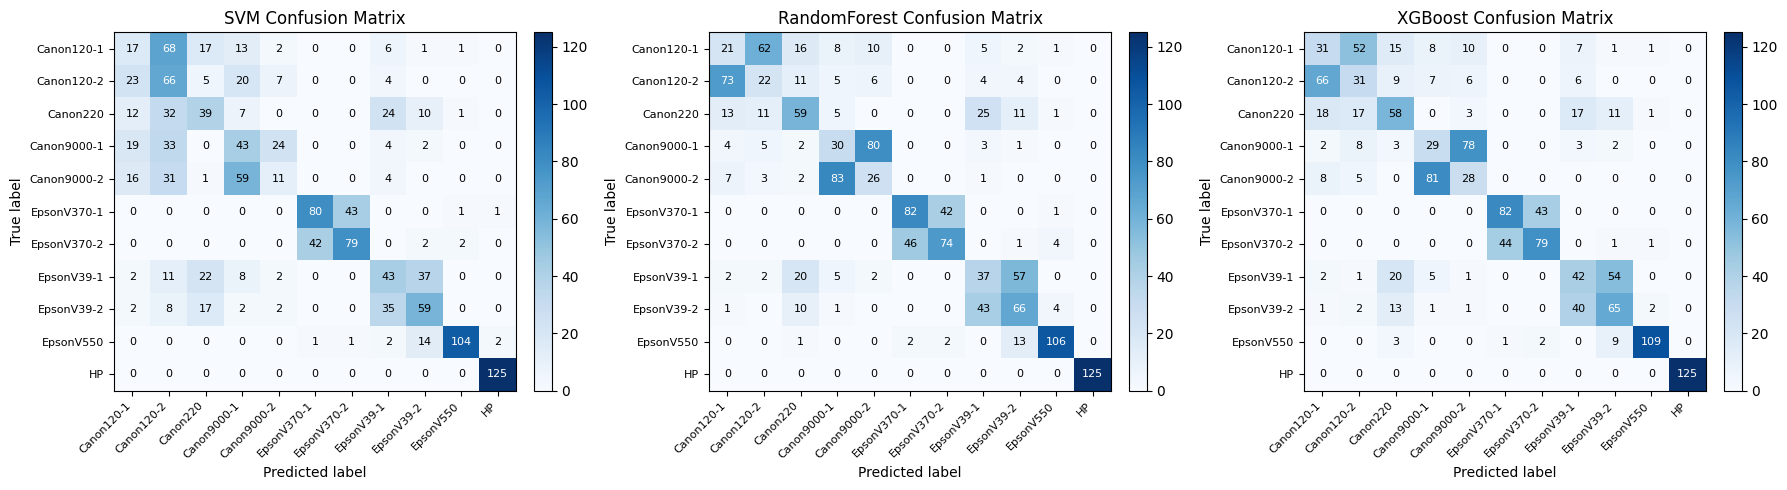


=== ✅ Model Performance Comparison ===
          model  accuracy  macro_f1  weighted_f1
0       XGBoost  0.495259  0.496518     0.496807
1           SVM  0.485777  0.479877     0.480343
2  RandomForest  0.472648  0.471810     0.472083


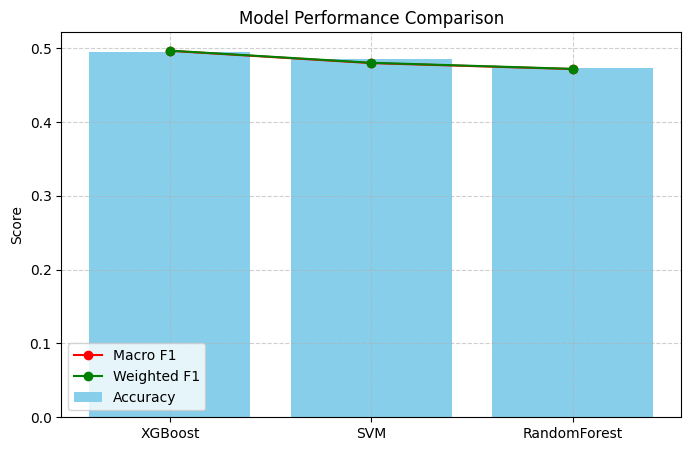


✅ Best model 'XGBoost' saved to best_combined_model.pkl


In [75]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Try to import XGBoost, fallback if not available
try:
    from xgboost import XGBClassifier
    XGBOOST_AVAILABLE = True
except Exception as e:
    print("⚠️ xgboost not available, falling back to HistGradientBoostingClassifier.")
    XGBOOST_AVAILABLE = False

# --------- CONFIG ----------
FEATURE_CSV = "ForensicsScannerData/Features/combined_features.csv"
RANDOM_STATE = 42
TEST_SIZE = 0.30
BEST_MODEL_PATH = "best_combined_model.pkl"
# --------------------------

# ------------- HELPERS -------------
def load_features(csv_path):
    df = pd.read_csv(csv_path)
    df = df.dropna().reset_index(drop=True)
    return df

def get_feature_matrix_and_labels(df, label_col="scanner"):
    meta_cols = ["dataset", "scanner", "dpi", "filename"]
    features = df.drop(columns=[c for c in meta_cols if c in df.columns])
    X = features.values.astype(np.float32)
    y = df[label_col].values
    return X, y, list(features.columns)

def plot_confusion(cm, classes, ax, title="", normalize=False):
    im = ax.imshow(cm, interpolation='nearest', cmap="Blues", aspect='auto')
    ax.set_title(title)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes, rotation=45, ha="right", fontsize=8)
    ax.set_yticklabels(classes, fontsize=8)
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            val = cm[i, j]
            ax.text(j, i, str(val), ha="center", va="center", fontsize=8,
                    color="white" if val > thresh else "black")
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")

# ------------- MAIN -------------
def main():
    if not os.path.exists(FEATURE_CSV):
        raise FileNotFoundError(f"Feature CSV not found at: {FEATURE_CSV}")
    df = load_features(FEATURE_CSV)
    print(f"✅ Loaded {len(df)} rows from {FEATURE_CSV}")

    X, y_raw, feature_names = get_feature_matrix_and_labels(df, label_col="scanner")
    le = LabelEncoder()
    y = le.fit_transform(y_raw)
    class_names = list(le.classes_)
    print(f"🔢 Classes: {class_names}")

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, stratify=y, random_state=RANDOM_STATE
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        "SVM": SVC(kernel="rbf", probability=False, random_state=RANDOM_STATE),
        "RandomForest": RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, n_jobs=-1)
    }
    if XGBOOST_AVAILABLE:
        models["XGBoost"] = XGBClassifier(
            eval_metric="mlogloss", random_state=RANDOM_STATE, n_jobs=-1
        )
    else:
        models["HistGB"] = HistGradientBoostingClassifier(random_state=RANDOM_STATE)

    results = []
    n_models = len(models)
    fig, axes = plt.subplots(1, n_models, figsize=(6 * n_models, 5))
    if n_models == 1:
        axes = [axes]

    best_model, best_acc = None, 0.0

    for ax, (name, model) in zip(axes, models.items()):
        print(f"\n🚀 Training {name} on combined dataset...")
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)

        acc = accuracy_score(y_test, preds)
        macro_f1 = f1_score(y_test, preds, average="macro")
        weighted_f1 = f1_score(y_test, preds, average="weighted")

        print(f"\n📊 Model: {name}")
        print(f"Accuracy: {acc:.4f}")
        print(f"Macro F1: {macro_f1:.4f}, Weighted F1: {weighted_f1:.4f}")
        print("\n📝 Classification Report:")
        print(classification_report(y_test, preds, target_names=class_names, digits=4))

        cm = confusion_matrix(y_test, preds)
        plot_confusion(cm, class_names, ax, title=f"{name} Confusion Matrix")

        results.append({
            "model": name,
            "accuracy": acc,
            "macro_f1": macro_f1,
            "weighted_f1": weighted_f1
        })

        if acc > best_acc:
            best_acc = acc
            best_model = model

    plt.tight_layout()
    plt.show()

    results_df = pd.DataFrame(results).sort_values(by="accuracy", ascending=False).reset_index(drop=True)
    print("\n=== ✅ Model Performance Comparison ===")
    print(results_df)

    # 📊 Plot comparison bar chart
    plt.figure(figsize=(8, 5))
    plt.bar(results_df["model"], results_df["accuracy"], color="skyblue", label="Accuracy")
    plt.plot(results_df["model"], results_df["macro_f1"], "ro-", label="Macro F1")
    plt.plot(results_df["model"], results_df["weighted_f1"], "go-", label="Weighted F1")
    plt.ylabel("Score")
    plt.title("Model Performance Comparison")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

    # 💾 Save best model trained on combined data
    if best_model is not None:
        joblib.dump(best_model, BEST_MODEL_PATH)
        print(f"\n✅ Best model '{results_df.iloc[0]['model']}' saved to {BEST_MODEL_PATH}")

if __name__ == "__main__":
    main()


# Consider using an alternative feature extraction approach to enhance model accuracy

## PRNU Residual–Fingerprint Correlation Feature Extraction
### for Official Data

In [10]:
import os
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
from scipy.stats import pearsonr

# ------------------ HELPER FUNCTIONS ------------------

def align_to_shape(img_array, target_shape):
    """
    Aligns an image to the target shape by center-cropping or zero-padding.
    """
    h, w = img_array.shape
    th, tw = target_shape
    if h == th and w == tw:
        return img_array
    
    if h > th:
        start_h = (h - th) // 2
        img_array = img_array[start_h : start_h + th, :]
    if w > tw:
        start_w = (w - tw) // 2
        img_array = img_array[:, start_w : start_w + tw]

    pad_h_total = th - img_array.shape[0]
    pad_w_total = tw - img_array.shape[1]
    pad_h_before = pad_h_total // 2
    pad_h_after = pad_h_total - pad_h_before
    pad_w_before = pad_w_total // 2
    pad_w_after = pad_w_total - pad_w_before
        
    if pad_h_total > 0 or pad_w_total > 0:
        img_array = np.pad(img_array, 
                           ((pad_h_before, pad_h_after), (pad_w_before, pad_w_after)), 
                           mode="constant", constant_values=0)
    return img_array

# ------------------ MAIN FEATURE EXTRACTION FUNCTION ------------------

def extract_features_to_csv(residual_root, fingerprint_root, output_csv_path):
    """
    Extracts correlation features for each residual image and saves them to a CSV.
    """
    print(f"🔄 Starting feature extraction...")
    
    # 1. Load all fingerprints into memory
    fingerprints = {}
    fp_root = Path(fingerprint_root)
    scanner_names = sorted([d.name for d in fp_root.iterdir() if d.is_dir()])
    
    for scanner_name in scanner_names:
        fingerprints[scanner_name] = {}
        for dpi_dir in (fp_root / scanner_name).iterdir():
            if dpi_dir.is_dir():
                fp_path = dpi_dir / "fingerprint.npy"
                if fp_path.exists():
                    fingerprints[scanner_name][dpi_dir.name] = np.load(fp_path)
    
    print(f"✅ Loaded {sum(len(v) for v in fingerprints.values())} fingerprints for {len(scanner_names)} scanners.")

    # 2. Iterate through residual images to extract features
    feature_data = []
    res_root = Path(residual_root)
    
    all_residual_files = list(res_root.rglob("*.png"))
    
    for residual_path in tqdm(all_residual_files, desc="Extracting Features"):
        try:
            # Extract true label from path
            true_scanner = residual_path.parts[-3]
            true_dpi = residual_path.parts[-2]
            
            # Load the residual image
            residual_image = cv2.imread(str(residual_path), cv2.IMREAD_GRAYSCALE).astype(np.float32)
            if residual_image is None:
                continue

            # This will be our feature vector
            correlations = {}
            
            # 3. Calculate correlation against each fingerprint
            for scanner_name, dpi_fps in fingerprints.items():
                if true_dpi in dpi_fps:
                    fingerprint = dpi_fps[true_dpi]
                    
                    # Align residual to the fingerprint's shape
                    aligned_residual = align_to_shape(residual_image, fingerprint.shape)
                    
                    # Flatten arrays for correlation calculation
                    res_flat = aligned_residual.flatten()
                    fp_flat = fingerprint.flatten()
                    
                    # Calculate Pearson correlation
                    corr, _ = pearsonr(res_flat, fp_flat)
                    correlations[f"corr_{scanner_name}"] = corr if np.isfinite(corr) else 0
            
            # Add true label and path to the record
            if correlations:
                correlations["true_label"] = true_scanner
                correlations["image_path"] = str(residual_path)
                feature_data.append(correlations)
                
        except Exception as e:
            print(f"\n⚠️ Error processing {residual_path}: {e}")

    # 4. Create and save DataFrame
    df = pd.DataFrame(feature_data)
    
    # Reorder columns to have labels first
    label_col = df.pop("true_label")
    path_col = df.pop("image_path")
    df.insert(0, "image_path", path_col)
    df.insert(1, "true_label", label_col)
    
    df.to_csv(output_csv_path, index=False)
    print(f"\n🎯 Finished! Features saved to '{output_csv_path}'")
    return df

# ------------------ PATHS AND EXECUTION ------------------

# Define the root directories for your data
RESIDUAL_ROOT = "ForensicsScannerData/ProcessedImages/official_residual" # or wikipedia_residual
FINGERPRINT_ROOT = "ForensicsScannerData/ProcessedImages/official_fingerprint" # or wikipedia_fingerprint
OUTPUT_CSV = "ForensicsScannerData/Features/official_features.csv" # or wikipedia_features.csv

# Create directory for the CSV if it doesn't exist
os.makedirs(os.path.dirname(OUTPUT_CSV), exist_ok=True)

# Run the feature extraction
features_df = extract_features_to_csv(RESIDUAL_ROOT, FINGERPRINT_ROOT, OUTPUT_CSV)

print("\n--- Feature Extraction Complete ---")
print("First 5 rows of the generated CSV:")
print(features_df.head())


🔄 Starting feature extraction...
✅ Loaded 22 fingerprints for 11 scanners.


Extracting Features: 100%|█████████████████████████████████████████████████████████| 2200/2200 [37:31<00:00,  1.02s/it]



🎯 Finished! Features saved to 'ForensicsScannerData/Features/official_features.csv'

--- Feature Extraction Complete ---
First 5 rows of the generated CSV:
                                          image_path  true_label  \
0  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
1  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
2  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
3  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
4  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   

   corr_Canon120-1  corr_Canon120-2  corr_Canon220  corr_Canon9000-1  \
0         0.137941         0.035829       0.045662          0.005191   
1         0.169843         0.063792       0.055588          0.024812   
2         0.101441         0.079663       0.053859          0.031404   
3         0.105235         0.024920       0.013995         -0.003312   
4         0.114487         0.053951       0.063267          0.019442   

 

## PRNU Residual–Fingerprint Correlation Feature Extraction
### for Wikipedia Data

In [11]:
import os
import cv2
import numpy as np
import pandas as pd
from pathlib import Path
from tqdm import tqdm
from scipy.stats import pearsonr

# ------------------ HELPER FUNCTIONS ------------------

def align_to_shape(img_array, target_shape):
    """
    Aligns an image to the target shape by center-cropping or zero-padding.
    """
    h, w = img_array.shape
    th, tw = target_shape
    if h == th and w == tw:
        return img_array
    
    if h > th:
        start_h = (h - th) // 2
        img_array = img_array[start_h : start_h + th, :]
    if w > tw:
        start_w = (w - tw) // 2
        img_array = img_array[:, start_w : start_w + tw]

    pad_h_total = th - img_array.shape[0]
    pad_w_total = tw - img_array.shape[1]
    pad_h_before = pad_h_total // 2
    pad_h_after = pad_h_total - pad_h_before
    pad_w_before = pad_w_total // 2
    pad_w_after = pad_w_total - pad_w_before
        
    if pad_h_total > 0 or pad_w_total > 0:
        img_array = np.pad(img_array, 
                           ((pad_h_before, pad_h_after), (pad_w_before, pad_w_after)), 
                           mode="constant", constant_values=0)
    return img_array

# ------------------ MAIN FEATURE EXTRACTION FUNCTION ------------------

def extract_features_to_csv(residual_root, fingerprint_root, output_csv_path):
    """
    Extracts correlation features for each residual image and saves them to a CSV.
    """
    print(f"🔄 Starting feature extraction...")
    
    # 1. Load all fingerprints into memory
    fingerprints = {}
    fp_root = Path(fingerprint_root)
    scanner_names = sorted([d.name for d in fp_root.iterdir() if d.is_dir()])
    
    for scanner_name in scanner_names:
        fingerprints[scanner_name] = {}
        for dpi_dir in (fp_root / scanner_name).iterdir():
            if dpi_dir.is_dir():
                fp_path = dpi_dir / "fingerprint.npy"
                if fp_path.exists():
                    fingerprints[scanner_name][dpi_dir.name] = np.load(fp_path)
    
    print(f"✅ Loaded {sum(len(v) for v in fingerprints.values())} fingerprints for {len(scanner_names)} scanners.")

    # 2. Iterate through residual images to extract features
    feature_data = []
    res_root = Path(residual_root)
    
    all_residual_files = list(res_root.rglob("*.png"))
    
    for residual_path in tqdm(all_residual_files, desc="Extracting Features"):
        try:
            # Extract true label from path
            true_scanner = residual_path.parts[-3]
            true_dpi = residual_path.parts[-2]
            
            # Load the residual image
            residual_image = cv2.imread(str(residual_path), cv2.IMREAD_GRAYSCALE).astype(np.float32)
            if residual_image is None:
                continue

            # This will be our feature vector
            correlations = {}
            
            # 3. Calculate correlation against each fingerprint
            for scanner_name, dpi_fps in fingerprints.items():
                if true_dpi in dpi_fps:
                    fingerprint = dpi_fps[true_dpi]
                    
                    # Align residual to the fingerprint's shape
                    aligned_residual = align_to_shape(residual_image, fingerprint.shape)
                    
                    # Flatten arrays for correlation calculation
                    res_flat = aligned_residual.flatten()
                    fp_flat = fingerprint.flatten()
                    
                    # Calculate Pearson correlation
                    corr, _ = pearsonr(res_flat, fp_flat)
                    correlations[f"corr_{scanner_name}"] = corr if np.isfinite(corr) else 0
            
            # Add true label and path to the record
            if correlations:
                correlations["true_label"] = true_scanner
                correlations["image_path"] = str(residual_path)
                feature_data.append(correlations)
                
        except Exception as e:
            print(f"\n⚠️ Error processing {residual_path}: {e}")

    # 4. Create and save DataFrame
    df = pd.DataFrame(feature_data)
    
    # Reorder columns to have labels first
    label_col = df.pop("true_label")
    path_col = df.pop("image_path")
    df.insert(0, "image_path", path_col)
    df.insert(1, "true_label", label_col)
    
    df.to_csv(output_csv_path, index=False)
    print(f"\n🎯 Finished! Features saved to '{output_csv_path}'")
    return df

# ------------------ PATHS AND EXECUTION ------------------

# Define the root directories for your data
RESIDUAL_ROOT = "ForensicsScannerData/ProcessedImages/wikipedia_residual" # or wikipedia_residual
FINGERPRINT_ROOT = "ForensicsScannerData/ProcessedImages/wikipedia_fingerprint" # or wikipedia_fingerprint
OUTPUT_CSV = "ForensicsScannerData/Features/wikipedia_features.csv" # or wikipedia_features.csv

# Create directory for the CSV if it doesn't exist
os.makedirs(os.path.dirname(OUTPUT_CSV), exist_ok=True)

# Run the feature extraction
features_df = extract_features_to_csv(RESIDUAL_ROOT, FINGERPRINT_ROOT, OUTPUT_CSV)

print("\n--- Feature Extraction Complete ---")
print("First 5 rows of the generated CSV:")
print(features_df.head())


🔄 Starting feature extraction...
✅ Loaded 22 fingerprints for 11 scanners.


Extracting Features: 100%|█████████████████████████████████████████████████████████| 2368/2368 [39:17<00:00,  1.00it/s]


🎯 Finished! Features saved to 'ForensicsScannerData/Features/wikipedia_features.csv'

--- Feature Extraction Complete ---
First 5 rows of the generated CSV:
                                          image_path  true_label  \
0  ForensicsScannerData\ProcessedImages\wikipedia...  Canon120-1   
1  ForensicsScannerData\ProcessedImages\wikipedia...  Canon120-1   
2  ForensicsScannerData\ProcessedImages\wikipedia...  Canon120-1   
3  ForensicsScannerData\ProcessedImages\wikipedia...  Canon120-1   
4  ForensicsScannerData\ProcessedImages\wikipedia...  Canon120-1   

   corr_Canon120-1  corr_Canon120-2  corr_Canon220  corr_Canon9000-1  \
0         0.245552         0.231609       0.225355          0.198548   
1         0.297771         0.281910       0.264650          0.235974   
2         0.238358         0.210231       0.207644          0.169333   
3         0.024428         0.019919       0.014363          0.010171   
4         0.255124         0.237084       0.207182          0.172889   



### Merging Feature CSV Files into a Single Combined Dataset

In [12]:
import os
import glob
import pandas as pd

# Define the path to the folder containing your feature CSVs
features_folder = "ForensicsScannerData/Features/"

# Find all files in the folder ending with "_features.csv"
csv_files = glob.glob(os.path.join(features_folder, "*_features.csv"))
print(f"Found the following files to merge: {csv_files}")

# Check if any files were found
if not csv_files:
    print("Error: No feature CSV files were found. Please run the feature extraction script first.")
else:
    # Read each CSV file into a list of DataFrames
    df_list = [pd.read_csv(file) for file in csv_files]
    
    # Concatenate all DataFrames into a single one
    combined_df = pd.concat(df_list, ignore_index=True)

    # Define the path for the final, combined file
    output_path = os.path.join(features_folder, "combined_features.csv")
    
    # Save the combined DataFrame to a new CSV file
    combined_df.to_csv(output_path, index=False)

    print(f"\n✅ All features have been successfully combined and saved to: {output_path}")
    print(f"Total records in the combined file: {len(combined_df)}")
    print("\nFirst 5 rows of the combined data:")
    print(combined_df.head())


Found the following files to merge: ['ForensicsScannerData/Features\\official_features.csv', 'ForensicsScannerData/Features\\wikipedia_features.csv']

✅ All features have been successfully combined and saved to: ForensicsScannerData/Features/combined_features.csv
Total records in the combined file: 4568

First 5 rows of the combined data:
                                          image_path  true_label  \
0  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
1  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
2  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
3  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
4  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   

   corr_Canon120-1  corr_Canon120-2  corr_Canon220  corr_Canon9000-1  \
0         0.137941         0.035829       0.045662          0.005191   
1         0.169843         0.063792       0.055588          0.024812   
2         0.101441         0.07966

In [44]:
data= pd.read_csv("ForensicsScannerData/Features/combined_features.csv")
data.head(5)

image_path  true_label  \
0  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
1  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
2  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
3  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   
4  ForensicsScannerData\ProcessedImages\official_...  Canon120-1   

   corr_Canon120-1  corr_Canon120-2  corr_Canon220  corr_Canon9000-1  \
0         0.137941         0.035829       0.045662          0.005191   
1         0.169843         0.063792       0.055588          0.024812   
2         0.101441         0.079663       0.053859          0.031404   
3         0.105235         0.024920       0.013995         -0.003312   
4         0.114487         0.053951       0.063267          0.019442   

   corr_Canon9000-2  corr_EpsonV370-1  corr_EpsonV370-2  corr_EpsonV39-1  \
0          0.006236          0.005950          0.006052         0.026928   
1          0.025429         -0.000053         -0.000040         0.037495   
2          0.032308          0.004866          0.017433         0.049519   
3         -0.005154          0.007394          0.003043         0.006938   
4          0.019264          0.029582          0.032192         0.063117   

   corr_EpsonV39-2  corr_EpsonV550   corr_HP  
0         0.041258        0.005849 -0.003835  
1         0.049393        0.004091  0.004766  
2         0.047555        0.031034  0.000723  
3         0.026035        0.000040 -0.006922  
4         0.061038        0.008442 -0.009819

# Week 4: 
## Train baseline ML models (XGBoost, Random Forest). 

Successfully loaded 4568 records from 'ForensicsScannerData/Features/combined_features.csv'.

Found 11 classes: ['Canon120-1' 'Canon120-2' 'Canon220' 'Canon9000-1' 'Canon9000-2'
 'EpsonV370-1' 'EpsonV370-2' 'EpsonV39-1' 'EpsonV39-2' 'EpsonV550' 'HP']
Training set size: 3654 | Testing set size: 914

--- Training Random Forest ---
Random Forest Accuracy: 0.9442

Random Forest Classification Report:
              precision    recall  f1-score   support

  Canon120-1       0.94      0.94      0.94        83
  Canon120-2       0.98      0.95      0.96        83
    Canon220       0.94      0.98      0.96        83
 Canon9000-1       0.82      0.88      0.85        83
 Canon9000-2       0.87      0.80      0.84        82
 EpsonV370-1       0.98      0.98      0.98        83
 EpsonV370-2       1.00      0.95      0.98        84
  EpsonV39-1       0.95      0.94      0.95        83
  EpsonV39-2       0.94      0.98      0.96        84
   EpsonV550       0.98      0.99      0.98        83
     

C:\Users\nitis\gpu-env\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:16:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9617

XGBoost Classification Report:
              precision    recall  f1-score   support

  Canon120-1       0.96      0.95      0.96        83
  Canon120-2       0.96      0.96      0.96        83
    Canon220       0.95      0.96      0.96        83
 Canon9000-1       0.91      0.95      0.93        83
 Canon9000-2       0.95      0.90      0.93        82
 EpsonV370-1       1.00      1.00      1.00        83
 EpsonV370-2       1.00      0.98      0.99        84
  EpsonV39-1       0.91      0.96      0.94        83
  EpsonV39-2       0.96      0.93      0.95        84
   EpsonV550       0.98      0.98      0.98        83
          HP       1.00      1.00      1.00        83

    accuracy                           0.96       914
   macro avg       0.96      0.96      0.96       914
weighted avg       0.96      0.96      0.96       914


XGBoost is the best model. Saving...
✅ Best model saved to 'ForensicsScannerData/Models\xgboost_model.joblib'
✅ Label Encoder sav

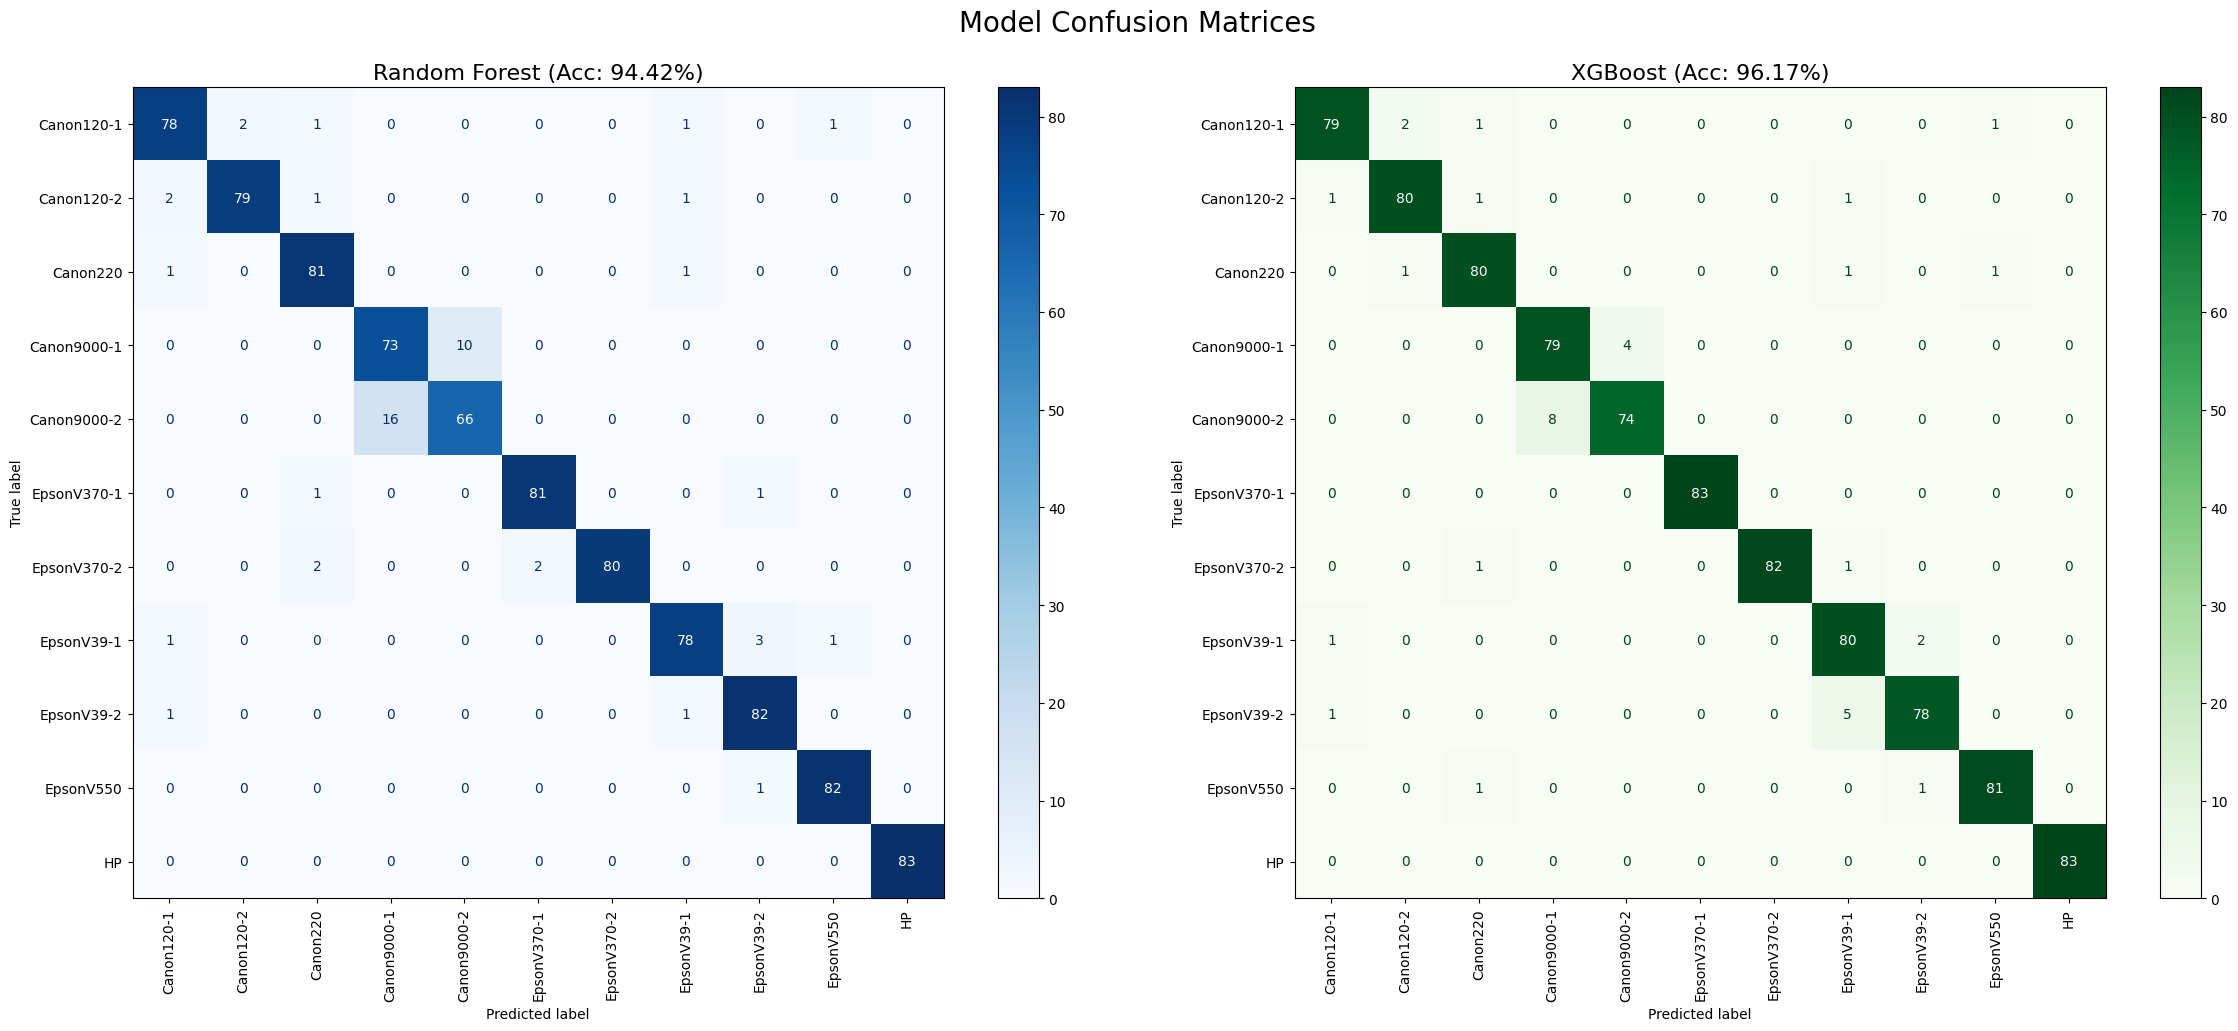

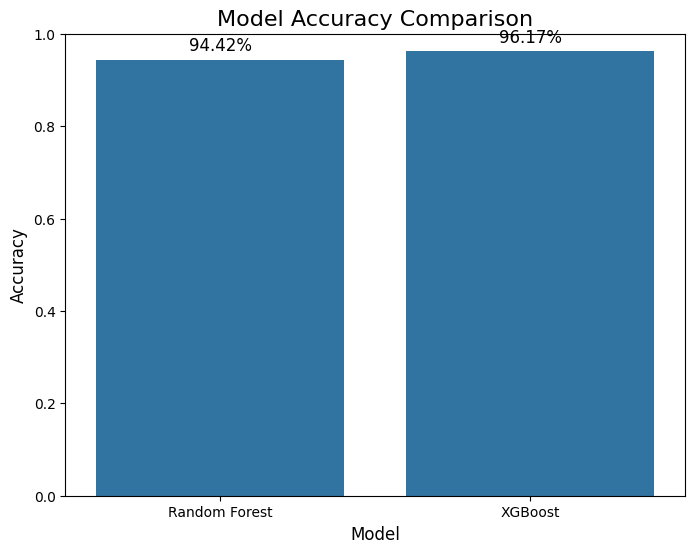

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# --- 1. Load Data ---
csv_path = "ForensicsScannerData/Features/combined_features.csv"
try:
    features_df = pd.read_csv(csv_path)
    print(f"Successfully loaded {len(features_df)} records from '{csv_path}'.")
except FileNotFoundError:
    print(f"Error: The file was not found at '{csv_path}'.")
    print("Please make sure the path is correct and you have run the combination script.")
    exit()

# --- 2. Prepare Data for Training ---
# Assuming 'true_label' is the column with scanner names
X = features_df.drop(columns=["image_path", "true_label"])
y = features_df["true_label"]

# Fit the LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
class_names = le.classes_
print(f"\nFound {len(class_names)} classes: {class_names}")

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)
print(f"Training set size: {len(X_train)} | Testing set size: {len(X_test)}")

# --- 3. Train and Evaluate Models ---
# -- Random Forest --
print("\n--- Training Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

# Classification report for Random Forest
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_preds, target_names=class_names))

# -- XGBoost --
print("\n--- Training XGBoost ---")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=200, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")

# Classification report for XGBoost
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_preds, target_names=class_names))

# --- 4. Save the Best Model AND the LabelEncoder ---
model_dir = "ForensicsScannerData/Models"
os.makedirs(model_dir, exist_ok=True)

if rf_accuracy > xgb_accuracy:
    best_model = rf_model
    best_model_name = "random_forest_model.joblib"
    print(f"\nRandom Forest is the best model. Saving...")
else:
    best_model = xgb_model
    best_model_name = "xgboost_model.joblib"
    print(f"\nXGBoost is the best model. Saving...")

# Save the best model
joblib.dump(best_model, os.path.join(model_dir, best_model_name))
print(f"✅ Best model saved to '{os.path.join(model_dir, best_model_name)}'")

# --- ADDED CODE TO SAVE THE LABELENCODER ---
label_encoder_path = os.path.join(model_dir, "label_encoder.joblib")
joblib.dump(le, label_encoder_path)
print(f"✅ Label Encoder saved to '{label_encoder_path}'")
# -------------------------------------------

# --- 5. Visualize Results ---
# (This part of the code remains unchanged)
fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.suptitle('Model Confusion Matrices', fontsize=20)

ConfusionMatrixDisplay.from_predictions(
    y_test, rf_preds, ax=axes[0], cmap='Blues', xticks_rotation='vertical',
    display_labels=class_names
)
axes[0].set_title(f'Random Forest (Acc: {rf_accuracy:.2%})', fontsize=16)

ConfusionMatrixDisplay.from_predictions(
    y_test, xgb_preds, ax=axes[1], cmap='Greens', xticks_rotation='vertical',
    display_labels=class_names
)
axes[1].set_title(f'XGBoost (Acc: {xgb_accuracy:.2%})', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# -- Plot Model Accuracy Comparison --
plt.figure(figsize=(8, 6))
sns.barplot(
    x=['Random Forest', 'XGBoost'],
    y=[rf_accuracy, xgb_accuracy]
)
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1.0)
for index, value in enumerate([rf_accuracy, xgb_accuracy]):
    plt.text(index, value + 0.01, f"{value:.2%}", ha='center', va='bottom', fontsize=12)
plt.show()


# Scanner Source Prediction Using PRNU Fingerprints and Trained XGBoost Model

In [42]:
import os
import cv2
import numpy as np
import joblib
from pathlib import Path
from scipy.stats import pearsonr

# --- 1. Helper function for alignment ---
def align_to_shape(img_array, target_shape):
    h, w = img_array.shape
    th, tw = target_shape
    if h == th and w == tw:
        return img_array
    
    if h > th:
        start_h = (h - th) // 2
        img_array = img_array[start_h : start_h + th, :]
    if w > tw:
        start_w = (w - tw) // 2
        img_array = img_array[:, start_w : start_w + tw]

    pad_h_total = th - img_array.shape[0]
    pad_w_total = tw - img_array.shape[1]
    pad_h_before = pad_h_total // 2
    pad_h_after = pad_h_total - pad_h_before
    pad_w_before = pad_w_total // 2
    pad_w_after = pad_w_total - pad_w_before
        
    if pad_h_total > 0 or pad_w_total > 0:
        img_array = np.pad(img_array, 
                           ((pad_h_before, pad_h_after), (pad_w_before, pad_w_after)), 
                           mode="constant", constant_values=0)
    return img_array

# --- 2. Feature extraction for a single image ---
def extract_features_for_image(residual_image, true_dpi, fingerprints):
    correlations = {}
    for scanner_name, dpi_fps in fingerprints.items():
        if true_dpi in dpi_fps:
            fingerprint = dpi_fps[true_dpi]
            aligned_residual = align_to_shape(residual_image, fingerprint.shape)
            res_flat = aligned_residual.flatten()
            fp_flat = fingerprint.flatten()
            corr, _ = pearsonr(res_flat, fp_flat)
            correlations[f"corr_{scanner_name}"] = corr if np.isfinite(corr) else 0
    
    feature_vector = [correlations.get(f"corr_{s}", 0) for s in sorted(fingerprints.keys())]
    return np.array(feature_vector).reshape(1, -1)

# --- 3. Prediction function for multiple images ---
def predict_multiple_scanners(image_paths, model, label_encoder, fingerprints, temperature=1.0):
    results = []
    for path in image_paths:
        try:
            source_type = "wikipedia" if "wikipedia_residual" in path else "official"
            current_fingerprints = fingerprints[source_type]
            
            residual_image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            if residual_image is None:
                results.append((path, "Error", "Could not read image"))
                continue

            dpi = Path(path).parts[-2]
            features = extract_features_for_image(residual_image, dpi, current_fingerprints)
            probabilities = model.predict_proba(features)[0]

            if temperature != 1.0:
                probabilities = np.exp(np.log(probabilities + 1e-9) / temperature)
                probabilities /= np.sum(probabilities)

            top_pred_idx = np.argmax(probabilities)
            confidence = probabilities[top_pred_idx] * 100
            predicted_scanner = label_encoder.inverse_transform([top_pred_idx])[0]
            
            results.append((path, predicted_scanner, confidence))

        except Exception as e:
            results.append((path, "Error", str(e)))
            
    return results

# --- 4. Setup for prediction ---
print("--- Setting up for prediction ---")

# Load saved model
MODEL_PATH = "ForensicsScannerData/Models/xgboost_model.joblib" 
try:
    loaded_model = joblib.load(MODEL_PATH)
    print(f"✅ Model loaded from {MODEL_PATH}")
except FileNotFoundError:
    print(f"Error: Model not found at {MODEL_PATH}. Please train the model first.")
    exit()

# Load saved LabelEncoder
LABEL_ENCODER_PATH = "ForensicsScannerData/Models/label_encoder.joblib"
try:
    le = joblib.load(LABEL_ENCODER_PATH)
    print(f"✅ LabelEncoder loaded from {LABEL_ENCODER_PATH}")
except FileNotFoundError:
    print(f"Error: LabelEncoder not found at {LABEL_ENCODER_PATH}.")
    exit()

# Load all fingerprints
FINGERPRINT_ROOT_OFFICIAL = "ForensicsScannerData/ProcessedImages/official_fingerprint"
FINGERPRINT_ROOT_WIKI = "ForensicsScannerData/ProcessedImages/wikipedia_fingerprint"

all_fingerprints = {"official": {}, "wikipedia": {}}
for fp_root in [FINGERPRINT_ROOT_OFFICIAL, FINGERPRINT_ROOT_WIKI]:
    source_type = "wikipedia" if "wikipedia" in fp_root else "official"
    fp_path = Path(fp_root)
    scanner_names = sorted([d.name for d in fp_path.iterdir() if d.is_dir()])
    for scanner_name in scanner_names:
        all_fingerprints[source_type][scanner_name] = {}
        for dpi_dir in (fp_path / scanner_name).iterdir():
            if dpi_dir.is_dir() and (dpi_dir / "fingerprint.npy").exists():
                all_fingerprints[source_type][scanner_name][dpi_dir.name] = np.load(dpi_dir / "fingerprint.npy")

print("✅ All fingerprints loaded into memory.")

# --- 5. Example Predictions ---
print("Prediction For Official (150 DPI)\n")
image_paths_150_off = [
    "ForensicsScannerData/ProcessedImages/official_residual/Canon120-1/150/s1_29.png",
    "ForensicsScannerData/ProcessedImages/official_residual/Canon120-2/150/s2_75.png",
    "ForensicsScannerData/ProcessedImages/official_residual/Canon220/150/s3_39.png",
    "ForensicsScannerData/ProcessedImages/official_residual/Canon9000-1/150/s4_65.png",
    "ForensicsScannerData/ProcessedImages/official_residual/Canon9000-2/150/s5_45.png",
    "ForensicsScannerData/ProcessedImages/official_residual/EpsonV39-1/150/s8_73.png",
    "ForensicsScannerData/ProcessedImages/official_residual/EpsonV39-2/150/s9_80.png",
    "ForensicsScannerData/ProcessedImages/official_residual/EpsonV370-1/150/s6_60.png",
    "ForensicsScannerData/ProcessedImages/official_residual/EpsonV370-2/150/s7_40.png",
    "ForensicsScannerData/ProcessedImages/official_residual/EpsonV550/150/s10_19.png",
    "ForensicsScannerData/ProcessedImages/official_residual/HP/150/s11_49.png",
]
results_150_off = predict_multiple_scanners(image_paths_150_off, loaded_model, le, all_fingerprints, temperature=2.0)
for path, scanner, conf in results_150_off:
    if scanner != "Error":
        input_scanner = Path(path).parts[-3]
        print(f"Input Scanner: {input_scanner:<15} | Predicted: {scanner:<15} | Confidence: {conf:.2f}%")
    else:
        print(f"Path: {path} | Error: {conf}")

print("\nPrediction For Official (300 DPI)\n")
image_paths_300_off = [
    "ForensicsScannerData/ProcessedImages/official_residual/Canon120-1/300/s1_29.png",
    "ForensicsScannerData/ProcessedImages/official_residual/Canon120-2/300/s2_75.png",
    "ForensicsScannerData/ProcessedImages/official_residual/Canon220/300/s3_39.png",
    "ForensicsScannerData/ProcessedImages/official_residual/Canon9000-1/300/s4_65.png",
    "ForensicsScannerData/ProcessedImages/official_residual/Canon9000-2/300/s5_5.png",
    "ForensicsScannerData/ProcessedImages/official_residual/EpsonV39-1/300/s8_73.png",
    "ForensicsScannerData/ProcessedImages/official_residual/EpsonV39-2/300/s9_80.png",
    "ForensicsScannerData/ProcessedImages/official_residual/EpsonV370-1/300/s6_60.png",
    "ForensicsScannerData/ProcessedImages/official_residual/EpsonV370-2/300/s7_40.png",
    "ForensicsScannerData/ProcessedImages/official_residual/EpsonV550/300/s10_19.png",
    "ForensicsScannerData/ProcessedImages/official_residual/HP/300/s11_49.png",
]
results_300_off = predict_multiple_scanners(image_paths_300_off, loaded_model, le, all_fingerprints, temperature=2.0)
for path, scanner, conf in results_300_off:
    if scanner != "Error":
        input_scanner = Path(path).parts[-3]
        print(f"Input Scanner: {input_scanner:<15} | Predicted: {scanner:<15} | Confidence: {conf:.2f}%")
    else:
        print(f"Path: {path} | Error: {conf}")

print("Prediction For Wikipedia (150 DPI)\n")
image_paths_150_off = [
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon120-1/150/s1_29.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon120-2/150/s2_75.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon220/150/s3_39.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon9000-1/150/s4_65.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon9000-2/150/s5_5.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV39-1/150/s8_73.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV39-2/150/s9_80.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV370-1/150/s6_60.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV370-2/150/s7_40.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV550/150/s10_19.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/HP/150/s11_49.png",
]
results_150_off = predict_multiple_scanners(image_paths_150_off, loaded_model, le, all_fingerprints, temperature=2.0)
for path, scanner, conf in results_150_off:
    if scanner != "Error":
        input_scanner = Path(path).parts[-3]
        print(f"Input Scanner: {input_scanner:<15} | Predicted: {scanner:<15} | Confidence: {conf:.2f}%")
    else:
        print(f"Path: {path} | Error: {conf}")

print("\nPrediction For Wikipedia (300 DPI)\n")
image_paths_300_off = [
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon120-1/300/s1_29.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon120-2/300/s2_75.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon220/300/s3_39.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon9000-1/300/s4_65.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon9000-2/300/s5_4.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV39-1/300/s8_73.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV39-2/300/s9_80.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV370-1/300/s6_60.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV370-2/300/s7_40.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV550/300/s10_19.png",
    "ForensicsScannerData/ProcessedImages/wikipedia_residual/HP/300/s11_49.png",
]
results_300_off = predict_multiple_scanners(image_paths_300_off, loaded_model, le, all_fingerprints, temperature=2.0)
for path, scanner, conf in results_300_off:
    if scanner != "Error":
        input_scanner = Path(path).parts[-3]
        print(f"Input Scanner: {input_scanner:<15} | Predicted: {scanner:<15} | Confidence: {conf:.2f}%")
    else:
        print(f"Path: {path} | Error: {conf}")


--- Setting up for prediction ---
✅ Model loaded from ForensicsScannerData/Models/xgboost_model.joblib
✅ LabelEncoder loaded from ForensicsScannerData/Models/label_encoder.joblib
✅ All fingerprints loaded into memory.
Prediction For Official (150 DPI)

Input Scanner: Canon120-1      | Predicted: Canon120-1      | Confidence: 95.09%
Input Scanner: Canon120-2      | Predicted: Canon120-2      | Confidence: 97.32%
Input Scanner: Canon220        | Predicted: Canon220        | Confidence: 97.45%
Input Scanner: Canon9000-1     | Predicted: Canon9000-1     | Confidence: 95.56%
Input Scanner: Canon9000-2     | Predicted: Canon9000-2     | Confidence: 86.90%
Input Scanner: EpsonV39-1      | Predicted: EpsonV39-1      | Confidence: 90.93%
Input Scanner: EpsonV39-2      | Predicted: EpsonV39-2      | Confidence: 96.58%
Input Scanner: EpsonV370-1     | Predicted: EpsonV370-1     | Confidence: 96.12%
Input Scanner: EpsonV370-2     | Predicted: EpsonV370-2     | Confidence: 93.11%
Input Scanner: Eps

# Milestone 3: Deep Learning Model

# Week 5: 
## Build and train a CNN model

### Transfer-Learning Pipeline — Training & Evaluating EfficientNet_V2_S for Scanner Residual Classification

Device: cuda
Total images found: 4568
Train: 2923 | Val: 731 | Test: 914
Epoch 1/30 | Train Loss: 1.7453 | Train Acc: 0.3281 | Val Loss: 1.5205 | Val Acc: 0.3803
Epoch 2/30 | Train Loss: 1.3017 | Train Acc: 0.4714 | Val Loss: 1.1441 | Val Acc: 0.5335
Epoch 3/30 | Train Loss: 1.1339 | Train Acc: 0.5361 | Val Loss: 0.8797 | Val Acc: 0.6389
Epoch 4/30 | Train Loss: 0.9572 | Train Acc: 0.6141 | Val Loss: 0.9524 | Val Acc: 0.6183
Epoch 5/30 | Train Loss: 0.8723 | Train Acc: 0.6459 | Val Loss: 0.8975 | Val Acc: 0.6265
Epoch 6/30 | Train Loss: 0.8498 | Train Acc: 0.6380 | Val Loss: 0.6900 | Val Acc: 0.6895
Epoch 7/30 | Train Loss: 0.8156 | Train Acc: 0.6572 | Val Loss: 0.7296 | Val Acc: 0.6731
Epoch 8/30 | Train Loss: 0.7337 | Train Acc: 0.6870 | Val Loss: 0.6620 | Val Acc: 0.6785
Epoch 9/30 | Train Loss: 0.7064 | Train Acc: 0.7007 | Val Loss: 0.6838 | Val Acc: 0.6963
Epoch 10/30 | Train Loss: 0.6664 | Train Acc: 0.7140 | Val Loss: 0.5892 | Val Acc: 0.7114
Epoch 11/30 | Train Loss: 0.6672 | T

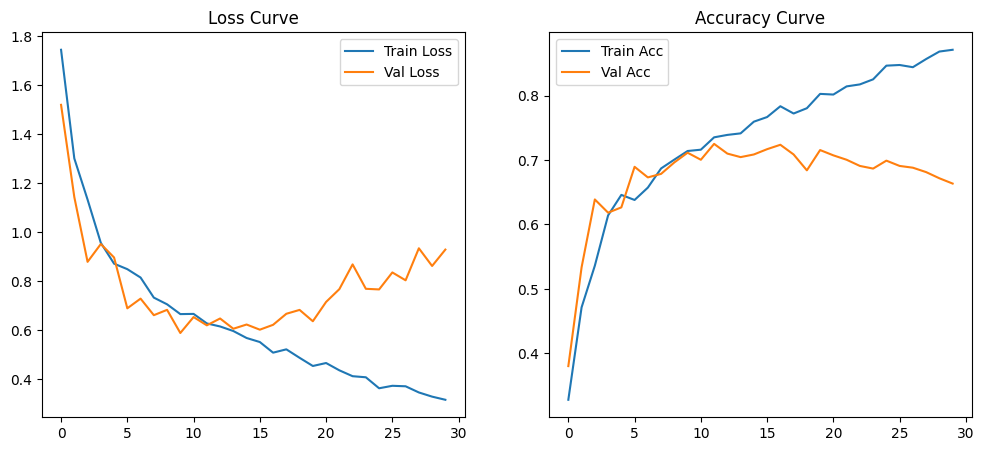

✅ Model saved at ForensicsScannerData/Features/Model\efficientnet_v2_s_scanner.pth
✅ Test Accuracy: 0.6641


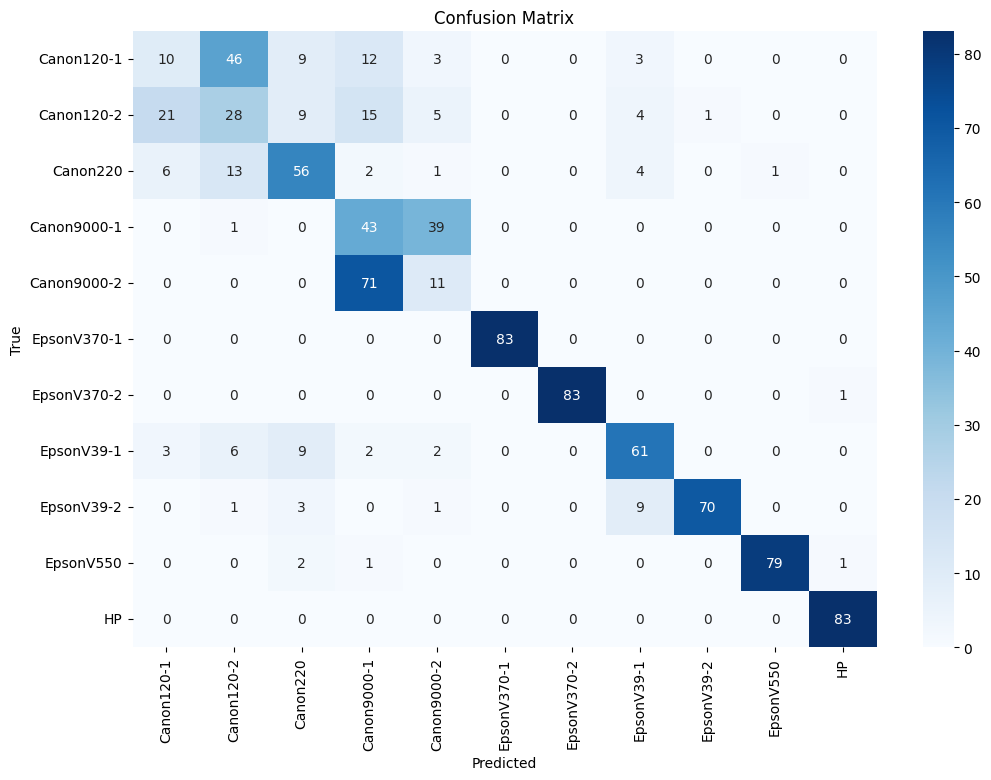

              precision    recall  f1-score   support

  Canon120-1       0.25      0.12      0.16        83
  Canon120-2       0.29      0.34      0.31        83
    Canon220       0.64      0.67      0.65        83
 Canon9000-1       0.29      0.52      0.38        83
 Canon9000-2       0.18      0.13      0.15        82
 EpsonV370-1       1.00      1.00      1.00        83
 EpsonV370-2       1.00      0.99      0.99        84
  EpsonV39-1       0.75      0.73      0.74        83
  EpsonV39-2       0.99      0.83      0.90        84
   EpsonV550       0.99      0.95      0.97        83
          HP       0.98      1.00      0.99        83

    accuracy                           0.66       914
   macro avg       0.67      0.66      0.66       914
weighted avg       0.67      0.66      0.66       914



In [3]:
# ================================
# Imports & Setup
# ================================
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)


# ================================
# Dataset Class
# ================================
class ScannerDataset(Dataset):
    def __init__(self, image_paths, labels, transform=None):
        self.image_paths = image_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img = Image.open(self.image_paths[idx]).convert("L")  # grayscale
        if self.transform:
            img = self.transform(img)
        label = self.labels[idx]
        return img, label


# ================================
# Image Collection
# ================================
def collect_images_labels(root_dirs):
    paths, labels = [], []
    for root in root_dirs:
        for scanner in os.listdir(root):
            scanner_path = os.path.join(root, scanner)
            if os.path.isdir(scanner_path):
                for dpi_folder in os.listdir(scanner_path):
                    dpi_path = os.path.join(scanner_path, dpi_folder)
                    if os.path.isdir(dpi_path):
                        for img_name in os.listdir(dpi_path):
                            if img_name.lower().endswith((".png", ".jpg", ".jpeg", ".tif")):
                                paths.append(os.path.join(dpi_path, img_name))
                                labels.append(scanner)
    return paths, labels


official_root = "ForensicsScannerData/ProcessedImages/official_residual"
wiki_root = "ForensicsScannerData/ProcessedImages/wikipedia_residual"

all_paths, all_labels = collect_images_labels([official_root, wiki_root])
print(f"Total images found: {len(all_paths)}")

# Label Encoding
unique_labels = sorted(list(set(all_labels)))
label2idx = {l: i for i, l in enumerate(unique_labels)}
idx2label = {i: l for l, i in label2idx.items()}
all_labels_idx = [label2idx[l] for l in all_labels]


# ================================
# Train-Validation-Test Split
# ================================
train_paths, test_paths, train_labels, test_labels = train_test_split(
    all_paths, all_labels_idx, test_size=0.2, stratify=all_labels_idx, random_state=42
)
train_paths, val_paths, train_labels, val_labels = train_test_split(
    train_paths, train_labels, test_size=0.2, stratify=train_labels, random_state=42
)

print(f"Train: {len(train_paths)} | Val: {len(val_paths)} | Test: {len(test_paths)}")


# ================================
# Transforms
# ================================
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor()
])

val_test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_dataset = ScannerDataset(train_paths, train_labels, transform=train_transform)
val_dataset = ScannerDataset(val_paths, val_labels, transform=val_test_transform)
test_dataset = ScannerDataset(test_paths, test_labels, transform=val_test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


# ================================
# Choose Transfer Learning Model
# ================================
def get_model(num_classes):
    model = models.efficientnet_v2_s(weights=models.EfficientNet_V2_S_Weights.IMAGENET1K_V1)
    model.features[0][0] = nn.Conv2d(1, 24, kernel_size=3, stride=2, padding=1, bias=False)  # grayscale input
    model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    return model


num_classes = len(unique_labels)
model = get_model(num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)


# ================================
# Training Loop
# ================================
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=30):
    train_losses, val_losses = [], []
    train_accs, val_accs = [], []

    for epoch in range(epochs):
        # ---- Training ----
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        for imgs, labels in train_loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_acc = correct / total
        train_losses.append(train_loss)
        train_accs.append(train_acc)

        # ---- Validation ----
        model.eval()
        val_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for imgs, labels in val_loader:
                imgs, labels = imgs.to(device), labels.to(device)
                outputs = model(imgs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)

        print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
              f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

    return train_losses, val_losses, train_accs, val_accs


train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, criterion, optimizer, epochs=30
)


# ================================
# Plot Loss & Accuracy
# ================================
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.legend()
plt.title("Loss Curve")

plt.subplot(1, 2, 2)
plt.plot(train_accs, label="Train Acc")
plt.plot(val_accs, label="Val Acc")
plt.legend()
plt.title("Accuracy Curve")

plt.show()


# ================================
# Save Model
# ================================
model_dir = "ForensicsScannerData/Features/Model"
os.makedirs(model_dir, exist_ok=True)
model_path = os.path.join(model_dir, "efficientnet_v2_s_scanner.pth")
torch.save(model.state_dict(), model_path)
print(f"✅ Model saved at {model_path}")


# ================================
# Test Evaluation + Confusion Matrix
# ================================
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

test_acc = (torch.tensor(y_true) == torch.tensor(y_pred)).float().mean().item()
print(f"✅ Test Accuracy: {test_acc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=unique_labels))


# Week 6:
## Multi Images Prediction 

In [1]:
import os
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image

# --------------------------
# Configuration
# --------------------------
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL_PATH = "ForensicsScannerData/Features/Model/efficientnet_v2_s_scanner.pth"

CLASS_NAMES = [
    "Canon120-1", "Canon120-2", "Canon220", "Canon9000-1", "Canon9000-2",
    "EpsonV370-1", "EpsonV370-2", "EpsonV39-1", "EpsonV39-2", "EpsonV550", "HP"
]
NUM_CLASSES = len(CLASS_NAMES)


# --------------------------
# Model Loader
# --------------------------
def get_model(model_name, num_classes):
    if model_name == "efficientnet_v2_s":
        model = models.efficientnet_v2_s(weights=None)
        model.features[0][0] = nn.Conv2d(1, 24, kernel_size=3, stride=2, padding=1, bias=False)
        model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)
    else:
        raise ValueError("Unsupported model")
    return model


# --------------------------
# Load Model
# --------------------------
model = get_model("efficientnet_v2_s", NUM_CLASSES).to(DEVICE)
state_dict = torch.load(MODEL_PATH, map_location=DEVICE)
model.load_state_dict(state_dict)
model.eval()


# --------------------------
# Prediction Function
# --------------------------
def predict_image(image_path, temperature=1.0):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])

    try:
        img = Image.open(image_path).convert("L")  # Convert to grayscale
    except Exception as e:
        return "Error", str(e)

    img = transform(img).unsqueeze(0).to(DEVICE)

    with torch.no_grad():
        outputs = model(img)
        probs = torch.softmax(outputs / temperature, dim=1)[0]
        pred_idx = probs.argmax().item()
        pred_label = CLASS_NAMES[pred_idx]
        confidence = probs[pred_idx].item() * 100  # Percentage

    return pred_label, confidence


def predict_multiple_scanners(image_paths, temperature=1.0):
    results = []
    for path in image_paths:
        if os.path.exists(path):
            pred_label, confidence = predict_image(path, temperature)
            results.append((path, pred_label, confidence))
        else:
            results.append((path, "Error", "File not found"))
    return results


# --------------------------
# Example Usage
# --------------------------
def run_predictions():
    scenarios = {
        "Official (150 DPI)": [
            "ForensicsScannerData/ProcessedImages/official_residual/Canon120-1/150/s1_29.png",
            "ForensicsScannerData/ProcessedImages/official_residual/Canon120-2/150/s2_75.png",
            "ForensicsScannerData/ProcessedImages/official_residual/Canon220/150/s3_39.png",
            "ForensicsScannerData/ProcessedImages/official_residual/Canon9000-1/150/s4_65.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon9000-2/150/s5_45.png",
            "ForensicsScannerData/ProcessedImages/official_residual/EpsonV39-1/150/s8_73.png",
            "ForensicsScannerData/ProcessedImages/official_residual/EpsonV39-2/150/s9_80.png",
            "ForensicsScannerData/ProcessedImages/official_residual/EpsonV370-1/150/s6_60.png",
            "ForensicsScannerData/ProcessedImages/official_residual/EpsonV370-2/150/s7_40.png",
            "ForensicsScannerData/ProcessedImages/official_residual/EpsonV550/150/s10_19.png",
            "ForensicsScannerData/ProcessedImages/official_residual/HP/150/s11_49.png",
        ],
        "Official (300 DPI)": [
            "ForensicsScannerData/ProcessedImages/official_residual/Canon120-1/300/s1_29.png",
            "ForensicsScannerData/ProcessedImages/official_residual/Canon120-2/300/s2_75.png",
            "ForensicsScannerData/ProcessedImages/official_residual/Canon220/300/s3_39.png",
            "ForensicsScannerData/ProcessedImages/official_residual/Canon9000-1/300/s4_65.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon9000-2/300/s5_5.png",
            "ForensicsScannerData/ProcessedImages/official_residual/EpsonV39-1/300/s8_73.png",
            "ForensicsScannerData/ProcessedImages/official_residual/EpsonV39-2/300/s9_80.png",
            "ForensicsScannerData/ProcessedImages/official_residual/EpsonV370-1/300/s6_60.png",
            "ForensicsScannerData/ProcessedImages/official_residual/EpsonV370-2/300/s7_40.png",
            "ForensicsScannerData/ProcessedImages/official_residual/EpsonV550/300/s10_19.png",
            "ForensicsScannerData/ProcessedImages/official_residual/HP/300/s11_49.png",
        ],
        "Wikipedia (150 DPI)": [
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon120-1/150/s1_29.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon120-2/150/s2_75.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon220/150/s3_39.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon9000-1/150/s4_65.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon9000-2/150/s5_5.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV39-1/150/s8_73.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV39-2/150/s9_80.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV370-1/150/s6_60.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV370-2/150/s7_40.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV550/150/s10_19.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/HP/150/s11_49.png",
        ],
        "Wikipedia (300 DPI)": [
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon120-1/300/s1_29.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon120-2/300/s2_75.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon220/300/s3_39.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon9000-1/300/s4_65.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/Canon9000-2/300/s5_4.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV39-1/300/s8_73.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV39-2/300/s9_80.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV370-1/300/s6_60.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV370-2/300/s7_40.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/EpsonV550/300/s10_19.png",
            "ForensicsScannerData/ProcessedImages/wikipedia_residual/HP/300/s11_49.png",
        ],
    }

    for scenario_name, image_paths in scenarios.items():
        print(f"--- {scenario_name} ---\n")
        results = predict_multiple_scanners(image_paths, temperature=2.0)
        for path, scanner, conf in results:
            if scanner != "Error":
                input_scanner = os.path.basename(os.path.dirname(os.path.dirname(path)))
                print(f"Input Scanner: {input_scanner} | Predicted: {scanner} | Confidence: {conf:.2f}%")
            else:
                print(f"Path: {path} | Error: {conf}")
        print("\n")


# Run the example usage
if __name__ == "__main__":
    run_predictions()


--- Official (150 DPI) ---

Input Scanner: Canon120-1 | Predicted: Canon120-1 | Confidence: 54.15%
Input Scanner: Canon120-2 | Predicted: Canon120-2 | Confidence: 41.92%
Input Scanner: Canon220 | Predicted: Canon120-2 | Confidence: 53.10%
Input Scanner: Canon9000-1 | Predicted: Canon9000-1 | Confidence: 71.64%
Input Scanner: Canon9000-2 | Predicted: Canon9000-2 | Confidence: 62.22%
Input Scanner: EpsonV39-1 | Predicted: EpsonV39-1 | Confidence: 80.62%
Input Scanner: EpsonV39-2 | Predicted: EpsonV39-2 | Confidence: 61.50%
Input Scanner: EpsonV370-1 | Predicted: EpsonV370-1 | Confidence: 83.28%
Input Scanner: EpsonV370-2 | Predicted: EpsonV370-2 | Confidence: 95.16%
Input Scanner: EpsonV550 | Predicted: EpsonV550 | Confidence: 92.04%
Input Scanner: HP | Predicted: HP | Confidence: 97.96%


--- Official (300 DPI) ---

Input Scanner: Canon120-1 | Predicted: Canon120-2 | Confidence: 40.58%
Input Scanner: Canon120-2 | Predicted: Canon220 | Confidence: 86.57%
Input Scanner: Canon220 | Predict

# Hybrid CNN Model (Features + PrePrcoessed Images)

## Residual Feature Extraction from Flatfield, Official, and Wikipedia Scanner Data


### These residuals capture **scanner-specific noise patterns** useful for 
tasks like **scanner identification, fingerprinting, or forensic analysis**

In [1]:
import os
import pickle
import cv2
import numpy as np
from tqdm import tqdm
import pywt
from concurrent.futures import ThreadPoolExecutor, as_completed

# ---------------------------
#  Define base paths and output directory
# ---------------------------
BASE_DIR = "ForensicsScannerData"
FLATFIELD_DIR = os.path.join(BASE_DIR, "FlatfieldData")
OFFICIAL_DIR = os.path.join(BASE_DIR, "OfficialData")
WIKI_DIR = os.path.join(BASE_DIR, "WikipediaData")
FEATURES_DIR = os.path.join(BASE_DIR, "Features")
FLATFIELD_OUT = os.path.join(FEATURES_DIR, "flatfield_residuals.pkl")
OFFICIAL_WIKI_OUT = os.path.join(FEATURES_DIR, "official_wikipedia_residuals.pkl")

# Create Features directory if it doesn't exist
os.makedirs(FEATURES_DIR, exist_ok=True)

# ---------------------------
#  Parameters
# ---------------------------
IMG_SIZE = (256, 256)  # Resize target

# ---------------------------
#  Preprocessing helpers 
# ---------------------------
def to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) if img.ndim == 3 else img

def resize_to(img, size=IMG_SIZE):
    return cv2.resize(img, size, interpolation=cv2.INTER_AREA)

def normalize_img(img):
    return img.astype(np.float32) / 255.0

def denoise_wavelet(img):
    coeffs = pywt.dwt2(img, 'haar')
    cA, (cH, cV, cD) = coeffs
    cH[:] = 0
    cV[:] = 0
    cD[:] = 0
    return pywt.idwt2((cA, (cH, cV, cD)), 'haar')

def compute_residual(img):
    denoised = denoise_wavelet(img)
    return (img - denoised).astype(np.float32)

def process_single_image(fpath):
    """Preprocess one image and return residual."""
    try:
        img = cv2.imread(fpath, cv2.IMREAD_COLOR)
        if img is None:
            return None
        gray = to_gray(img)
        gray = resize_to(gray, IMG_SIZE)
        gray = normalize_img(gray)
        return compute_residual(gray)
    except Exception as e:
        print(f"⚠️ Failed on {fpath}: {e}")
        return None

# ---------------------------
# 4) Process Flatfield images
# ---------------------------
def process_flatfield():
    print("🔄 Processing FlatfieldData...")
    flatfield_residuals = {}
    scanners = sorted(os.listdir(FLATFIELD_DIR))
    
    for scanner in tqdm(scanners, desc="Flatfield Scanners"):
        scanner_dir = os.path.join(FLATFIELD_DIR, scanner)
        if not os.path.isdir(scanner_dir):
            continue

        residuals = []
        for fname in sorted(os.listdir(scanner_dir)):
            if fname.startswith("._"):
                continue
            if not fname.lower().endswith((".tif", ".tiff", ".png", ".jpg", ".jpeg")):
                continue
            fpath = os.path.join(scanner_dir, fname)
            res = process_single_image(fpath)
            if res is not None:
                residuals.append(res)

        if residuals:
            flatfield_residuals[scanner] = residuals
        else:
            print(f"⚠️ No valid images for scanner: {scanner}")

    # Save results
    with open(FLATFIELD_OUT, "wb") as f:
        pickle.dump(flatfield_residuals, f)
    
    return flatfield_residuals

# ---------------------------
#  Process Official and Wikipedia datasets
# ---------------------------
def process_official_wiki():
    residuals_dict = {"Official": {}, "Wikipedia": {}}

    def process_dataset(base_dir, dataset_name):
        print(f"🔄 Processing {dataset_name}...")
        for scanner in tqdm(os.listdir(base_dir), desc=f"{dataset_name} Scanners"):
            scanner_path = os.path.join(base_dir, scanner)
            if not os.path.isdir(scanner_path):
                continue

            residuals_dict[dataset_name][scanner] = {}
            for dpi in os.listdir(scanner_path):  # 150, 300
                dpi_path = os.path.join(scanner_path, dpi)
                if not os.path.isdir(dpi_path):
                    continue

                files = [
                    os.path.join(dpi_path, f)
                    for f in os.listdir(dpi_path)
                    if f.lower().endswith((".tif", ".tiff", ".jpg", ".jpeg", ".png"))
                ]

                dpi_residuals = []
                # Parallel processing
                with ThreadPoolExecutor(max_workers=8) as executor:
                    futures = [executor.submit(process_single_image, f) for f in files]
                    for fut in as_completed(futures):
                        res = fut.result()
                        if res is not None:
                            dpi_residuals.append(res)

                residuals_dict[dataset_name][scanner][dpi] = dpi_residuals

    # Process both datasets
    process_dataset(OFFICIAL_DIR, "Official")
    process_dataset(WIKI_DIR, "Wikipedia")

    # Save results
    with open(OFFICIAL_WIKI_OUT, "wb") as f:
        pickle.dump(residuals_dict, f)
    
    return residuals_dict

# ---------------------------
# Main execution
# ---------------------------
def main():
    # Check if input directories exist
    for d in [FLATFIELD_DIR, OFFICIAL_DIR, WIKI_DIR]:
        if not os.path.exists(d):
            raise FileNotFoundError(f"❌ Directory not found: {d}")

    # Process Flatfield
    flatfield_residuals = process_flatfield()
    
    # Process Official and Wikipedia
    official_wiki_residuals = process_official_wiki()

    # ---------------------------
    # 7) Summary
    # ---------------------------
    print("\n🎯 Processing Completed\n")
    
    # Calculate statistics
    flatfield_scanners = len(flatfield_residuals)
    flatfield_images = sum(len(v) for v in flatfield_residuals.values())
    
    official_scanners = len(official_wiki_residuals["Official"])
    official_images = sum(
        len(dpi_res) for scanner in official_wiki_residuals["Official"].values()
        for dpi_res in scanner.values()
    )
    
    wiki_scanners = len(official_wiki_residuals["Wikipedia"])
    wiki_images = sum(
        len(dpi_res) for scanner in official_wiki_residuals["Wikipedia"].values()
        for dpi_res in scanner.values()
    )
    
    # Collect unique scanners
    all_scanners = set(flatfield_residuals.keys()) | \
                   set(official_wiki_residuals["Official"].keys()) | \
                   set(official_wiki_residuals["Wikipedia"].keys())
    scanner_list = sorted(list(all_scanners))
    
    # Print summary
    print(f"FlatfieldData  → {flatfield_scanners} scanners | {flatfield_images} images")
    print(f"OfficialData   → {official_scanners} scanners | {official_images} images")
    print(f"WikipediaData  → {wiki_scanners} scanners | {wiki_images} images")
    print(f"📂 Flatfield residuals saved to: {FLATFIELD_OUT}")
    print(f"📂 Official & Wikipedia Residuals saved at: {OFFICIAL_WIKI_OUT}")
    print(f"Total Unique Scanners: {len(all_scanners)}")
    print(f"Scanner List: {scanner_list}")

# Run the script
if __name__ == "__main__":
    main()

🔄 Processing FlatfieldData...


Flatfield Scanners: 100%|██████████████████████████████████████████████████████████████| 11/11 [00:01<00:00,  7.22it/s]


🔄 Processing Official...


Official Scanners: 100%|███████████████████████████████████████████████████████████████| 11/11 [01:01<00:00,  5.59s/it]


🔄 Processing Wikipedia...


Wikipedia Scanners: 100%|██████████████████████████████████████████████████████████████| 11/11 [01:10<00:00,  6.39s/it]



🎯 Processing Completed

FlatfieldData  → 11 scanners | 22 images
OfficialData   → 11 scanners | 2200 images
WikipediaData  → 11 scanners | 2368 images
📂 Flatfield residuals saved to: ForensicsScannerData\Features\flatfield_residuals.pkl
📂 Official & Wikipedia Residuals saved at: ForensicsScannerData\Features\official_wikipedia_residuals.pkl
Total Unique Scanners: 11
Scanner List: ['Canon120-1', 'Canon120-2', 'Canon220', 'Canon9000-1', 'Canon9000-2', 'EpsonV370-1', 'EpsonV370-2', 'EpsonV39-1', 'EpsonV39-2', 'EpsonV550', 'HP']


# Scanner Fingerprint Extraction & Dataset Inventory

This script creates a **dataset inventory** of all images in the Official and Wikipedia datasets,  
and extracts **scanner fingerprints** from Flatfield residuals

In [4]:
import os
import csv
import pickle
import numpy as np
import torch

# Define base directory and paths
BASE_DIR = "ForensicsScannerData"
FEATURES_DIR = os.path.join(BASE_DIR, "Features")
FLATFIELD_RESIDUALS_PATH = os.path.join(FEATURES_DIR, "flatfield_residuals.pkl")
FP_OUT_PATH = os.path.join(FEATURES_DIR, "scanner_fingerprints.pkl")
ORDER_NPY = os.path.join(FEATURES_DIR, "fp_keys.npy")
OUT_CSV = os.path.join(FEATURES_DIR, "dataset_inventory.csv")

# Ensure Features directory exists
os.makedirs(FEATURES_DIR, exist_ok=True)

# ==============================
#  Dataset Inventory CSV
# ==============================
roots = [
    (os.path.join(BASE_DIR, "OfficialData"), "Official"),
    (os.path.join(BASE_DIR, "WikipediaData"), "Wikipedia"),
]
rows = []
for root, ds in roots:
    if not os.path.isdir(root):
        print(f"Warning: Directory {root} does not exist.")
        continue
    for scanner in sorted(os.listdir(root)):
        sp = os.path.join(root, scanner)
        if not os.path.isdir(sp):
            continue
        for dpi in sorted(os.listdir(sp)):
            dp = os.path.join(sp, dpi)
            if not os.path.isdir(dp):
                continue
            for f in sorted(os.listdir(dp)):
                if f.lower().endswith(('.tif', '.tiff', '.png', '.jpg', '.jpeg')):
                    rows.append([ds, scanner, dpi, os.path.join(dp, f)])

# Write inventory to CSV
with open(OUT_CSV, "w", newline="") as fh:
    w = csv.writer(fh)
    w.writerow(["dataset", "scanner", "dpi", "path"])
    w.writerows(rows)

print(f"Wrote inventory: {OUT_CSV} | rows: {len(rows)}")

# ==============================
#  Fingerprint Extraction (from Flatfields) 
# ==============================

# Load residuals
try:
    with open(FLATFIELD_RESIDUALS_PATH, "rb") as f:
        flatfield_residuals = pickle.load(f)
    print(f"Loaded flatfield residuals from {FLATFIELD_RESIDUALS_PATH}")
except FileNotFoundError:
    print(f"Error: {FLATFIELD_RESIDUALS_PATH} not found.")
    exit(1)

# Compute fingerprint per scanner using PyTorch
scanner_fingerprints = {}
print("🔄 Computing fingerprints from Flatfields...")
for scanner, residuals in flatfield_residuals.items():
    if not residuals:
        print(f"Warning: No residuals for scanner {scanner}. Skipping.")
        continue
    # Convert residuals to a PyTorch tensor
    stack = torch.tensor(np.stack(residuals, axis=0))  # Shape: (num_images, H, W)
    # Compute mean along the first dimension (num_images)
    fingerprint = torch.mean(stack, dim=0).cpu().numpy()  # Convert back to numpy for compatibility
    scanner_fingerprints[scanner] = fingerprint

print(f"✅ Extracted {len(scanner_fingerprints)} scanner fingerprints.")

# Save fingerprints
with open(FP_OUT_PATH, "wb") as f:
    pickle.dump(scanner_fingerprints, f)
print(f"✅ Saved scanner fingerprints to {FP_OUT_PATH}")

# Save a stable, deterministic order for scanners
fp_keys = sorted(scanner_fingerprints.keys())
np.save(ORDER_NPY, np.array(fp_keys))
print(f"✅ Saved fp_keys.npy with order: {fp_keys}")

Wrote inventory: ForensicsScannerData\Features\dataset_inventory.csv | rows: 4568
Loaded flatfield residuals from ForensicsScannerData\Features\flatfield_residuals.pkl
🔄 Computing fingerprints from Flatfields...
✅ Extracted 11 scanner fingerprints.
✅ Saved scanner fingerprints to ForensicsScannerData\Features\scanner_fingerprints.pkl
✅ Saved fp_keys.npy with order: ['Canon120-1', 'Canon120-2', 'Canon220', 'Canon9000-1', 'Canon9000-2', 'EpsonV370-1', 'EpsonV370-2', 'EpsonV39-1', 'EpsonV39-2', 'EpsonV550', 'HP']


# Feature Extraction: ZNCC + Enhanced FFT / LBP / Texture

This script extracts two sets of features from scanner residuals:  
1. **ZNCC (Zero-mean Normalized Cross-Correlation) Features**  
2. **Enhanced Features (FFT + LBP + Texture)**  


📌 Loaded fingerprints and key order:
   Scanners: Canon120-1, Canon120-2, Canon220, Canon9000-1, Canon9000-2, EpsonV370-1, EpsonV370-2, EpsonV39-1, EpsonV39-2, EpsonV550, HP
📌 Loaded residuals for datasets:
   Datasets: Official, Wikipedia

 Extracting ZNCC Features
   🔄 Processing Official dataset...


Official Scanners: 100%|███████████████████████████████████████████████████████████████| 11/11 [00:09<00:00,  1.13it/s]


   🔄 Processing Wikipedia dataset...


Wikipedia Scanners: 100%|██████████████████████████████████████████████████████████████| 11/11 [00:08<00:00,  1.31it/s]


📌 Saved ZNCC features to ForensicsScannerData\Features\features.pkl
   Shape: 4568 samples x 11 features

 Extracting Enhanced Features (FFT + LBP + Texture)
   🔄 Processing Official dataset...


Official Scanners: 100%|███████████████████████████████████████████████████████████████| 11/11 [00:58<00:00,  5.35s/it]


   🔄 Processing Wikipedia dataset...


Wikipedia Scanners: 100%|██████████████████████████████████████████████████████████████| 11/11 [00:54<00:00,  5.00s/it]


📌 Saved enhanced features to ForensicsScannerData\Features\enhanced_features.pkl
   Shape: 4568 samples x 33 features

📷 Visualizing Noise Pattern, FFT Spectrum, and LBP Texture


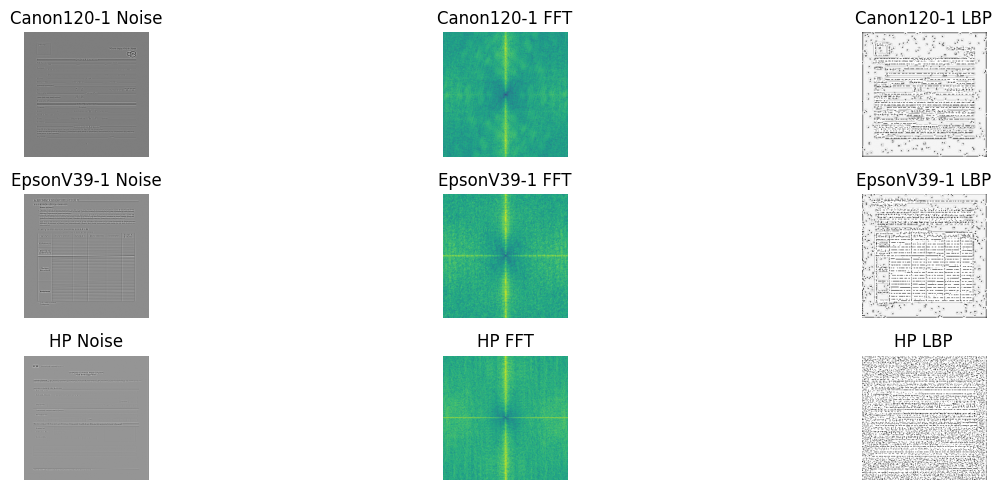

🎯 Feature Extraction and Visualization Completed!


In [17]:
# ==============================
#  Feature Extraction ZNCC + Enhanced FFT/LBP/Texture
# ==============================
import os
import pickle
import numpy as np
from tqdm import tqdm
from skimage.feature import local_binary_pattern
from scipy import ndimage
from scipy.fft import fft2, fftshift
import torch
import torch.nn.functional as F
import warnings
import matplotlib.pyplot as plt

# Suppress skimage LBP warning
warnings.filterwarnings("ignore", category=UserWarning, module="skimage.feature.texture")

# Define base directory and paths
BASE_DIR = "ForensicsScannerData"
FEATURES_DIR = os.path.join(BASE_DIR, "Features")
RES_PATH = os.path.join(FEATURES_DIR, "official_wikipedia_residuals.pkl")
FP_PATH = os.path.join(FEATURES_DIR, "scanner_fingerprints.pkl")
ORDER_NPY = os.path.join(FEATURES_DIR, "fp_keys.npy")
OUT_PATH = os.path.join(FEATURES_DIR, "features.pkl")
ENHANCED_OUT = os.path.join(FEATURES_DIR, "enhanced_features.pkl")

# Ensure Features directory exists
os.makedirs(FEATURES_DIR, exist_ok=True)

# Load fingerprints and fixed order
try:
    with open(FP_PATH, "rb") as f:
        scanner_fps = pickle.load(f)
    fp_keys = np.load(ORDER_NPY, allow_pickle=True).tolist()
    print("📌 Loaded fingerprints and key order:")
    print(f"   Scanners: {', '.join(fp_keys)}")
except FileNotFoundError:
    print(f"❌ Error: {FP_PATH} or {ORDER_NPY} not found.")
    exit(1)

# Helper: normalized cross-correlation (zero-mean cosine similarity) - PyTorch version
def corr2d_pytorch(a, b):
    a_tensor = torch.from_numpy(a.astype(np.float32)).ravel()
    b_tensor = torch.from_numpy(b.astype(np.float32)).ravel()
    a_tensor -= a_tensor.mean()
    b_tensor -= b_tensor.mean()
    denom = torch.norm(a_tensor) * torch.norm(b_tensor)
    if denom != 0:
        return float((a_tensor @ b_tensor) / denom)
    else:
        return 0.0

# Load residuals (already precomputed; do not preprocess again)
try:
    with open(RES_PATH, "rb") as f:
        residuals_dict = pickle.load(f)
    print("📌 Loaded residuals for datasets:")
    print(f"   Datasets: {', '.join(residuals_dict.keys())}")
except FileNotFoundError:
    print(f"❌ Error: {RES_PATH} not found.")
    exit(1)

# ==============================
#  Basic ZNCC Features 
# ==============================
print("\n Extracting ZNCC Features")
features, labels = [], []
for dataset_name in ["Official", "Wikipedia"]:
    print(f"   🔄 Processing {dataset_name} dataset...")
    for scanner, dpi_dict in tqdm(residuals_dict[dataset_name].items(), desc=f"{dataset_name} Scanners"):
        for dpi, res_list in dpi_dict.items():
            for res in res_list:
                vec = [corr2d_pytorch(res, scanner_fps[k]) for k in fp_keys]
                features.append(vec)
                labels.append(scanner)

# Save ZNCC features + labels
with open(OUT_PATH, "wb") as f:
    pickle.dump({"features": features, "labels": labels}, f)
print(f"📌 Saved ZNCC features to {OUT_PATH}")
print(f"   Shape: {len(features)} samples x {len(features[0]) if features else 0} features")

# ==============================
# Enhanced Feature Extraction (FFT + LBP + Texture) 
# ==============================
def extract_enhanced_features_pytorch(residual):
    """Extract comprehensive features: PRNU correlation + FFT + LBP + Texture """
    res_tensor = torch.from_numpy(residual).float()
    
    # 1. FFT Features (frequency domain)
    fft_img = torch.abs(torch.fft.fft2(res_tensor))
    fft_img = torch.fft.fftshift(fft_img)
    h, w = fft_img.shape
    center_h, center_w = h // 2, w // 2
    low_freq_region = fft_img[center_h-20:center_h+20, center_w-20:center_w+20]
    low_freq = torch.mean(low_freq_region).item()
    mid_freq_region = fft_img[center_h-60:center_h+60, center_w-60:center_w+60]
    mid_freq = torch.mean(mid_freq_region).item() - low_freq
    high_freq = torch.mean(fft_img).item() - low_freq - mid_freq

    # 2. LBP Texture Features
    lbp = local_binary_pattern(residual, P=24, R=3, method='uniform')
    lbp_hist, _ = np.histogram(lbp, bins=26, range=(0, 25), density=True)

    # 3. Statistical Texture Features
    sobel_x = torch.tensor([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=torch.float32).view(1, 1, 3, 3)
    sobel_y = torch.tensor([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=torch.float32).view(1, 1, 3, 3)
    grad_x = F.conv2d(res_tensor.unsqueeze(0).unsqueeze(0), sobel_x, padding=1).squeeze()
    grad_y = F.conv2d(res_tensor.unsqueeze(0).unsqueeze(0), sobel_y, padding=1).squeeze()
    gradient_mag = torch.sqrt(grad_x**2 + grad_y**2)
    texture_features = [
        float(torch.std(res_tensor)),
        float(torch.mean(torch.abs(res_tensor))),
        float(torch.std(gradient_mag)),
        float(torch.mean(gradient_mag)),
    ]

    return [low_freq, mid_freq, high_freq] + lbp_hist.tolist() + texture_features

# Extract enhanced features for all images
print("\n Extracting Enhanced Features (FFT + LBP + Texture)")
enhanced_features, enhanced_labels = [], []
for dataset_name in ["Official", "Wikipedia"]:
    print(f"   🔄 Processing {dataset_name} dataset...")
    for scanner, dpi_dict in tqdm(residuals_dict[dataset_name].items(), desc=f"{dataset_name} Scanners"):
        for dpi, res_list in dpi_dict.items():
            for res in res_list:
                feat = extract_enhanced_features_pytorch(res)
                enhanced_features.append(feat)
                enhanced_labels.append(scanner)

# Save enhanced features
with open(ENHANCED_OUT, "wb") as f:
    pickle.dump({"features": enhanced_features, "labels": enhanced_labels}, f)
print(f"📌 Saved enhanced features to {ENHANCED_OUT}")
print(f"   Shape: {len(enhanced_features)} samples x {len(enhanced_features[0]) if enhanced_features else 0} features")

# ==============================
#  Visualize Enhanced Features for S Scanners
# ==============================
print("\n📷 Visualizing Noise Pattern, FFT Spectrum, and LBP Texture")
selected_scanners = ["Canon120-1", "EpsonV39-1", "HP"]

plt.figure(figsize=(15, 5))
for i, scanner in enumerate(selected_scanners, 1):
    found = False
    for dataset in ["Official", "Wikipedia"]:
        if not found and scanner in residuals_dict[dataset]:
            res_list = list(residuals_dict[dataset][scanner].values())[0]  # First DPI group
            if res_list:
                res = res_list[0]  # First residual image
                feat = extract_enhanced_features_pytorch(res)
                
                # Subplot 1: Noise Pattern (Residual Image)
                plt.subplot(3, 3, (i-1)*3 + 1)
                plt.imshow(res, cmap='gray')
                plt.title(f"{scanner} Noise")
                plt.axis('off')
                
                # Subplot 2: FFT Spectrum
                fft_img = torch.abs(torch.fft.fft2(torch.from_numpy(res).float()))
                fft_img = torch.fft.fftshift(fft_img).numpy()
                plt.subplot(3, 3, (i-1)*3 + 2)
                plt.imshow(np.log(fft_img + 1e-10), cmap='viridis')  # Log scale for visibility
                plt.title(f"{scanner} FFT")
                plt.axis('off')
                
                # Subplot 3: LBP Texture
                lbp = local_binary_pattern(res, P=24, R=3, method='uniform')
                plt.subplot(3, 3, (i-1)*3 + 3)
                plt.imshow(lbp, cmap='gray')
                plt.title(f"{scanner} LBP")
                plt.axis('off')
                
                found = True
                break
    if not found:
        print(f"⚠️ No residual found for {scanner}")

plt.tight_layout()
plt.show()

print("🎯 Feature Extraction and Visualization Completed!")

# Train Hybrid CNN Model (Features + PrePrcoessed Images)

Using device: cuda
✅ Loaded fingerprints: ['Canon120-1', 'Canon120-2', 'Canon220', 'Canon9000-1', 'Canon9000-2', 'EpsonV370-1', 'EpsonV370-2', 'EpsonV39-1', 'EpsonV39-2', 'EpsonV550', 'HP']
🔄 Building dataset...


100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [01:10<00:00,  6.42s/it]


Hybrid train: torch.Size([3654, 1, 256, 256]) torch.Size([3654, 27]) torch.Size([3654, 11])
Hybrid test : torch.Size([914, 1, 256, 256]) torch.Size([914, 27]) torch.Size([914, 11])
🔄 Training hybrid CNN model...


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:12<00:00,  2.72s/it]


Epoch 1/50: Train Loss: 1.7929, Train Acc: 0.3101, Val Loss: 1.5314, Val Acc: 0.3687


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:11<00:00,  2.71s/it]


Epoch 2/50: Train Loss: 1.4575, Train Acc: 0.3963, Val Loss: 1.3806, Val Acc: 0.4168


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:10<00:00,  2.70s/it]


Epoch 3/50: Train Loss: 1.3956, Train Acc: 0.4100, Val Loss: 2.7385, Val Acc: 0.3031


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:10<00:00,  2.70s/it]


Epoch 4/50: Train Loss: 1.3294, Train Acc: 0.4491, Val Loss: 1.2960, Val Acc: 0.4650


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:11<00:00,  2.71s/it]


Epoch 5/50: Train Loss: 1.2680, Train Acc: 0.4781, Val Loss: 4.3810, Val Acc: 0.3228


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:08<00:00,  2.69s/it]


Epoch 6/50: Train Loss: 1.1949, Train Acc: 0.5019, Val Loss: 1.2055, Val Acc: 0.5022


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.68s/it]


Epoch 7/50: Train Loss: 1.1595, Train Acc: 0.5047, Val Loss: 1.2102, Val Acc: 0.5011


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 8/50: Train Loss: 1.0604, Train Acc: 0.5424, Val Loss: 1.8894, Val Acc: 0.3326


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 9/50: Train Loss: 0.8862, Train Acc: 0.5868, Val Loss: 2.7717, Val Acc: 0.2932


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:14<00:00,  2.73s/it]


Epoch 10/50: Train Loss: 0.7948, Train Acc: 0.6136, Val Loss: 4.8018, Val Acc: 0.3479


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:13<00:00,  2.72s/it]


Epoch 11/50: Train Loss: 0.7592, Train Acc: 0.6377, Val Loss: 1.8451, Val Acc: 0.4803


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:10<00:00,  2.70s/it]


Epoch 12/50: Train Loss: 0.7192, Train Acc: 0.6585, Val Loss: 2.5806, Val Acc: 0.4289


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:10<00:00,  2.70s/it]


Epoch 13/50: Train Loss: 0.6960, Train Acc: 0.6585, Val Loss: 1.2804, Val Acc: 0.5077


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:10<00:00,  2.70s/it]


Epoch 14/50: Train Loss: 0.6503, Train Acc: 0.6814, Val Loss: 0.7136, Val Acc: 0.7002


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:11<00:00,  2.70s/it]


Epoch 15/50: Train Loss: 0.6103, Train Acc: 0.7001, Val Loss: 0.7312, Val Acc: 0.6510


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:12<00:00,  2.72s/it]


Epoch 16/50: Train Loss: 0.5667, Train Acc: 0.7083, Val Loss: 1.7389, Val Acc: 0.5580


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 17/50: Train Loss: 0.5249, Train Acc: 0.7233, Val Loss: 0.5545, Val Acc: 0.7396


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 18/50: Train Loss: 0.5072, Train Acc: 0.7510, Val Loss: 0.5097, Val Acc: 0.7484


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 19/50: Train Loss: 0.5086, Train Acc: 0.7518, Val Loss: 0.5723, Val Acc: 0.7374


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 20/50: Train Loss: 0.4930, Train Acc: 0.7616, Val Loss: 0.6023, Val Acc: 0.7276


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:10<00:00,  2.70s/it]


Epoch 21/50: Train Loss: 0.4646, Train Acc: 0.7846, Val Loss: 0.4482, Val Acc: 0.7867


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:11<00:00,  2.71s/it]


Epoch 22/50: Train Loss: 0.4382, Train Acc: 0.8106, Val Loss: 0.3964, Val Acc: 0.8403


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.68s/it]


Epoch 23/50: Train Loss: 0.4127, Train Acc: 0.8191, Val Loss: 0.4360, Val Acc: 0.8107


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 24/50: Train Loss: 0.4031, Train Acc: 0.8205, Val Loss: 0.3712, Val Acc: 0.8468


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 25/50: Train Loss: 0.3974, Train Acc: 0.8248, Val Loss: 0.3983, Val Acc: 0.8129


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 26/50: Train Loss: 0.3873, Train Acc: 0.8325, Val Loss: 0.3757, Val Acc: 0.8435


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 27/50: Train Loss: 0.3663, Train Acc: 0.8429, Val Loss: 0.3620, Val Acc: 0.8501


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 28/50: Train Loss: 0.3432, Train Acc: 0.8599, Val Loss: 0.3165, Val Acc: 0.8840


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 29/50: Train Loss: 0.3394, Train Acc: 0.8591, Val Loss: 0.3233, Val Acc: 0.8600


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 30/50: Train Loss: 0.3322, Train Acc: 0.8577, Val Loss: 0.3389, Val Acc: 0.8643


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 31/50: Train Loss: 0.3344, Train Acc: 0.8681, Val Loss: 0.2966, Val Acc: 0.8818


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 32/50: Train Loss: 0.3104, Train Acc: 0.8736, Val Loss: 0.2733, Val Acc: 0.8982


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 33/50: Train Loss: 0.3060, Train Acc: 0.8755, Val Loss: 0.2775, Val Acc: 0.8840


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 34/50: Train Loss: 0.2939, Train Acc: 0.8831, Val Loss: 0.2700, Val Acc: 0.8961


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 35/50: Train Loss: 0.2932, Train Acc: 0.8851, Val Loss: 0.2644, Val Acc: 0.9026


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 36/50: Train Loss: 0.2922, Train Acc: 0.8892, Val Loss: 0.2698, Val Acc: 0.8972


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 37/50: Train Loss: 0.2879, Train Acc: 0.8845, Val Loss: 0.2655, Val Acc: 0.8982


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 38/50: Train Loss: 0.2884, Train Acc: 0.8881, Val Loss: 0.2815, Val Acc: 0.8873


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 39/50: Train Loss: 0.2768, Train Acc: 0.8916, Val Loss: 0.2686, Val Acc: 0.8928


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 40/50: Train Loss: 0.2712, Train Acc: 0.8941, Val Loss: 0.2553, Val Acc: 0.9081


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 41/50: Train Loss: 0.2713, Train Acc: 0.8963, Val Loss: 0.2473, Val Acc: 0.9125


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 42/50: Train Loss: 0.2734, Train Acc: 0.8938, Val Loss: 0.2431, Val Acc: 0.9168


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 43/50: Train Loss: 0.2757, Train Acc: 0.8924, Val Loss: 0.2487, Val Acc: 0.9070


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 44/50: Train Loss: 0.2672, Train Acc: 0.8916, Val Loss: 0.2467, Val Acc: 0.9070


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 45/50: Train Loss: 0.2652, Train Acc: 0.8976, Val Loss: 0.2415, Val Acc: 0.9179


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 46/50: Train Loss: 0.2591, Train Acc: 0.8974, Val Loss: 0.2461, Val Acc: 0.9026


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 47/50: Train Loss: 0.2655, Train Acc: 0.8963, Val Loss: 0.2370, Val Acc: 0.9158


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 48/50: Train Loss: 0.2656, Train Acc: 0.8955, Val Loss: 0.2527, Val Acc: 0.9004


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 49/50: Train Loss: 0.2643, Train Acc: 0.8955, Val Loss: 0.2385, Val Acc: 0.9212


100%|████████████████████████████████████████████████████████████████████████████████| 115/115 [05:07<00:00,  2.67s/it]


Epoch 50/50: Train Loss: 0.2696, Train Acc: 0.8963, Val Loss: 0.2447, Val Acc: 0.9158
✅ Hybrid CNN training complete: ForensicsScannerData\Features\scanner_hybrid.pt


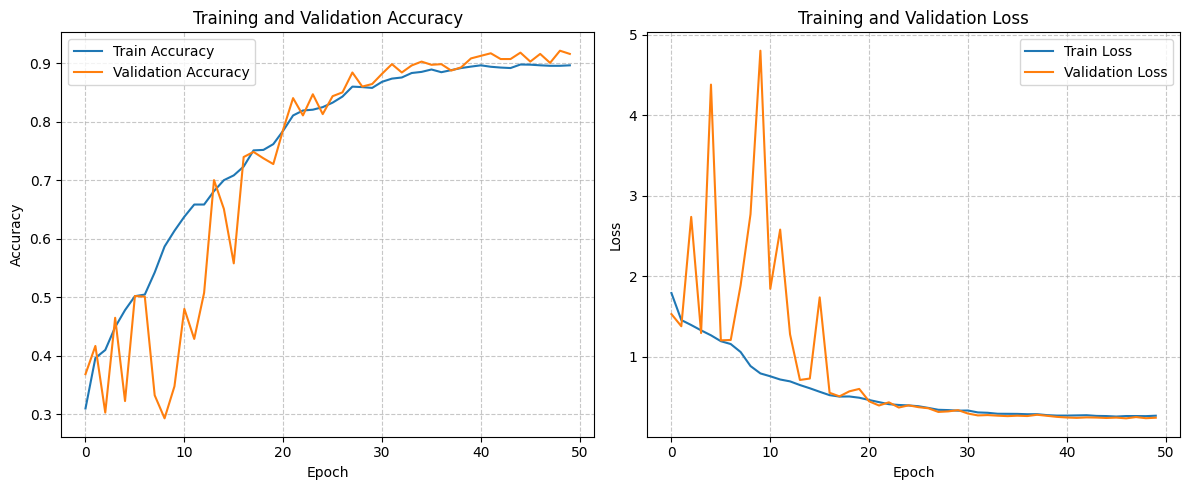

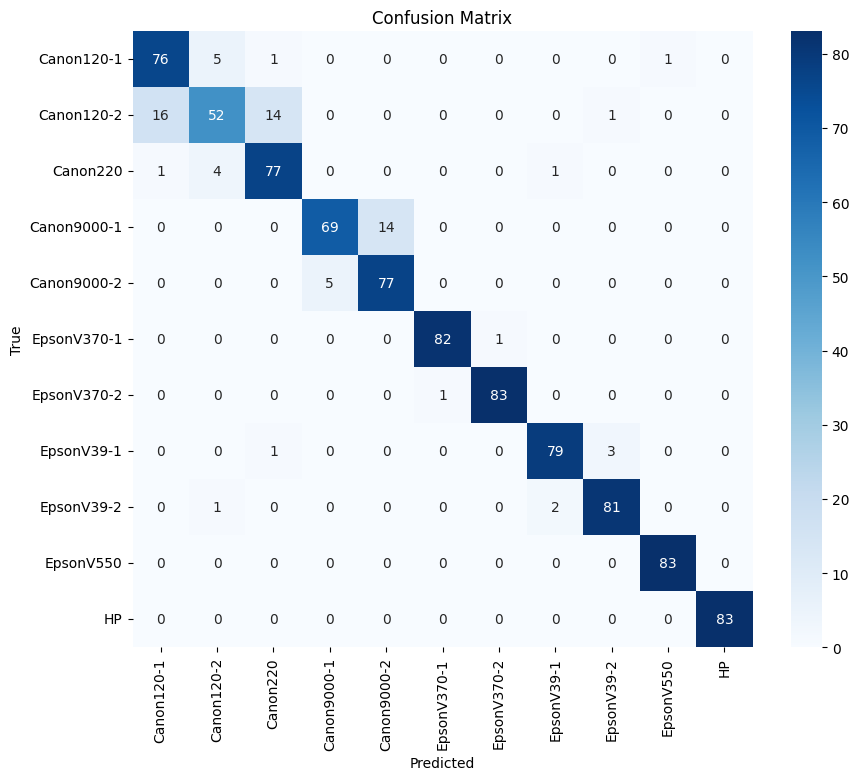


Classification Report:
              precision    recall  f1-score   support

  Canon120-1       0.82      0.92      0.86        83
  Canon120-2       0.84      0.63      0.72        83
    Canon220       0.83      0.93      0.88        83
 Canon9000-1       0.93      0.83      0.88        83
 Canon9000-2       0.85      0.94      0.89        82
 EpsonV370-1       0.99      0.99      0.99        83
 EpsonV370-2       0.99      0.99      0.99        84
  EpsonV39-1       0.96      0.95      0.96        83
  EpsonV39-2       0.95      0.96      0.96        84
   EpsonV550       0.99      1.00      0.99        83
          HP       1.00      1.00      1.00        83

    accuracy                           0.92       914
   macro avg       0.92      0.92      0.92       914
weighted avg       0.92      0.92      0.92       914

Test Accuracy: 0.9212


In [10]:

import os
import pickle
import random
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from skimage.feature import local_binary_pattern as sk_lbp
import pywt
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# ---- Device Configuration ----
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ---- Paths ----
BASE_DIR = "ForensicsScannerData"
FEATURES_DIR = os.path.join(BASE_DIR, "Features")
RES_PATH = os.path.join(FEATURES_DIR, "official_wikipedia_residuals.pkl")
FP_PATH = os.path.join(FEATURES_DIR, "scanner_fingerprints.pkl")
ORDER_NPY = os.path.join(FEATURES_DIR, "fp_keys.npy")
ART_DIR = FEATURES_DIR
os.makedirs(ART_DIR, exist_ok=True)

# ---- Reproducibility ----
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if device.type == "cuda":
    torch.cuda.manual_seed(SEED)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

# ---- Load residuals + fingerprints in stable order ----
try:
    with open(RES_PATH, "rb") as f:
        residuals_dict = pickle.load(f)
    with open(FP_PATH, "rb") as f:
        scanner_fps = pickle.load(f)
    fp_keys = np.load(ORDER_NPY, allow_pickle=True).tolist()
    print("✅ Loaded fingerprints:", fp_keys)
except FileNotFoundError:
    print(f"Error: {RES_PATH}, {FP_PATH}, or {ORDER_NPY} not found.")
    exit(1)

# ---- Utilities ----
def corr2d(a, b):
    a = torch.from_numpy(a.astype(np.float32)).ravel().to(device)
    b = torch.from_numpy(b.astype(np.float32)).ravel().to(device)
    a = a - a.mean()
    b = b - b.mean()
    d = torch.norm(a) * torch.norm(b)
    return float((a @ b) / d) if d != 0 else 0.0

def fft_radial_energy(img, K=6):
    img_tensor = torch.from_numpy(img).float().to(device)
    f = torch.fft.fftshift(torch.fft.fft2(img_tensor))
    mag = torch.abs(f)
    h, w = mag.shape
    cy, cx = h // 2, w // 2
    
    # Create coordinate grid using torch.meshgrid
    y = torch.arange(h, device=device)
    x = torch.arange(w, device=device)
    yy, xx = torch.meshgrid(y, x, indexing="ij")
    
    r = torch.sqrt((yy - cy) ** 2 + (xx - cx) ** 2)
    rmax = r.max() + 1e-6
    bins = torch.linspace(0, rmax, K + 1, device=device)
    feats = []
    for i in range(K):
        m = (r >= bins[i]) & (r < bins[i + 1])
        feats.append(float(mag[m].mean() if m.any() else 0.0))
    return feats

def lbp_hist_safe(img, P=8, R=1.0):
    rng = float(np.ptp(img))
    if rng < 1e-12:
        g = np.zeros_like(img, dtype=np.float32)
    else:
        g = (img - float(np.min(img))) / (rng + 1e-8)
    g8 = (g * 255.0).astype(np.uint8)
    codes = sk_lbp(g8, P=P, R=R, method="uniform")
    n_bins = P + 2
    hist, _ = np.histogram(codes, bins=np.arange(n_bins + 1), density=True)
    return hist.astype(np.float32).tolist()

# ---- Build aligned dataset: (residual image, 27-D features, label) ----
print("🔄 Building dataset...")
X_img, X_feat, y = [], [], []
for dataset_name in ["Official", "Wikipedia"]:
    for scanner, dpi_dict in tqdm(residuals_dict[dataset_name].items(), total=len(residuals_dict[dataset_name])):
        for dpi, res_list in dpi_dict.items():
            for res in res_list:
                # Reshape residual to (1, 256, 256) for PyTorch (N, C, H, W)
                X_img.append(res[None, :, :])  # (1, 256, 256)
                v_corr = [corr2d(res, scanner_fps[k]) for k in fp_keys]  # 11
                v_fft = fft_radial_energy(res, K=6)  # 6
                v_lbp = lbp_hist_safe(res, P=8, R=1.0)  # 10
                X_feat.append(v_corr + v_fft + v_lbp)  # 27 total
                y.append(scanner)

X_img = np.array(X_img, dtype=np.float32)  # (N, 1, 256, 256)
X_feat = np.array(X_feat, dtype=np.float32)  # (N, 27)
y = np.array(y)

# ---- Encode labels and split ----
le = LabelEncoder()
y_int = le.fit_transform(y)
num_classes = len(le.classes_)
y_cat = torch.tensor(np.eye(num_classes)[y_int], dtype=torch.float32)

X_img_tr, X_img_te, X_feat_tr, X_feat_te, y_tr, y_te = train_test_split(
    X_img, X_feat, y_cat, test_size=0.2, random_state=SEED, stratify=y_int
)

# Feature scaling
scaler = StandardScaler()
X_feat_tr = scaler.fit_transform(X_feat_tr)
X_feat_te = scaler.transform(X_feat_te)

# Convert to tensors
X_img_tr = torch.tensor(X_img_tr, dtype=torch.float32).to(device)
X_img_te = torch.tensor(X_img_te, dtype=torch.float32).to(device)
X_feat_tr = torch.tensor(X_feat_tr, dtype=torch.float32).to(device)
X_feat_te = torch.tensor(X_feat_te, dtype=torch.float32).to(device)
y_tr = y_tr.to(device)
y_te = y_te.to(device)

# Persist artifacts
with open(os.path.join(ART_DIR, "hybrid_label_encoder.pkl"), "wb") as f:
    pickle.dump(le, f)
with open(os.path.join(ART_DIR, "hybrid_feat_scaler.pkl"), "wb") as f:
    pickle.dump(scaler, f)

print("Hybrid train:", X_img_tr.shape, X_feat_tr.shape, y_tr.shape)
print("Hybrid test :", X_img_te.shape, X_feat_te.shape, y_te.shape)

# ---- Hybrid CNN Model ----
class HybridCNN(nn.Module):
    def __init__(self, num_classes):
        super(HybridCNN, self).__init__()
        # Fixed high-pass kernel
        hp_kernel = torch.tensor([[-1, -1, -1],
                                  [-1,  8, -1],
                                  [-1, -1, -1]], dtype=torch.float32).view(1, 1, 3, 3)
        self.hp_filter = nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
        self.hp_filter.weight = nn.Parameter(hp_kernel, requires_grad=False)
        
        # Image branch
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)
        
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout(0.30)
        
        self.conv7 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        
        # Feature branch
        self.fc1 = nn.Linear(27, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout4 = nn.Dropout(0.20)
        
        # Fusion and output
        self.fc2 = nn.Linear(256 + 64, 256)
        self.dropout5 = nn.Dropout(0.40)
        self.fc3 = nn.Linear(256, num_classes)
        
    def forward(self, img, feat):
        x = self.hp_filter(img)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool1(x)
        x = self.dropout1(x)
        
        x = F.relu(self.bn2(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = self.pool2(x)
        x = self.dropout2(x)
        
        x = F.relu(self.bn3(self.conv5(x)))
        x = F.relu(self.conv6(x))
        x = self.pool3(x)
        x = self.dropout3(x)
        
        x = F.relu(self.bn4(self.conv7(x)))
        x = self.global_pool(x).view(x.size(0), -1)
        
        f = F.relu(self.bn5(self.fc1(feat)))
        f = self.dropout4(f)
        
        z = torch.cat([x, f], dim=1)
        z = F.relu(self.fc2(z))
        z = self.dropout5(z)
        return self.fc3(z)

# Initialize model
model = HybridCNN(num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=5, min_lr=1e-6)

# ---- DataLoader ----
BATCH = 32
train_dataset = TensorDataset(X_img_tr, X_feat_tr, y_tr)
val_dataset = TensorDataset(X_img_te, X_feat_te, y_te)
train_loader = DataLoader(train_dataset, batch_size=BATCH, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH, shuffle=False)

# ---- Training Loop ----
EPOCHS = 50
best_val_acc = 0.0
early_stop_count = 0
patience = 10
ckpt_path = os.path.join(ART_DIR, "scanner_hybrid.pt")
history = {"train_loss": [], "train_acc": [], "val_loss": [], "val_acc": []}

print("🔄 Training hybrid CNN model...")
for epoch in range(EPOCHS):
    model.train()
    train_loss, train_correct, train_total = 0.0, 0, 0
    for img, feat, target in tqdm(train_loader, total=len(train_loader)):
        img, feat, target = img.to(device), feat.to(device), target.to(device)
        optimizer.zero_grad()
        outputs = model(img, feat)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * img.size(0)
        _, predicted = torch.max(outputs, 1)
        _, labels = torch.max(target, 1)
        train_correct += (predicted == labels).sum().item()
        train_total += labels.size(0)
    
    train_loss /= train_total
    train_acc = train_correct / train_total
    
    # Validation
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    with torch.no_grad():
        for img, feat, target in val_loader:
            img, feat, target = img.to(device), feat.to(device), target.to(device)
            outputs = model(img, feat)
            loss = criterion(outputs, target)
            
            val_loss += loss.item() * img.size(0)
            _, predicted = torch.max(outputs, 1)
            _, labels = torch.max(target, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)
    
    val_loss /= val_total
    val_acc = val_correct / val_total
    
    history["train_loss"].append(train_loss)
    history["train_acc"].append(train_acc)
    history["val_loss"].append(val_loss)
    history["val_acc"].append(val_acc)
    
    print(f"Epoch {epoch+1}/{EPOCHS}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    # Checkpointing
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), ckpt_path)
        early_stop_count = 0
    else:
        early_stop_count += 1
    
    # Early stopping
    if early_stop_count >= patience:
        print("Early stopping triggered.")
        break
    
    # Update learning rate
    scheduler.step(val_acc)

# Load best model
model.load_state_dict(torch.load(ckpt_path))
model.eval()

# Save final model
final_path = os.path.join(ART_DIR, "scanner_hybrid_final.pt")
torch.save(model.state_dict(), final_path)
with open(os.path.join(ART_DIR, "hybrid_training_history.pkl"), "wb") as f:
    pickle.dump(history, f)
print("✅ Hybrid CNN training complete:", ckpt_path)

# ---- Plot Training Curves ----
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history["train_acc"], label="Train Accuracy", color="#1f77b4")
plt.plot(history["val_acc"], label="Validation Accuracy", color="#ff7f0e")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(history["train_loss"], label="Train Loss", color="#1f77b4")
plt.plot(history["val_loss"], label="Validation Loss", color="#ff7f0e")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# ---- Confusion Matrix and Classification Report ----
y_pred = []
y_true = []
with torch.no_grad():
    for img, feat, target in val_loader:
        img, feat, target = img.to(device), feat.to(device), target.to(device)
        outputs = model(img, feat)
        _, predicted = torch.max(outputs, 1)
        _, labels = torch.max(target, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Test Accuracy
test_acc = np.mean(np.array(y_pred) == np.array(y_true))
print(f"Test Accuracy: {test_acc:.4f}")

# ---- Inference Function (PyTorch) ----
def preprocess_residual_pywt(path):
    import cv2
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        raise ValueError(f"Cannot read {path}")
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (256, 256), interpolation=cv2.INTER_AREA)
    img = img.astype(np.float32) / 255.0
    cA, (cH, cV, cD) = pywt.dwt2(img, 'haar')
    cH.fill(0); cV.fill(0); cD.fill(0)
    den = pywt.idwt2((cA, (cH, cV, cD)), 'haar')
    return (img - den).astype(np.float32)

def make_feats_from_res(res):
    v_corr = [corr2d(res, scanner_fps[k]) for k in fp_keys]  # 11
    v_fft = fft_radial_energy(res, K=6)  # 6
    v_lbp = lbp_hist_safe(res, P=8, R=1.0)  # 10
    v = np.array(v_corr + v_fft + v_lbp, dtype=np.float32).reshape(1, -1)
    v = scaler.transform(v)
    return v

def predict_scanner_hybrid(image_path, model, le, scaler, device):
    res = preprocess_residual_pywt(image_path)
    x_img = torch.tensor(res, dtype=torch.float32).unsqueeze(0).unsqueeze(0).to(device)  # (1, 1, 256, 256)
    x_ft = torch.tensor(make_feats_from_res(res), dtype=torch.float32).to(device)
    model.eval()
    with torch.no_grad():
        prob = model(x_img, x_ft)
        prob = F.softmax(prob, dim=1)
        idx = torch.argmax(prob, dim=1).item()
        conf = prob[0, idx].item() * 100.0
        label = le.classes_[idx]
    return label, conf

# Multi Image Prediction using Hybrid CNN Model
### The pipeline performs:
### Residual extraction using wavelet denoising
### Feature generation (Correlation, FFT, LBP)
### Prediction using the trained Hybrid CNN
### Output → Predicted Scanner Name + Confidence (%)

In [14]:
import torch
import numpy as np
import pickle
import pywt
import cv2
import os
from skimage.feature import local_binary_pattern as sk_lbp
import torch.nn as nn
import torch.nn.functional as F

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Paths to saved artifacts
BASE_DIR = "ForensicsScannerData"
FEATURES_DIR = os.path.join(BASE_DIR, "Features")
MODEL_PATH = os.path.join(FEATURES_DIR, "scanner_hybrid_final.pt")
ENCODER_PATH = os.path.join(FEATURES_DIR, "hybrid_label_encoder.pkl")
SCALER_PATH = os.path.join(FEATURES_DIR, "hybrid_feat_scaler.pkl")
FP_PATH = os.path.join(FEATURES_DIR, "scanner_fingerprints.pkl")
ORDER_NPY = os.path.join(FEATURES_DIR, "fp_keys.npy")

# Load label encoder + scaler + fingerprints
try:
    with open(ENCODER_PATH, "rb") as f:
        le = pickle.load(f)
    with open(SCALER_PATH, "rb") as f:
        scaler = pickle.load(f)
    with open(FP_PATH, "rb") as f:
        scanner_fps = pickle.load(f)
    fp_keys = np.load(ORDER_NPY, allow_pickle=True).tolist()
    print("✅ Loaded artifacts successfully.")
except FileNotFoundError as e:
    print(f"Error: Missing file - {e}. Run training first!")
    raise

# Convert fingerprints to tensors
scanner_fps_tensors = {k: torch.from_numpy(np.asarray(v)).to(torch.float32).to(device) for k, v in scanner_fps.items()}

# Model definition (matches training code's HybridCNN)
class HybridCNN(nn.Module):
    def __init__(self, num_classes):
        super(HybridCNN, self).__init__()
        hp_kernel = torch.tensor([[-1, -1, -1],
                                 [-1,  8, -1],
                                 [-1, -1, -1]], dtype=torch.float32).view(1, 1, 3, 3)
        self.hp_filter = nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
        self.hp_filter.weight = nn.Parameter(hp_kernel, requires_grad=False)
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool3 = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout(0.30)
        self.conv7 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(27, 64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout4 = nn.Dropout(0.20)
        self.fc2 = nn.Linear(256 + 64, 256)
        self.dropout5 = nn.Dropout(0.40)
        self.fc3 = nn.Linear(256, num_classes)
        
    def forward(self, img, feat):
        x = self.hp_filter(img)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool1(x)
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = self.pool2(x)
        x = self.dropout2(x)
        x = F.relu(self.bn3(self.conv5(x)))
        x = F.relu(self.conv6(x))
        x = self.pool3(x)
        x = self.dropout3(x)
        x = F.relu(self.bn4(self.conv7(x)))
        x = self.global_pool(x).view(x.size(0), -1)
        f = F.relu(self.bn5(self.fc1(feat)))
        f = self.dropout4(f)
        z = torch.cat([x, f], dim=1)
        z = F.relu(self.fc2(z))
        z = self.dropout5(z)
        return self.fc3(z)

# Load model
model = HybridCNN(num_classes=len(le.classes_)).to(device)
try:
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    model.eval()
    print("✅ Model loaded successfully.")
except FileNotFoundError:
    print(f"Error: Model file {MODEL_PATH} not found. Run training first!")
    raise
except RuntimeError as e:
    print(f"Error loading model weights: {e}. Ensure training and inference model architectures match!")
    raise

# --- Preprocessing for single image ---
def preprocess_residual(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        raise ValueError(f"Cannot read {path}")
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (256,256), interpolation=cv2.INTER_AREA)
    img = img.astype(np.float32)/255.0
    cA, (cH,cV,cD) = pywt.dwt2(img,'haar')
    cH.fill(0); cV.fill(0); cD.fill(0)
    den = pywt.idwt2((cA,(cH,cV,cD)),'haar')
    res = img - den
    return res.astype(np.float32)

def corr2d(a, b):
    a = torch.from_numpy(np.asarray(a)).to(torch.float32).to(device).ravel()
    b = b.to(device).ravel()
    a = a - a.mean(); b = b - b.mean()
    denom = torch.norm(a)*torch.norm(b)
    return float((a@b)/denom) if denom>0 else 0.0

def fft_radial_energy(img, K=6):
    img_t = torch.from_numpy(np.asarray(img)).to(torch.float32).to(device)
    f = torch.fft.fftshift(torch.fft.fft2(img_t))
    mag = torch.abs(f)
    h,w = mag.shape
    cy,cx = h//2,w//2
    yy,xx = torch.meshgrid(torch.arange(h,device=device), torch.arange(w,device=device), indexing='ij')
    r = torch.sqrt((yy-cy)**2 + (xx-cx)**2)
    bins = torch.linspace(0,r.max()+1e-6,K+1,device=device)
    feats = []
    for i in range(K):
        m = (r>=bins[i]) & (r<bins[i+1])
        feats.append(float(mag[m].mean() if m.any() else 0.0))
    return feats

def lbp_hist_safe(img, P=8, R=1.0):
    img_np = np.asarray(img)
    rng = float(np.ptp(img_np))
    g = np.zeros_like(img_np, dtype=np.float32) if rng<1e-12 else (img_np - float(np.min(img_np)))/(rng+1e-8)
    codes = sk_lbp((g*255).astype(np.uint8), P, R, method="uniform")
    n_bins = P+2
    hist,_ = np.histogram(codes,bins=np.arange(n_bins+1),density=True)
    return hist.astype(np.float32).tolist()

def make_feats_from_res(res):
    v_corr = [corr2d(res, scanner_fps_tensors[k]) for k in fp_keys]
    v_fft = fft_radial_energy(res, K=6)
    v_lbp = lbp_hist_safe(res, P=8, R=1.0)
    v = np.array(v_corr+v_fft+v_lbp, dtype=np.float32).reshape(1,-1)
    v = scaler.transform(v)
    return v

# --- Prediction function ---
def predict_image(path):
    res = preprocess_residual(path)
    x_img = torch.from_numpy(res[np.newaxis,:,:,np.newaxis]).permute(0,3,1,2).to(torch.float32).to(device)
    x_ft = torch.from_numpy(make_feats_from_res(res)).to(torch.float32).to(device)
    with torch.no_grad():
        logits = model(x_img, x_ft)
        prob = torch.softmax(logits, dim=1).cpu().numpy().ravel()
    idx = int(np.argmax(prob))
    label = le.classes_[idx]
    conf = float(prob[idx]*100)
    return label, conf

# --- Grouped paths according to your structure (complete) ---
test_paths_grouped = {
    "Official (150 DPI)": [
        "ForensicsScannerData/OfficialData/Canon120-1/150/s1_60.tif",
        "ForensicsScannerData/OfficialData/Canon120-2/150/s2_75.tif",
        "ForensicsScannerData/OfficialData/Canon220/150/s3_25.tif",
        "ForensicsScannerData/OfficialData/Canon9000-1/150/s4_65.tif",
        "ForensicsScannerData/OfficialData/Canon9000-2/150/s5_45.tif",
        "ForensicsScannerData/OfficialData/EpsonV39-1/150/s8_73.tif",
        "ForensicsScannerData/OfficialData/EpsonV39-2/150/s9_80.tif",
        "ForensicsScannerData/OfficialData/EpsonV370-1/150/s6_60.tif",
        "ForensicsScannerData/OfficialData/EpsonV370-2/150/s7_40.tif",
        "ForensicsScannerData/OfficialData/EpsonV550/150/s10_19.tif",
        "ForensicsScannerData/OfficialData/HP/150/s11_49.tif",
    ],
    "Official (300 DPI)": [
        "ForensicsScannerData/OfficialData/Canon120-1/300/s1_29.tif",
        "ForensicsScannerData/OfficialData/Canon120-2/300/s2_75.tif",
        "ForensicsScannerData/OfficialData/Canon220/300/s3_39.tif",
        "ForensicsScannerData/OfficialData/Canon9000-1/300/s4_75.tif",
        "ForensicsScannerData/OfficialData/Canon9000-2/300/s5_5.tif",
        "ForensicsScannerData/OfficialData/EpsonV39-1/300/s8_73.tif",
        "ForensicsScannerData/OfficialData/EpsonV39-2/300/s9_80.tif",
        "ForensicsScannerData/OfficialData/EpsonV370-1/300/s6_60.tif",
        "ForensicsScannerData/OfficialData/EpsonV370-2/300/s7_40.tif",
        "ForensicsScannerData/OfficialData/EpsonV550/300/s10_19.tif",
        "ForensicsScannerData/OfficialData/HP/300/s11_49.tif",
    ],
    "Wikipedia (150 DPI)": [
        "ForensicsScannerData/WikipediaData/Canon120-1/150/s1_29.tif",
        "ForensicsScannerData/WikipediaData/Canon120-2/150/s2_75.tif",
        "ForensicsScannerData/WikipediaData/Canon220/150/s3_39.tif",
        "ForensicsScannerData/WikipediaData/Canon9000-1/150/s4_65.tif",
        "ForensicsScannerData/WikipediaData/Canon9000-2/150/s5_5.tif",
        "ForensicsScannerData/WikipediaData/EpsonV39-1/150/s8_73.tif",
        "ForensicsScannerData/WikipediaData/EpsonV39-2/150/s9_80.tif",
        "ForensicsScannerData/WikipediaData/EpsonV370-1/150/s6_60.tif",
        "ForensicsScannerData/WikipediaData/EpsonV370-2/150/s7_40.tif",
        "ForensicsScannerData/WikipediaData/EpsonV550/150/s10_19.tif",
        "ForensicsScannerData/WikipediaData/HP/150/s11_49.tif",
    ],
    "Wikipedia (300 DPI)": [
        "ForensicsScannerData/WikipediaData/Canon120-1/300/s1_29.tif",
        "ForensicsScannerData/WikipediaData/Canon120-2/300/s2_75.tif",
        "ForensicsScannerData/WikipediaData/Canon220/300/s3_39.tif",
        "ForensicsScannerData/WikipediaData/Canon9000-1/300/s4_5.tif",
        "ForensicsScannerData/WikipediaData/Canon9000-2/300/s5_4.tif",
        "ForensicsScannerData/WikipediaData/EpsonV39-1/300/s8_73.tif",
        "ForensicsScannerData/WikipediaData/EpsonV39-2/300/s9_80.tif",
        "ForensicsScannerData/WikipediaData/EpsonV370-1/300/s6_60.tif",
        "ForensicsScannerData/WikipediaData/EpsonV370-2/300/s7_40.tif",
        "ForensicsScannerData/WikipediaData/EpsonV550/300/s10_19.tif",
        "ForensicsScannerData/WikipediaData/HP/300/s11_49.tif",
    ]
}

# --- Run predictions and print in required format ---
print("🔄 Starting predictions...")
for category, paths in test_paths_grouped.items():
    print(f"\n--- {category} ---\n")
    for path in paths:
        try:
            # Extract scanner name from path
            scanner_name = os.path.basename(os.path.dirname(os.path.dirname(path)))
            # Predict
            label, conf = predict_image(path)
            print(f"Input Scanner: {scanner_name} | Predicted: {label} | Confidence: {conf:.2f}%")
        except Exception as e:
            print(f"Error processing {path}: {e}")
print("✅ Predictions complete!")

✅ Loaded artifacts successfully.
✅ Model loaded successfully.
🔄 Starting predictions...

--- Official (150 DPI) ---

Input Scanner: Canon120-1 | Predicted: Canon120-1 | Confidence: 64.21%
Input Scanner: Canon120-2 | Predicted: Canon120-2 | Confidence: 76.02%
Input Scanner: Canon220 | Predicted: Canon220 | Confidence: 67.36%
Input Scanner: Canon9000-1 | Predicted: Canon9000-1 | Confidence: 65.42%
Input Scanner: Canon9000-2 | Predicted: Canon9000-2 | Confidence: 90.67%
Input Scanner: EpsonV39-1 | Predicted: EpsonV39-1 | Confidence: 81.12%
Input Scanner: EpsonV39-2 | Predicted: EpsonV39-2 | Confidence: 95.81%
Input Scanner: EpsonV370-1 | Predicted: EpsonV370-1 | Confidence: 99.91%
Input Scanner: EpsonV370-2 | Predicted: EpsonV370-2 | Confidence: 99.65%
Input Scanner: EpsonV550 | Predicted: EpsonV550 | Confidence: 99.99%
Input Scanner: HP | Predicted: HP | Confidence: 100.00%

--- Official (300 DPI) ---

Input Scanner: Canon120-1 | Predicted: Canon120-1 | Confidence: 90.01%
Input Scanner: 

# Milestone 4: Deployment & Final Report 
# Week 7: 
## Create a simple UI using Streamlit 
## Upload scanned image 
## Get predicted scanner brand/model with confidence score

In [17]:
%%writefile app.py

import streamlit as st
import torch
import numpy as np
import pickle
import pywt
import cv2
import os
from skimage.feature import local_binary_pattern as sk_lbp
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from pdf2image import convert_from_bytes

# ==============================
# Setup
# ==============================
st.set_page_config(page_title="TraceFinder", layout="centered")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

BASE_DIR = "ForensicsScannerData"
FEATURES_DIR = os.path.join(BASE_DIR, "Features")
MODEL_PATH = os.path.join(FEATURES_DIR, "scanner_hybrid_final.pt")
ENCODER_PATH = os.path.join(FEATURES_DIR, "hybrid_label_encoder.pkl")
SCALER_PATH = os.path.join(FEATURES_DIR, "hybrid_feat_scaler.pkl")
FP_PATH = os.path.join(FEATURES_DIR, "scanner_fingerprints.pkl")
ORDER_NPY = os.path.join(FEATURES_DIR, "fp_keys.npy")

# ==============================
# Load Artifacts
# ==============================
@st.cache_resource
def load_artifacts():
    with open(ENCODER_PATH, "rb") as f:
        le = pickle.load(f)
    with open(SCALER_PATH, "rb") as f:
        scaler = pickle.load(f)
    with open(FP_PATH, "rb") as f:
        scanner_fps = pickle.load(f)
    fp_keys = np.load(ORDER_NPY, allow_pickle=True).tolist()
    return le, scaler, scanner_fps, fp_keys

le, scaler, scanner_fps, fp_keys = load_artifacts()
scanner_fps_tensors = {k: torch.from_numpy(np.asarray(v)).to(torch.float32).to(device) for k, v in scanner_fps.items()}

# ==============================
# Hybrid Model Definition
# ==============================
class HybridCNN(nn.Module):
    def __init__(self, num_classes):
        super(HybridCNN, self).__init__()
        hp_kernel = torch.tensor([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],dtype=torch.float32).view(1,1,3,3)
        self.hp_filter = nn.Conv2d(1,1,3,padding=1,bias=False)
        self.hp_filter.weight = nn.Parameter(hp_kernel, requires_grad=False)
        self.conv1 = nn.Conv2d(1,32,3,padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32,32,3,padding=1)
        self.pool1 = nn.MaxPool2d(2,2)
        self.dropout1 = nn.Dropout(0.25)
        self.conv3 = nn.Conv2d(32,64,3,padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64,64,3,padding=1)
        self.pool2 = nn.MaxPool2d(2,2)
        self.dropout2 = nn.Dropout(0.25)
        self.conv5 = nn.Conv2d(64,128,3,padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128,128,3,padding=1)
        self.pool3 = nn.MaxPool2d(2,2)
        self.dropout3 = nn.Dropout(0.30)
        self.conv7 = nn.Conv2d(128,256,3,padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.global_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(27,64)
        self.bn5 = nn.BatchNorm1d(64)
        self.dropout4 = nn.Dropout(0.20)
        self.fc2 = nn.Linear(256+64,256)
        self.dropout5 = nn.Dropout(0.40)
        self.fc3 = nn.Linear(256,num_classes)

    def forward(self, img, feat):
        x = self.hp_filter(img)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.conv2(x))
        x = self.pool1(x)
        x = self.dropout1(x)
        x = F.relu(self.bn2(self.conv3(x)))
        x = F.relu(self.conv4(x))
        x = self.pool2(x)
        x = self.dropout2(x)
        x = F.relu(self.bn3(self.conv5(x)))
        x = F.relu(self.conv6(x))
        x = self.pool3(x)
        x = self.dropout3(x)
        x = F.relu(self.bn4(self.conv7(x)))
        x = self.global_pool(x).view(x.size(0),-1)
        f = F.relu(self.bn5(self.fc1(feat)))
        f = self.dropout4(f)
        z = torch.cat([x,f],dim=1)
        z = F.relu(self.fc2(z))
        z = self.dropout5(z)
        return self.fc3(z)

# ==============================
# Load Model
# ==============================
@st.cache_resource
def load_model():
    model = HybridCNN(num_classes=len(le.classes_)).to(device)
    model.load_state_dict(torch.load(MODEL_PATH, map_location=device))
    model.eval()
    return model

model = load_model()

# ==============================
# Feature Helpers
# ==============================
def preprocess_residual(path):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    if img is None:
        raise ValueError(f"Cannot read {path}")
    if img.ndim == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (256,256))
    img = img.astype(np.float32)/255.0
    cA,(cH,cV,cD) = pywt.dwt2(img,'haar')
    cH.fill(0); cV.fill(0); cD.fill(0)
    den = pywt.idwt2((cA,(cH,cV,cD)),'haar')
    res = img - den
    return res.astype(np.float32)

def corr2d(a,b):
    a = torch.from_numpy(np.asarray(a)).to(torch.float32).to(device).ravel()
    b = b.to(device).ravel()
    a = a - a.mean(); b = b - b.mean()
    denom = torch.norm(a)*torch.norm(b)
    return float((a@b)/denom) if denom>0 else 0.0

def fft_radial_energy(img,K=6):
    img_t = torch.from_numpy(np.asarray(img)).to(torch.float32).to(device)
    f = torch.fft.fftshift(torch.fft.fft2(img_t))
    mag = torch.abs(f)
    h,w = mag.shape
    cy,cx = h//2,w//2
    yy,xx = torch.meshgrid(torch.arange(h,device=device), torch.arange(w,device=device), indexing="ij")
    r = torch.sqrt((yy-cy)**2 + (xx-cx)**2)
    bins = torch.linspace(0,r.max()+1e-6,K+1,device=device)
    feats=[]
    for i in range(K):
        m = (r>=bins[i]) & (r<bins[i+1])
        feats.append(float(mag[m].mean() if m.any() else 0.0))
    return feats

def lbp_hist_safe(img,P=8,R=1.0):
    img_np = np.asarray(img)
    rng = float(np.ptp(img_np))
    g = np.zeros_like(img_np,dtype=np.float32) if rng<1e-12 else (img_np - float(np.min(img_np)))/(rng+1e-8)
    codes = sk_lbp((g*255).astype(np.uint8),P,R,method="uniform")
    n_bins = P+2
    hist,_ = np.histogram(codes,bins=np.arange(n_bins+1),density=True)
    return hist.astype(np.float32).tolist()

def make_feats_from_res(res):
    v_corr = [corr2d(res, scanner_fps_tensors[k]) for k in fp_keys]
    v_fft = fft_radial_energy(res, K=6)
    v_lbp = lbp_hist_safe(res, P=8, R=1.0)
    v = np.array(v_corr+v_fft+v_lbp, dtype=np.float32).reshape(1,-1)
    v = scaler.transform(v)
    return v

def predict_image(path):
    res = preprocess_residual(path)
    x_img = torch.from_numpy(res[np.newaxis,:,:,np.newaxis]).permute(0,3,1,2).to(torch.float32).to(device)
    x_ft = torch.from_numpy(make_feats_from_res(res)).to(torch.float32).to(device)
    with torch.no_grad():
        logits = model(x_img, x_ft)
        prob = torch.softmax(logits, dim=1).cpu().numpy().ravel()
    idx = int(np.argmax(prob))
    label = le.classes_[idx]
    conf = float(prob[idx]*100)
    return label, conf

# ==============================
# Wrapper for PIL Image
# ==============================
def predict_from_pil(pil_img):
    temp_path = "temp_upload.png"
    pil_img.convert("L").save(temp_path)
    return predict_image(temp_path)

# ==============================
# Streamlit UI
# ==============================
st.markdown("<h1 style='text-align:center; color:#2E86C1;'>AI TraceFinder</h1>", unsafe_allow_html=True)
st.markdown("<h2 style='text-align:center; color:#444;'>Forensic Scanner Identification</h2>", unsafe_allow_html=True)

uploaded_file = st.file_uploader(
    "📂 Upload Image or PDF", 
    type=["png","jpg","jpeg","tif","tiff","bmp","pdf"]
)

if uploaded_file:
    if uploaded_file.type == "application/pdf":
        pages = convert_from_bytes(uploaded_file.read())
        pil_img = pages[0]
    else:
        pil_img = Image.open(uploaded_file)

    col1, col2 = st.columns([1, 1])

    with col1:
        st.image(pil_img, caption="Uploaded Image / PDF Page", use_container_width=True)

    with col2:
        st.subheader("📊 Prediction Result")
        with st.spinner("🔎 Predicting... Please wait"):
            scanner, confidence = predict_from_pil(pil_img)

        st.markdown(
            f"""
            <div style="
                background-color:#f9f9f9;
                border:2px solid #2E86C1;
                border-radius:12px;
                padding:20px;
                text-align:center;
                box-shadow:2px 2px 10px rgba(0,0,0,0.1);
            ">
                <p style="font-size:20px; font-weight:bold; color:#333;">Scanner : {scanner}</p>
                <p style="font-size:18px; color:#27AE60;">Confidence : {confidence:.2f}%</p>
            </div>
            """,
            unsafe_allow_html=True
        )


Overwriting app.py


In [18]:
!streamlit run app.py


^C
